In [138]:
#import module
from pyspark.sql import SparkSession
from pyspark.sql.types import *

#create session in order to be capable of accessing all Spark API
spark = SparkSession \
    .builder \
    .appName("Introdution to Spark DataFrame") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [139]:
from pyspark.sql import *

In [140]:
parquetDF = spark.read.parquet("/Users/Personal/Documents/SPARK CODIGOS/userdata1.parquet")

In [141]:
parquetDF.show(3)

+-------------------+---+----------+---------+--------------------+------+--------------+----------------+---------+---------+---------+-------------------+--------+
|  registration_dttm| id|first_name|last_name|               email|gender|    ip_address|              cc|  country|birthdate|   salary|              title|comments|
+-------------------+---+----------+---------+--------------------+------+--------------+----------------+---------+---------+---------+-------------------+--------+
|2016-02-03 02:55:29|  1|    Amanda|   Jordan|    ajordan0@com.com|Female|   1.197.201.2|6759521864920116|Indonesia| 3/8/1971| 49756.53|   Internal Auditor|   1E+02|
|2016-02-03 12:04:03|  2|    Albert|  Freeman|     afreeman1@is.gd|  Male|218.111.175.34|                |   Canada|1/16/1968|150280.17|      Accountant IV|        |
|2016-02-02 20:09:31|  3|    Evelyn|   Morgan|emorgan2@altervis...|Female|  7.161.136.94|6767119071901597|   Russia| 2/1/1960|144972.51|Structural Engineer|        |
+---

In [142]:
parquetDF[['first_name','salary','country']]

DataFrame[first_name: string, salary: double, country: string]

In [143]:
display(parquetDF)

DataFrame[registration_dttm: timestamp, id: int, first_name: string, last_name: string, email: string, gender: string, ip_address: string, cc: string, country: string, birthdate: string, salary: double, title: string, comments: string]

In [144]:
#Counting number of rows, printing dataframe schema and printing statistic of our data

#count number of rows of our dataFrame
num_rows = parquetDF.count()
print("number of rows: ", num_rows)
#show our dataFrame schema
parquetDF.printSchema()
#show statistic of the data we want
parquetDF.describe('salary').show()

number of rows:  1000
root
 |-- registration_dttm: timestamp (nullable = true)
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- cc: string (nullable = true)
 |-- country: string (nullable = true)
 |-- birthdate: string (nullable = true)
 |-- salary: double (nullable = true)
 |-- title: string (nullable = true)
 |-- comments: string (nullable = true)

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|               932|
|   mean|149005.35665236053|
| stddev| 79785.17673591433|
|    min|          12380.49|
|    max|         286592.99|
+-------+------------------+



In [145]:
#Creating a new dataFrame from a subset of our existing dataFrame

#create new dataFrame from "first_name" and "salary" columns
newDataframe = parquetDF.select(parquetDF['first_name'], 
                                              parquetDF['salary'])
newDataframe.show(3); # DataFrame 
newDataframe.printSchema() #print schema  DataFrame 

+----------+---------+
|first_name|   salary|
+----------+---------+
|    Amanda| 49756.53|
|    Albert|150280.17|
|    Evelyn|144972.51|
+----------+---------+
only showing top 3 rows

root
 |-- first_name: string (nullable = true)
 |-- salary: double (nullable = true)



In [146]:
#Adding a constant value to every row data in certain column
#
#adding constant value of 1000 to every row data in "Total" column
parquetDF.select(parquetDF['first_name'],
                         parquetDF['salary']+1000).show(3)

+----------+---------------+
|first_name|(salary + 1000)|
+----------+---------------+
|    Amanda|       50756.53|
|    Albert|      151280.17|
|    Evelyn|      145972.51|
+----------+---------------+
only showing top 3 rows



**Convert a Spark DataFrame to a Pandas DataFrame **

In [147]:
import numpy as np
import pandas as pd

In [148]:
pandasDF = parquetDF.select(parquetDF['first_name'], 
                                              parquetDF['salary'],parquetDF['gender']).toPandas()

In [149]:
pandasDF.dtypes

first_name     object
salary        float64
gender         object
dtype: object

In [150]:
pandasDF.head(10)

first_name     salary  gender
0     Amanda   49756.53  Female
1     Albert  150280.17    Male
2     Evelyn  144972.51  Female
3     Denise   90263.05  Female
4     Carlos        NaN        
5    Kathryn   69227.11  Female
6     Samuel   14247.62    Male
7      Harry  186469.43    Male
8       Jose  231067.84    Male
9      Emily   27234.28  Female

In [151]:
pandasDF[['first_name','salary']]

first_name     salary
0        Amanda   49756.53
1        Albert  150280.17
2        Evelyn  144972.51
3        Denise   90263.05
4        Carlos        NaN
5       Kathryn   69227.11
6        Samuel   14247.62
7         Harry  186469.43
8          Jose  231067.84
9         Emily   27234.28
10        Susan  210001.95
11        Alice   22944.53
12       Justin   44165.46
13        Kathy  286592.99
14      Dorothy  157099.71
15        Bruce  239100.65
16        Emily  116800.65
17      Stephen  248877.99
18     Clarence  177122.99
19      Rebecca  137251.19
20        Diane   87978.22
21     Lawrence  131283.64
22      Gregory  182233.49
23     Michelle  278001.46
24       Rachel  176178.75
25      Anthony  170085.81
26        Henry  284300.15
27       Samuel  108950.24
28   Jacqueline  247939.52
29        Annie  118310.72
..          ...        ...
970       Karen  126520.43
971        Alan  255985.99
972       Bobby  161881.49
973     Rebecca  254305.28
974     Charles  123903.42
975        Jean  139790.85
976        Lori   92863.56
977       Billy  267658.75
978       Joyce   79168.38
979      Pamela  114074.93
980       Bruce   15754.79
981        Juan  186545.92
982              104324.94
983       Linda   37163.76
984        Mark  239554.74
985      Brenda   68588.97
986       Nancy   95962.59
987        Juan  165473.43
988     Theresa  261999.27
989       Helen  138836.75
990     Russell  124353.04
991      Martha  158522.84
992    Patricia  166651.78
993       Carol  120933.54
994        Jose  275898.37
995      Dennis  263399.54
996      Gloria   83183.54
997       Nancy        NaN
998       Annie   18433.85
999       Julie  222561.13

[1000 rows x 2 columns]

In [152]:
pandasDF[["first_name","salary"]]

first_name     salary
0        Amanda   49756.53
1        Albert  150280.17
2        Evelyn  144972.51
3        Denise   90263.05
4        Carlos        NaN
5       Kathryn   69227.11
6        Samuel   14247.62
7         Harry  186469.43
8          Jose  231067.84
9         Emily   27234.28
10        Susan  210001.95
11        Alice   22944.53
12       Justin   44165.46
13        Kathy  286592.99
14      Dorothy  157099.71
15        Bruce  239100.65
16        Emily  116800.65
17      Stephen  248877.99
18     Clarence  177122.99
19      Rebecca  137251.19
20        Diane   87978.22
21     Lawrence  131283.64
22      Gregory  182233.49
23     Michelle  278001.46
24       Rachel  176178.75
25      Anthony  170085.81
26        Henry  284300.15
27       Samuel  108950.24
28   Jacqueline  247939.52
29        Annie  118310.72
..          ...        ...
970       Karen  126520.43
971        Alan  255985.99
972       Bobby  161881.49
973     Rebecca  254305.28
974     Charles  123903.42
975        Jean  139790.85
976        Lori   92863.56
977       Billy  267658.75
978       Joyce   79168.38
979      Pamela  114074.93
980       Bruce   15754.79
981        Juan  186545.92
982              104324.94
983       Linda   37163.76
984        Mark  239554.74
985      Brenda   68588.97
986       Nancy   95962.59
987        Juan  165473.43
988     Theresa  261999.27
989       Helen  138836.75
990     Russell  124353.04
991      Martha  158522.84
992    Patricia  166651.78
993       Carol  120933.54
994        Jose  275898.37
995      Dennis  263399.54
996      Gloria   83183.54
997       Nancy        NaN
998       Annie   18433.85
999       Julie  222561.13

[1000 rows x 2 columns]

In [153]:
pandasDF.loc[4]

first_name    Carlos
salary           NaN
gender              
Name: 4, dtype: object

In [154]:
pandasDF.iloc[4]

first_name    Carlos
salary           NaN
gender              
Name: 4, dtype: object

In [155]:
pandasDF.index

RangeIndex(start=0, stop=1000, step=1)

delete row number 4

In [156]:
pandasDF.drop(pandasDF.index[4],inplace = True)

In [157]:
pandasDF.head(10)

first_name     salary  gender
0      Amanda   49756.53  Female
1      Albert  150280.17    Male
2      Evelyn  144972.51  Female
3      Denise   90263.05  Female
5     Kathryn   69227.11  Female
6      Samuel   14247.62    Male
7       Harry  186469.43    Male
8        Jose  231067.84    Male
9       Emily   27234.28  Female
10      Susan  210001.95  Female

In [158]:
pandasDF[5:]

first_name     salary  gender
6        Samuel   14247.62    Male
7         Harry  186469.43    Male
8          Jose  231067.84    Male
9         Emily   27234.28  Female
10        Susan  210001.95  Female
11        Alice   22944.53  Female
12       Justin   44165.46    Male
13        Kathy  286592.99  Female
14      Dorothy  157099.71  Female
15        Bruce  239100.65    Male
16        Emily  116800.65  Female
17      Stephen  248877.99    Male
18     Clarence  177122.99    Male
19      Rebecca  137251.19  Female
20        Diane   87978.22  Female
21     Lawrence  131283.64    Male
22      Gregory  182233.49    Male
23     Michelle  278001.46  Female
24       Rachel  176178.75  Female
25      Anthony  170085.81    Male
26        Henry  284300.15    Male
27       Samuel  108950.24    Male
28   Jacqueline  247939.52  Female
29        Annie  118310.72  Female
30      Antonio  135007.96    Male
31       Nicole  149720.75  Female
32    Christina  242593.85  Female
33     Margaret  109644.23  Female
34      Melissa   45639.62  Female
35        Betty   91370.30  Female
..          ...        ...     ...
970       Karen  126520.43  Female
971        Alan  255985.99    Male
972       Bobby  161881.49    Male
973     Rebecca  254305.28  Female
974     Charles  123903.42    Male
975        Jean  139790.85  Female
976        Lori   92863.56  Female
977       Billy  267658.75    Male
978       Joyce   79168.38  Female
979      Pamela  114074.93  Female
980       Bruce   15754.79    Male
981        Juan  186545.92    Male
982              104324.94    Male
983       Linda   37163.76  Female
984        Mark  239554.74    Male
985      Brenda   68588.97  Female
986       Nancy   95962.59  Female
987        Juan  165473.43    Male
988     Theresa  261999.27  Female
989       Helen  138836.75  Female
990     Russell  124353.04    Male
991      Martha  158522.84  Female
992    Patricia  166651.78  Female
993       Carol  120933.54  Female
994        Jose  275898.37    Male
995      Dennis  263399.54    Male
996      Gloria   83183.54  Female
997       Nancy        NaN        
998       Annie   18433.85  Female
999       Julie  222561.13  Female

[994 rows x 3 columns]

In [159]:
pandasDF[:5]

first_name     salary  gender
0     Amanda   49756.53  Female
1     Albert  150280.17    Male
2     Evelyn  144972.51  Female
3     Denise   90263.05  Female
5    Kathryn   69227.11  Female

number of rows

In [160]:
len(pandasDF)

999

In [161]:
pandasDF.describe()

salary
count     932.000000
mean   149005.356652
std     79785.176736
min     12380.490000
25%     81559.717500
50%    147274.515000
75%    220103.465000
max    286592.990000

In [162]:
pandasDF.mean()

salary    149005.356652
dtype: float64

In [163]:
mean= print(pandasDF['salary'].mean())

149005.35665236053


I replace the missing data by the average

In [ ]:
# pandasDF['salary'] = pandasDF['salary'].replace(np.nan, mean)

In [164]:
pandasDF.tail()

first_name     salary  gender
995     Dennis  263399.54    Male
996     Gloria   83183.54  Female
997      Nancy        NaN        
998      Annie   18433.85  Female
999      Julie  222561.13  Female

In [165]:
print(pandasDF.shape)

(999, 3)


In [166]:
# verify the lost data
print(pd.isnull(pandasDF).sum())

first_name     0
salary        67
gender         0
dtype: int64


In [167]:
#Deletes the rows with the lost data
pandasDF.dropna(axis=0, how='any', inplace=True)

In [175]:
print(pandasDF.shape)

(932, 3)


In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

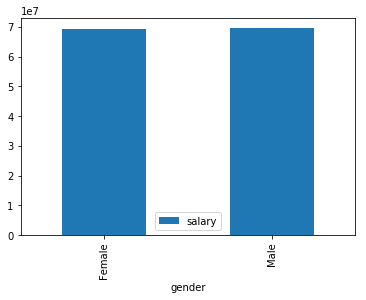

In [180]:
pandasDF.groupby('gender').sum().plot(kind='bar',legend='reverse')


Text(0.5, 0, 'Male and Memale')

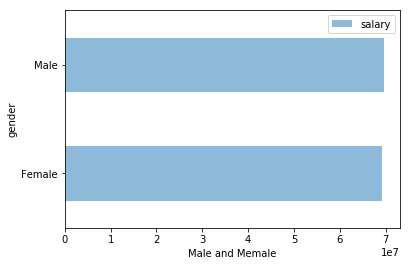

In [178]:
pandasDF.groupby('gender').sum().plot(kind='barh',legend='reverse',alpha=0.5)
plt.xlabel('Male and Memale')

salary
12380.49     AxesSubplot(0.125,0.125;0.775x0.755)
12834.80     AxesSubplot(0.125,0.125;0.775x0.755)
13268.99     AxesSubplot(0.125,0.125;0.775x0.755)
13375.17     AxesSubplot(0.125,0.125;0.775x0.755)
13574.77     AxesSubplot(0.125,0.125;0.775x0.755)
13673.35     AxesSubplot(0.125,0.125;0.775x0.755)
14247.62     AxesSubplot(0.125,0.125;0.775x0.755)
14673.04     AxesSubplot(0.125,0.125;0.775x0.755)
15270.86     AxesSubplot(0.125,0.125;0.775x0.755)
15423.09     AxesSubplot(0.125,0.125;0.775x0.755)
15592.05     AxesSubplot(0.125,0.125;0.775x0.755)
15754.79     AxesSubplot(0.125,0.125;0.775x0.755)
16022.68     AxesSubplot(0.125,0.125;0.775x0.755)
16358.80     AxesSubplot(0.125,0.125;0.775x0.755)
16468.24     AxesSubplot(0.125,0.125;0.775x0.755)
16506.02     AxesSubplot(0.125,0.125;0.775x0.755)
17175.01     AxesSubplot(0.125,0.125;0.775x0.755)
17658.63     AxesSubplot(0.125,0.125;0.775x0.755)
17758.66     AxesSubplot(0.125,0.125;0.775x0.755)
17931.92     AxesSubplot(0.125,0.125;0.775x

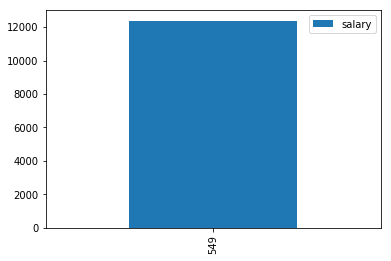

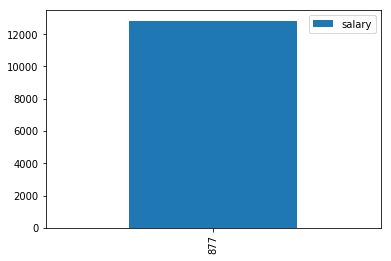

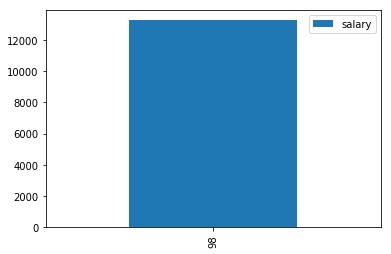

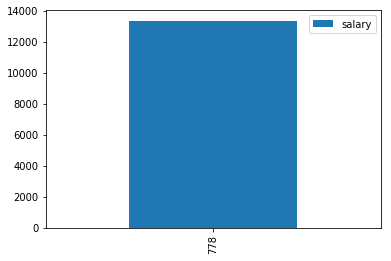

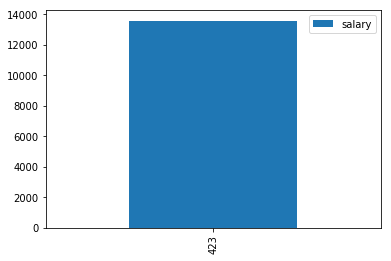

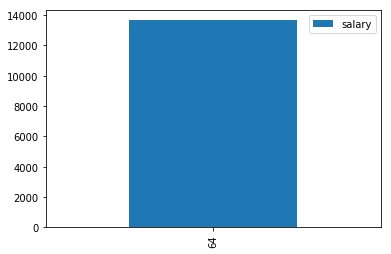

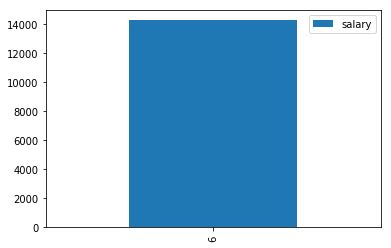

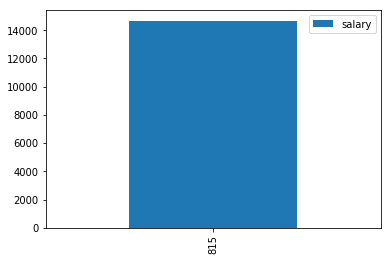

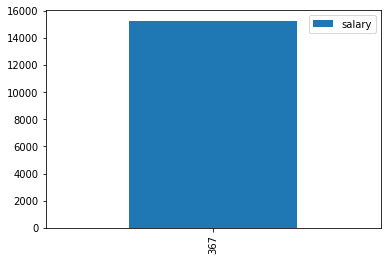

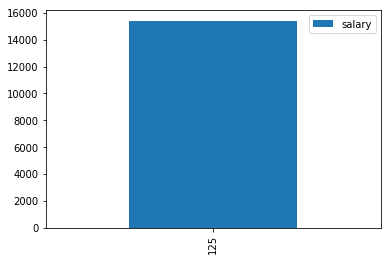

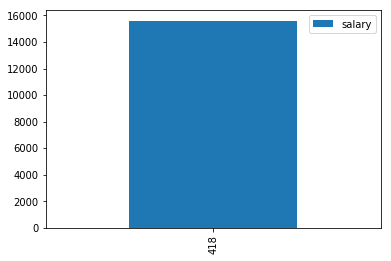

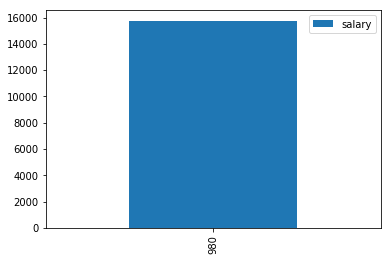

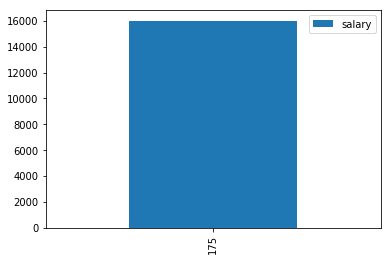

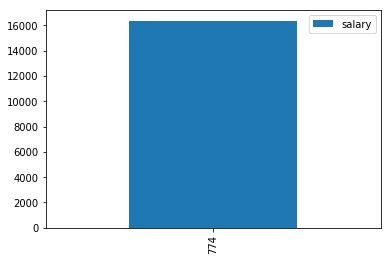

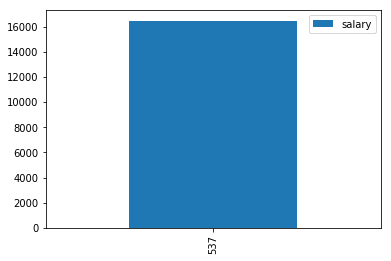

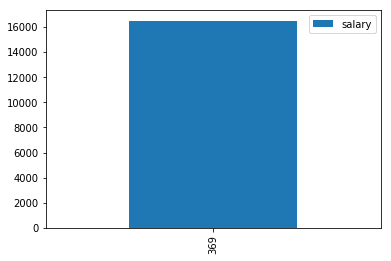

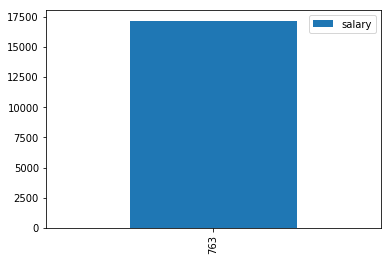

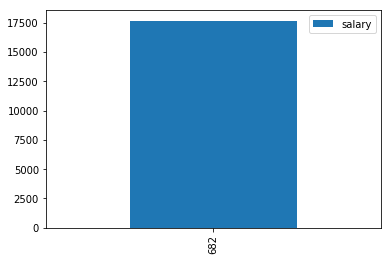

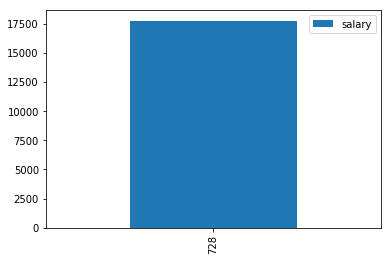

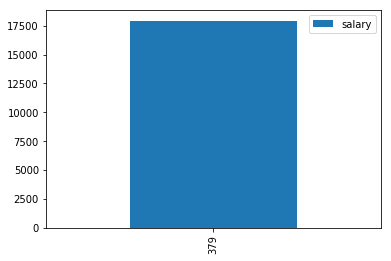

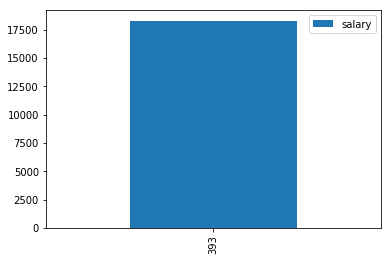

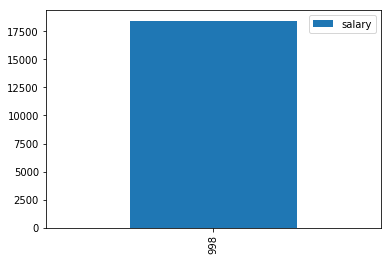

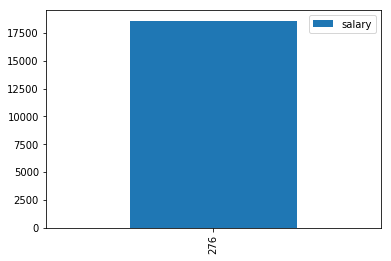

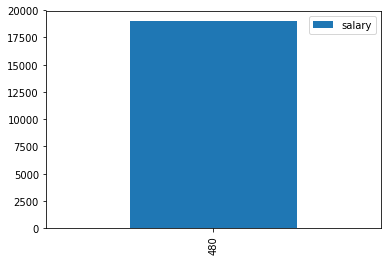

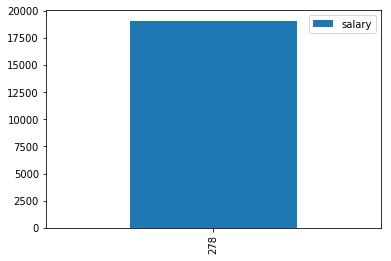

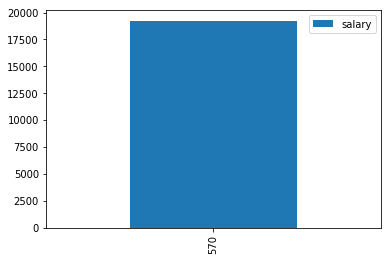

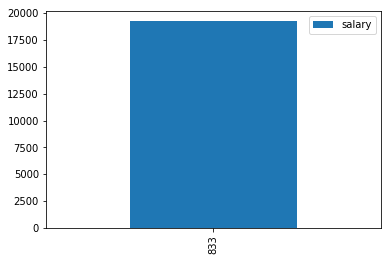

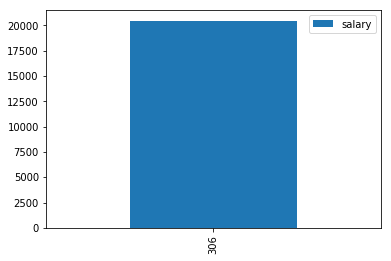

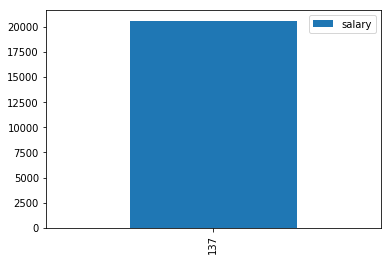

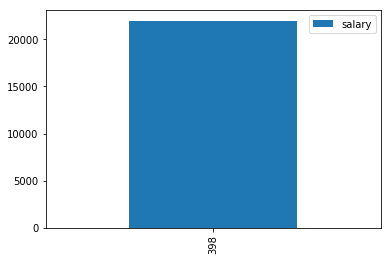

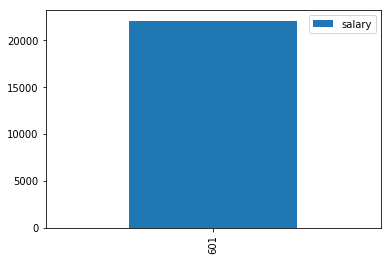

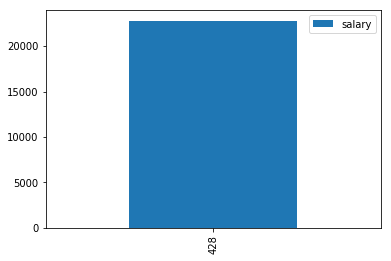

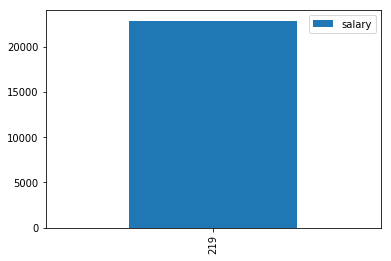

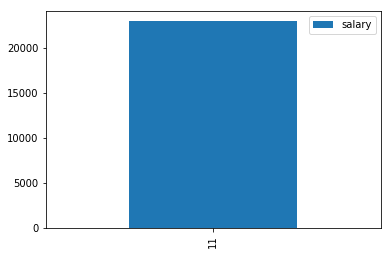

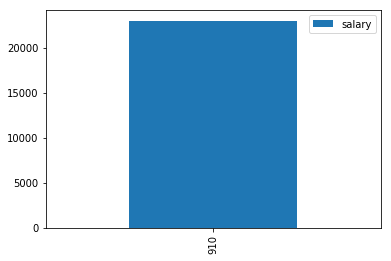

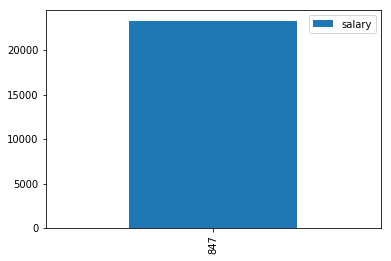

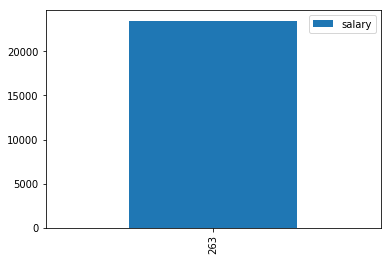

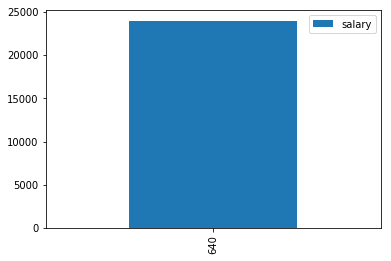

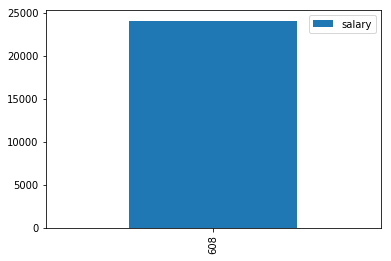

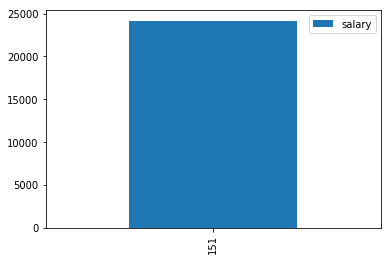

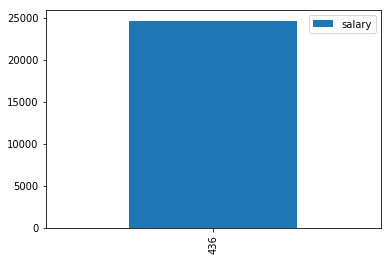

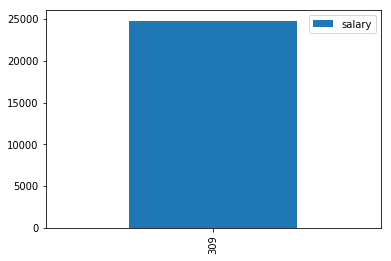

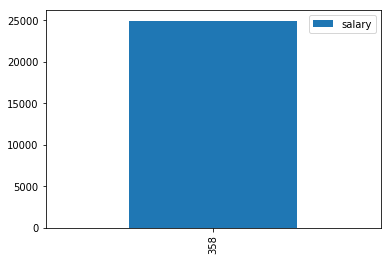

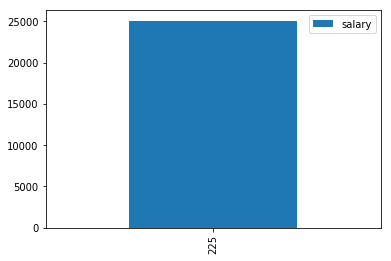

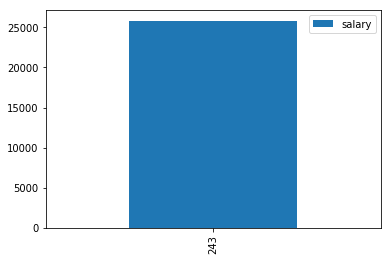

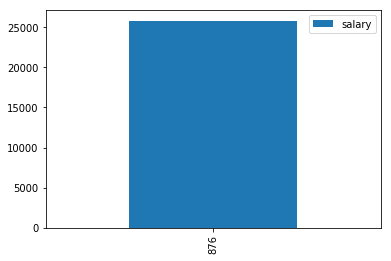

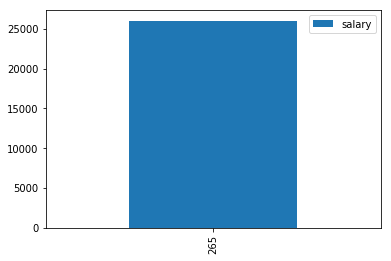

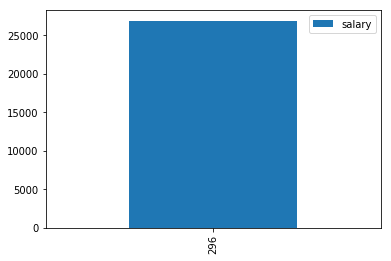

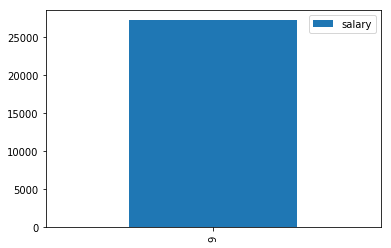

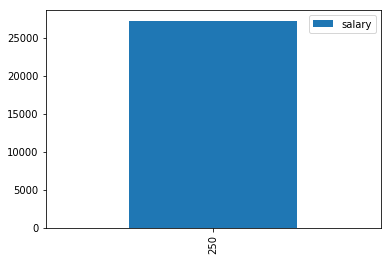

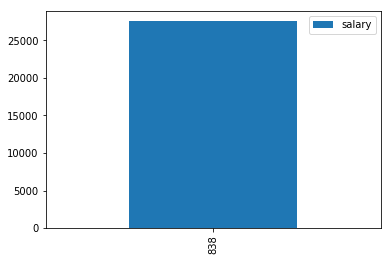

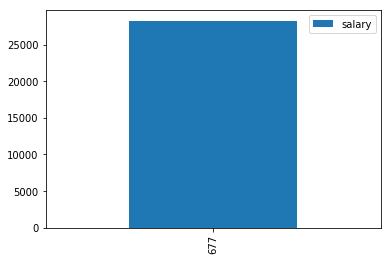

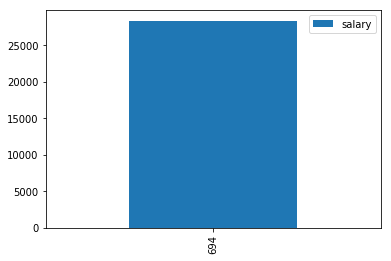

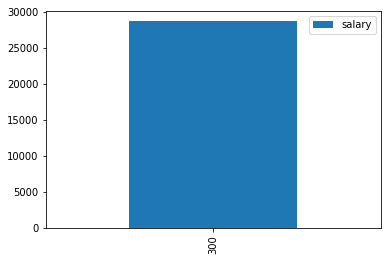

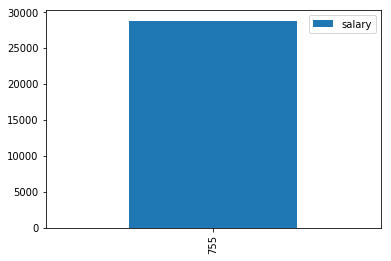

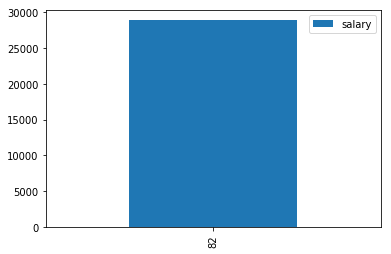

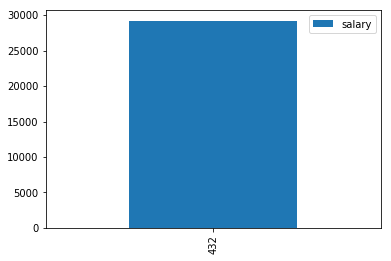

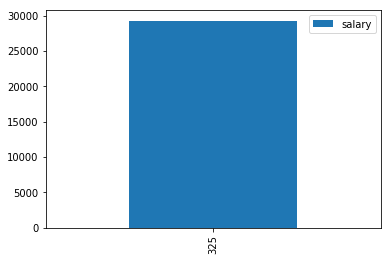

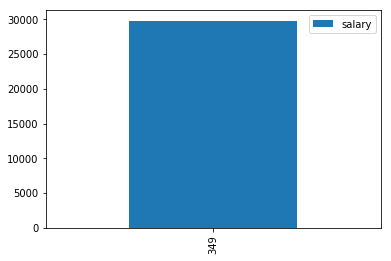

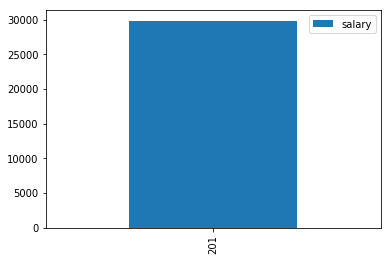

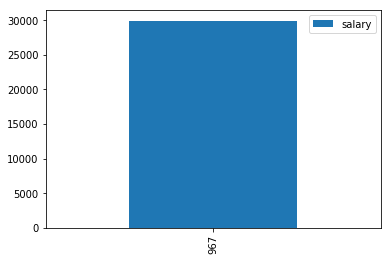

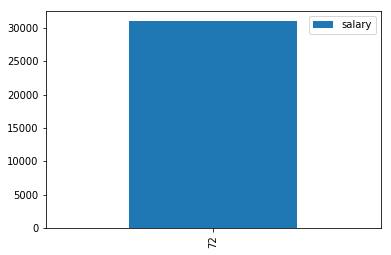

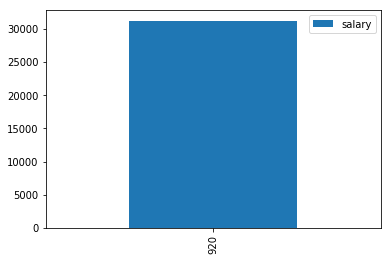

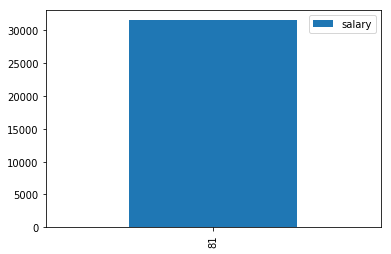

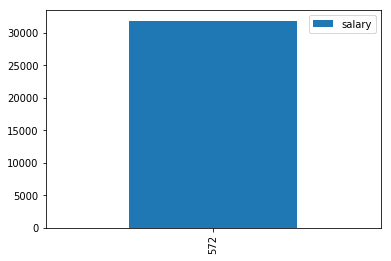

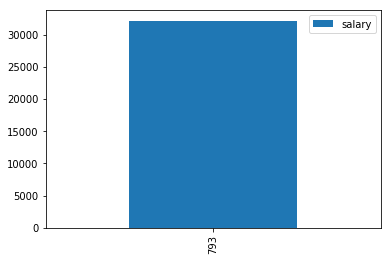

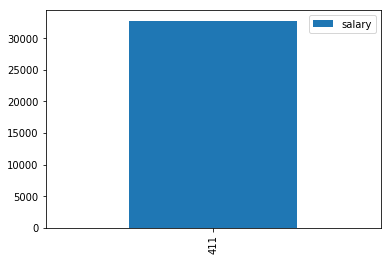

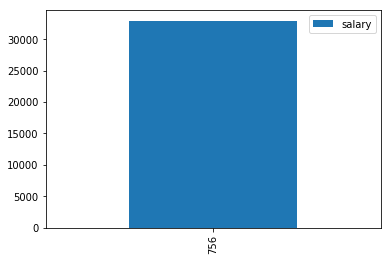

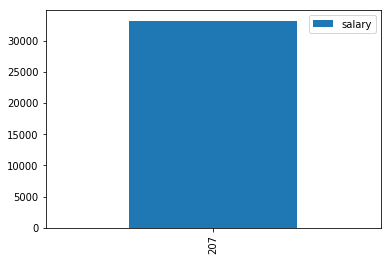

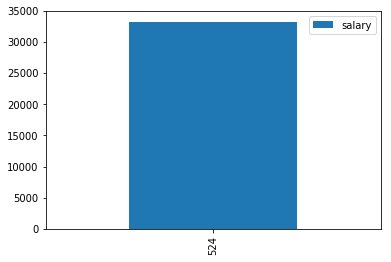

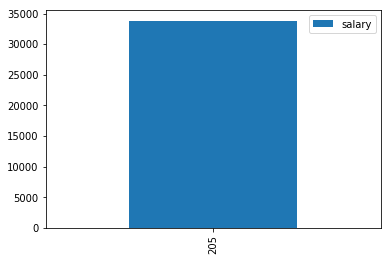

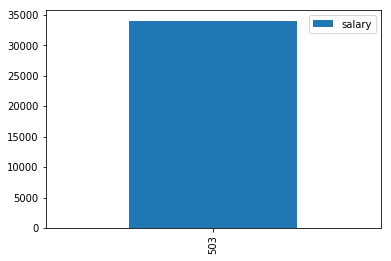

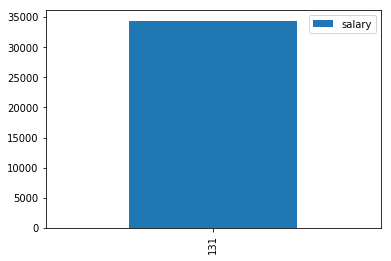

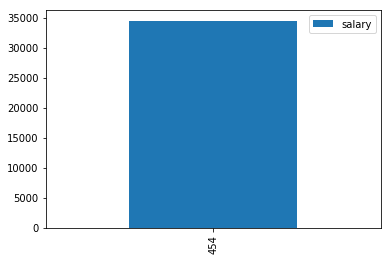

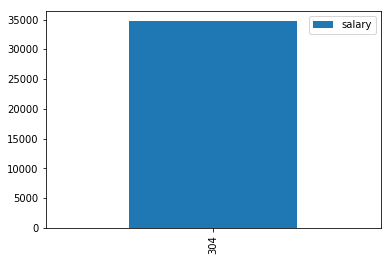

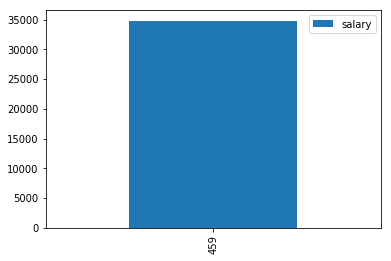

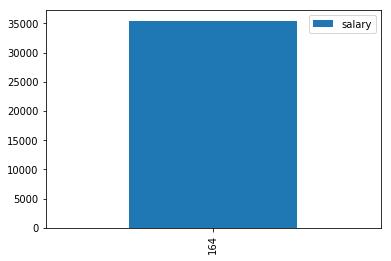

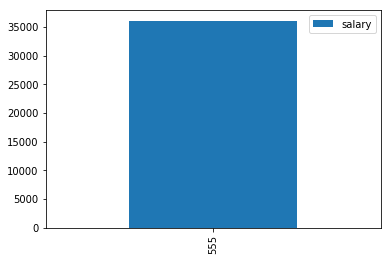

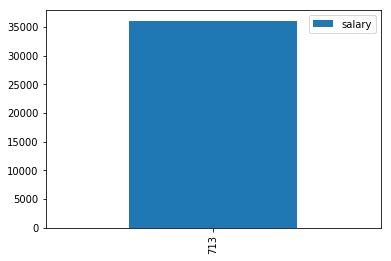

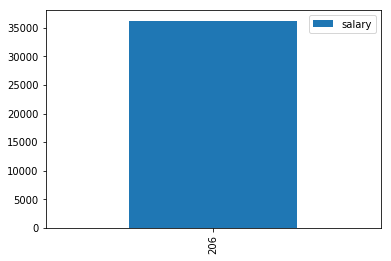

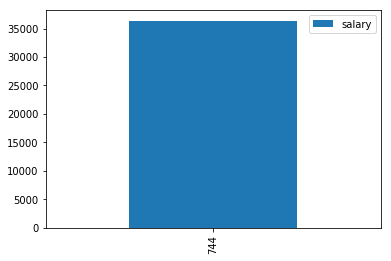

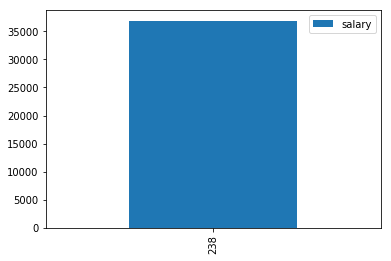

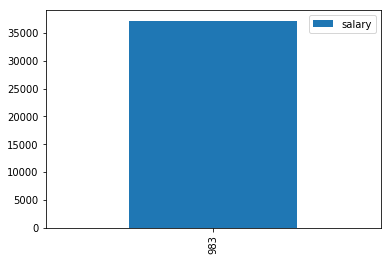

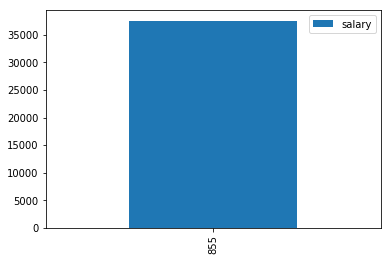

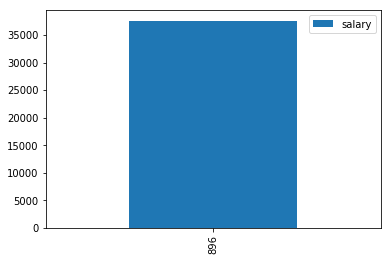

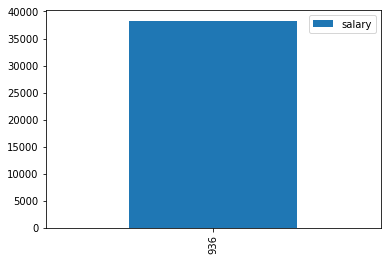

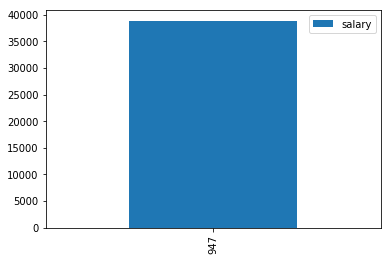

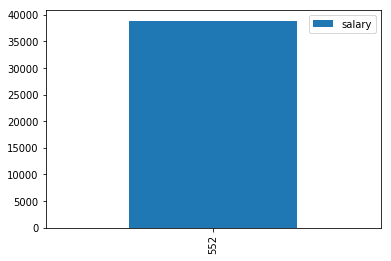

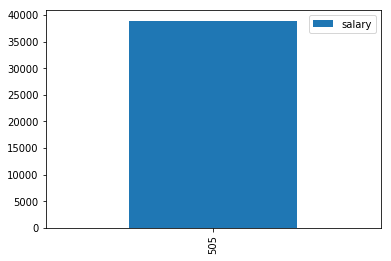

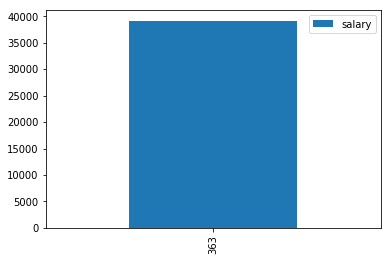

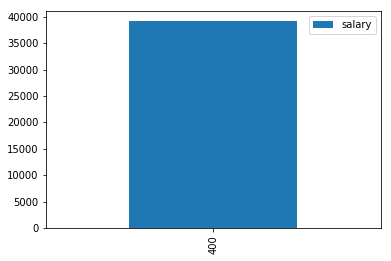

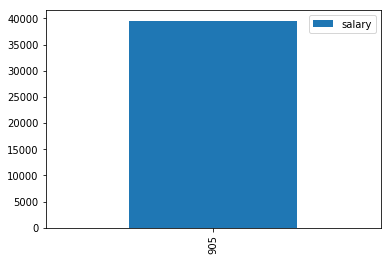

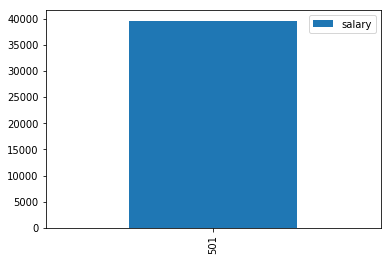

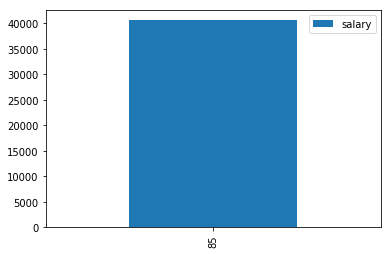

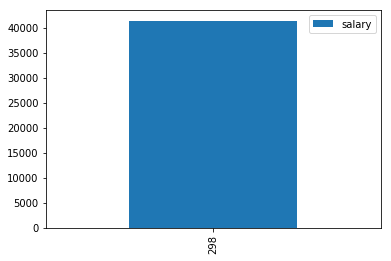

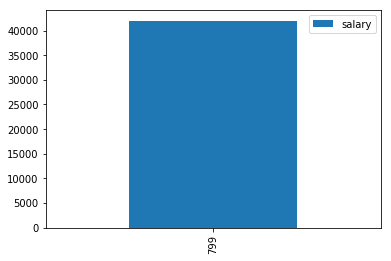

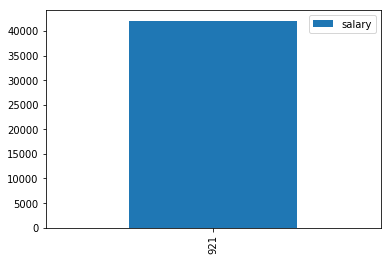

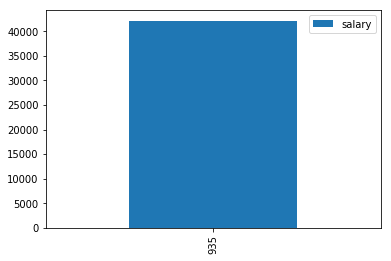

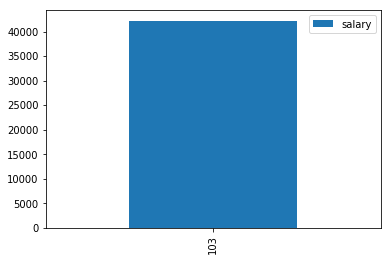

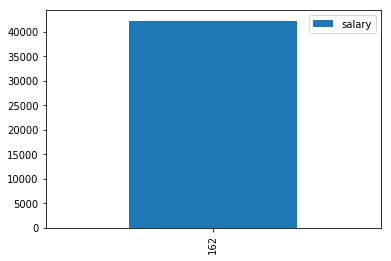

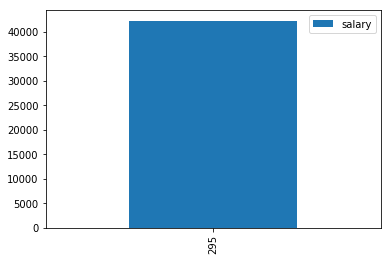

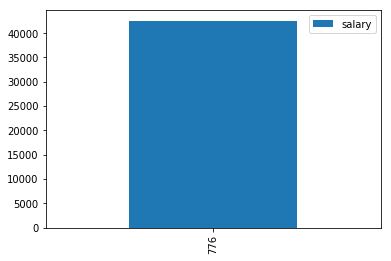

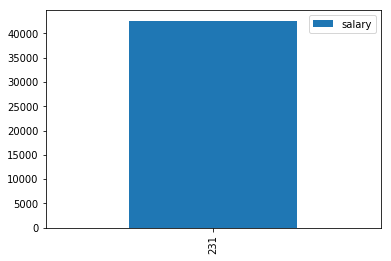

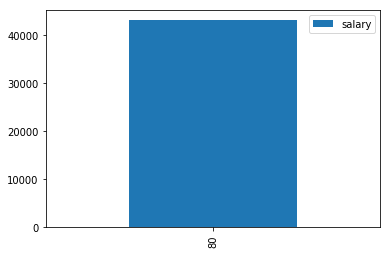

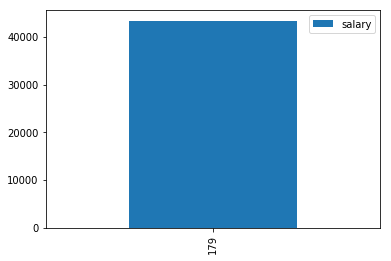

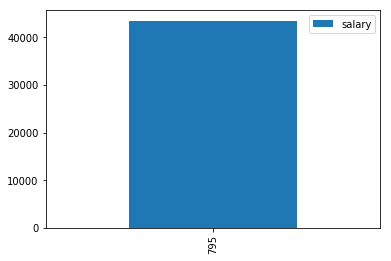

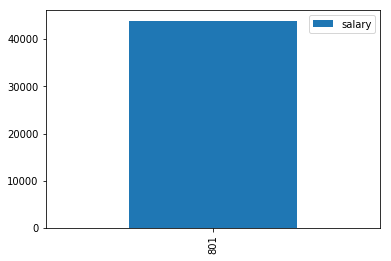

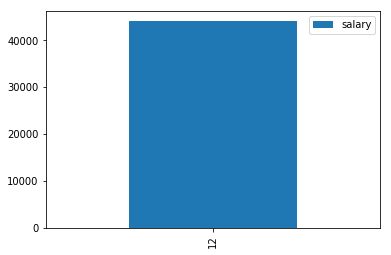

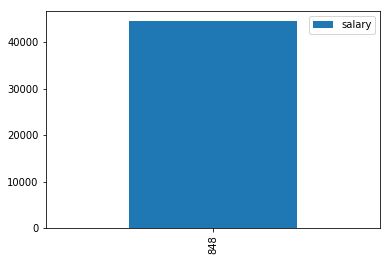

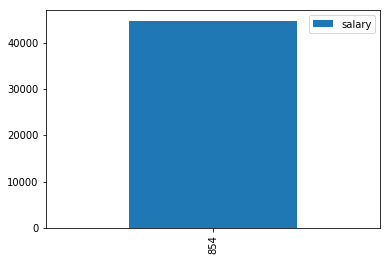

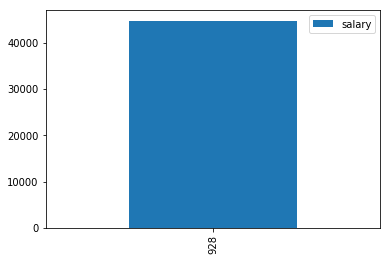

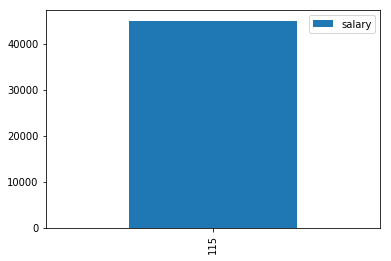

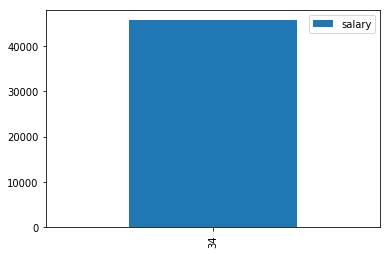

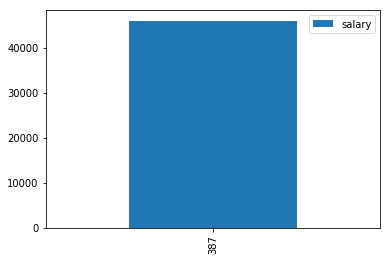

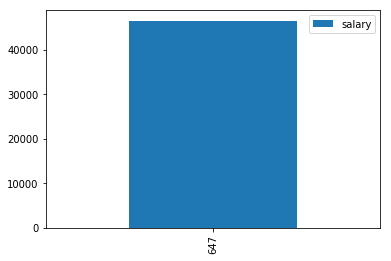

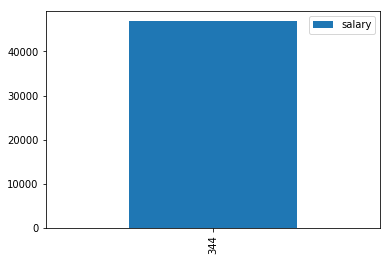

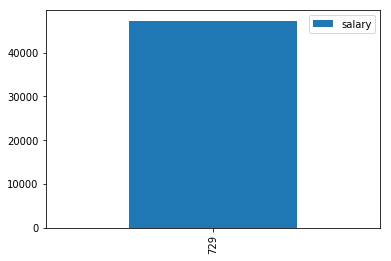

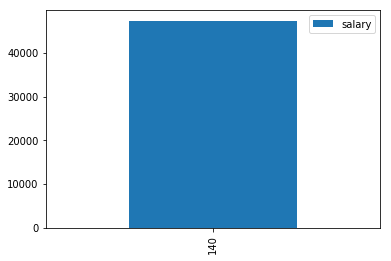

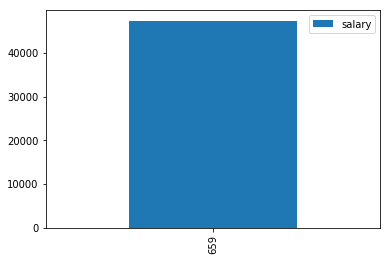

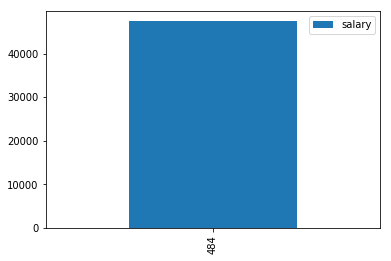

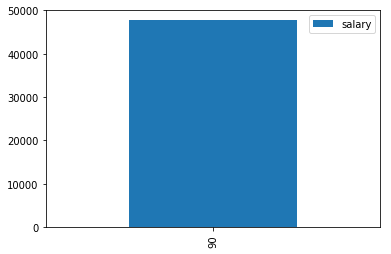

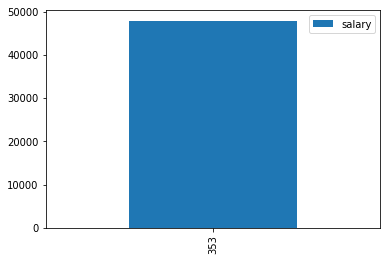

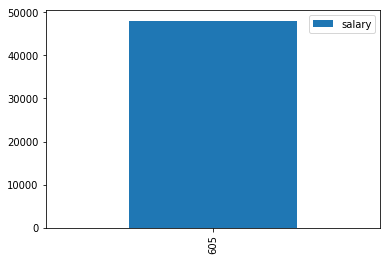

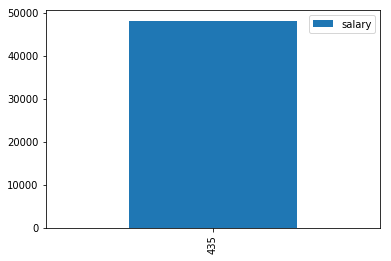

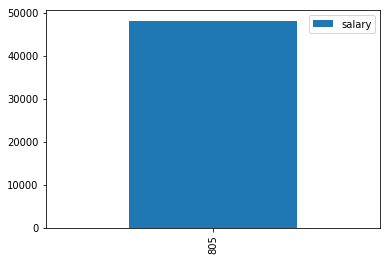

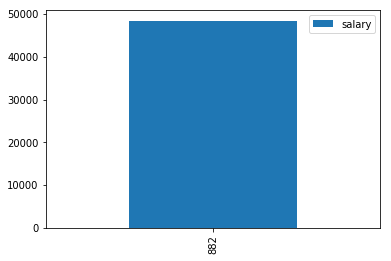

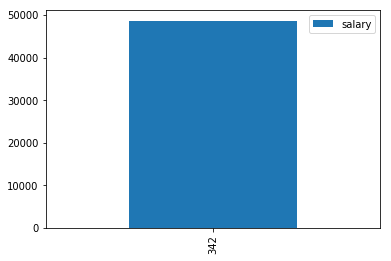

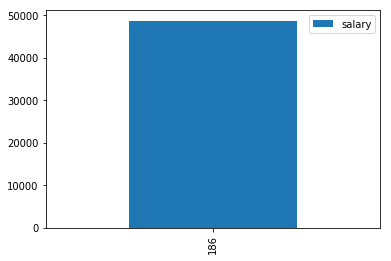

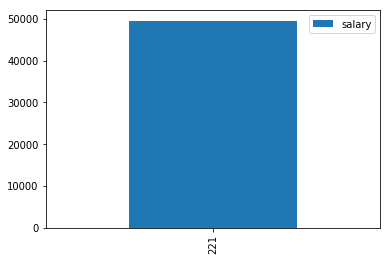

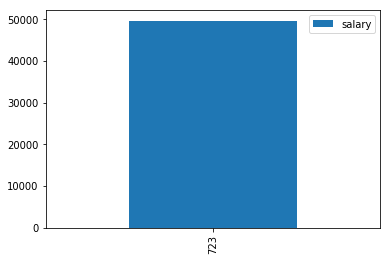

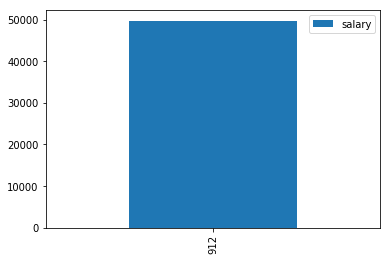

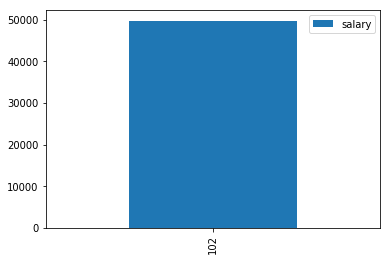

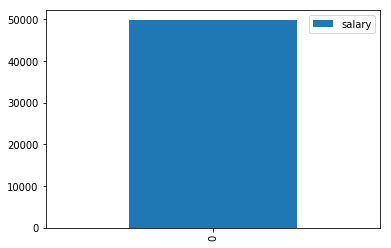

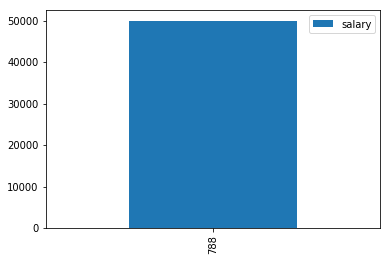

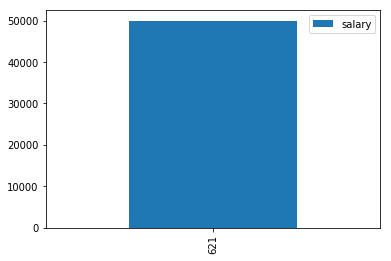

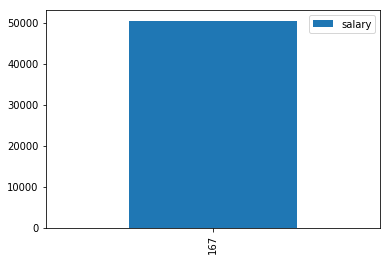

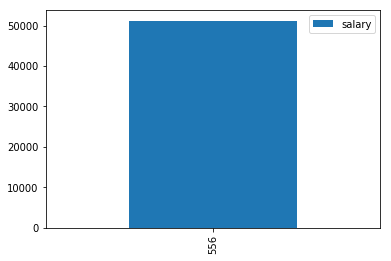

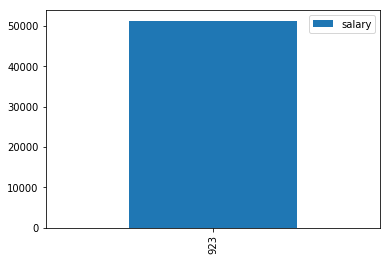

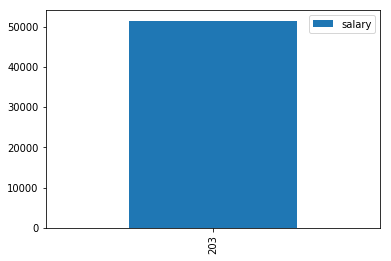

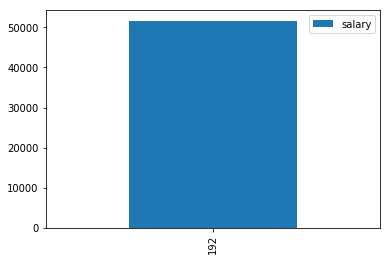

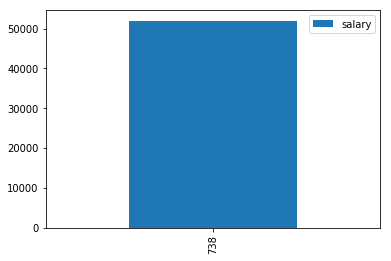

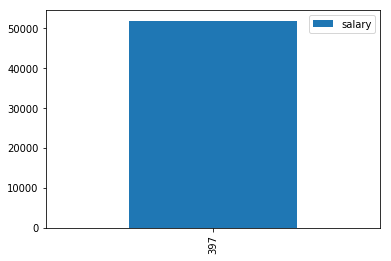

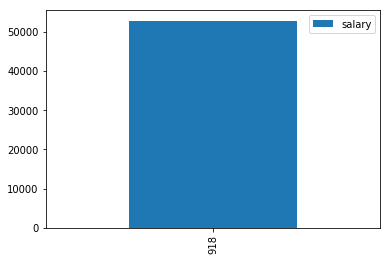

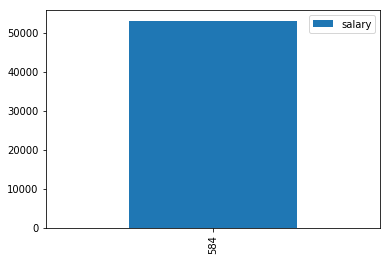

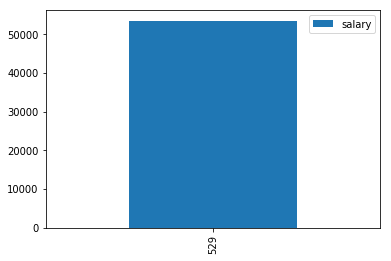

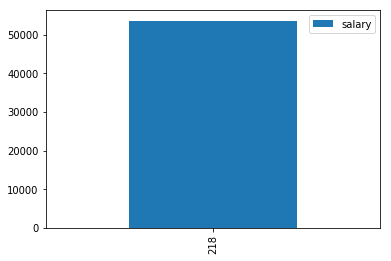

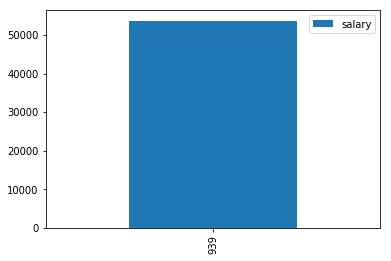

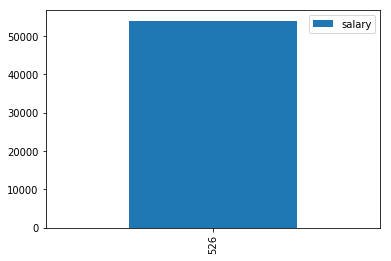

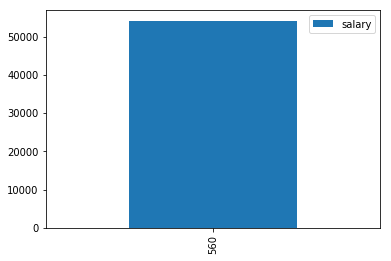

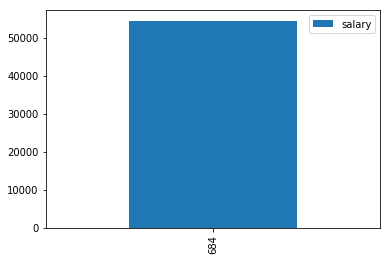

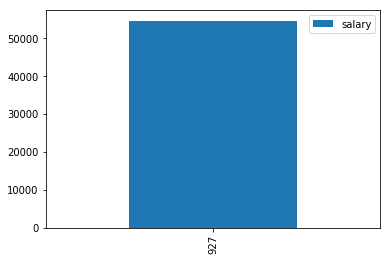

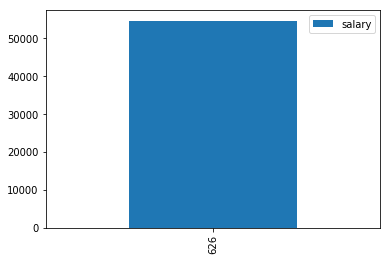

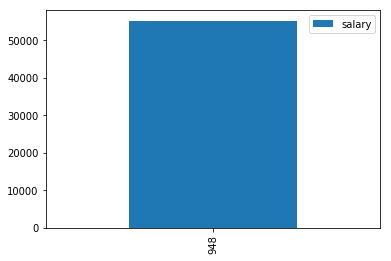

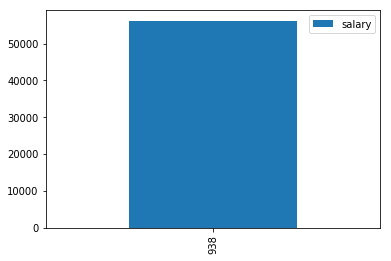

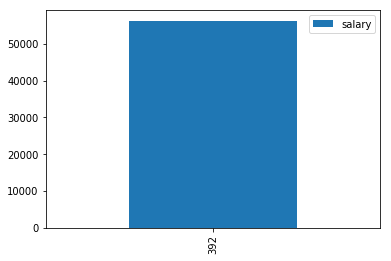

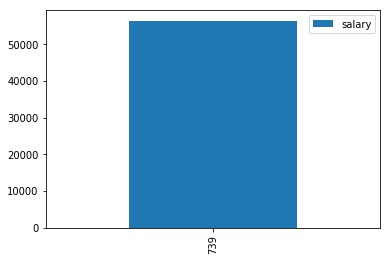

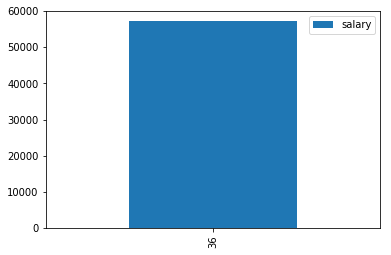

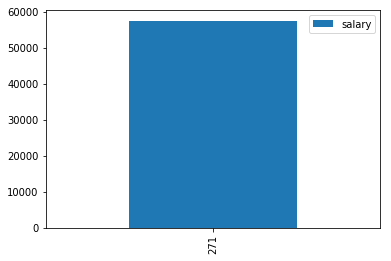

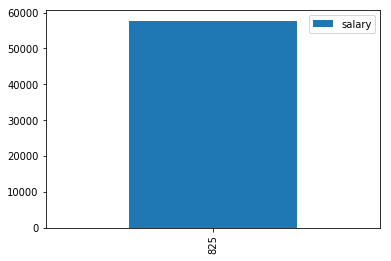

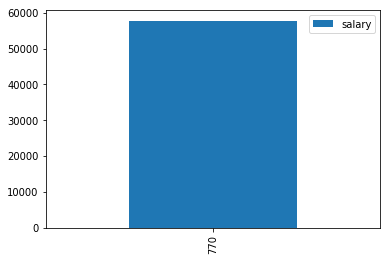

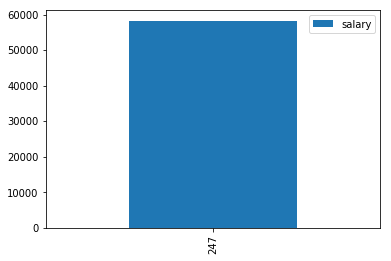

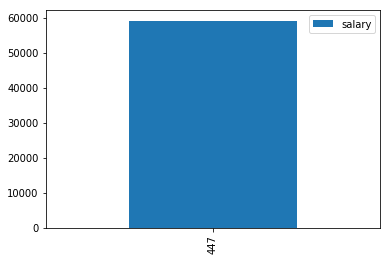

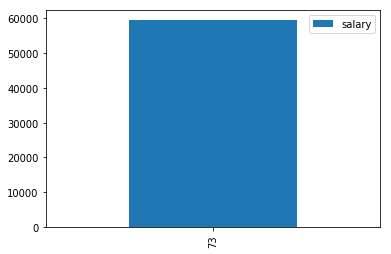

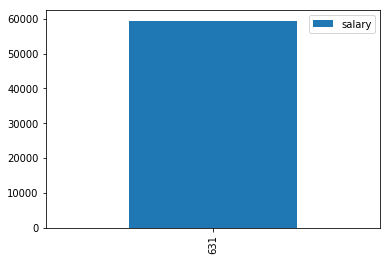

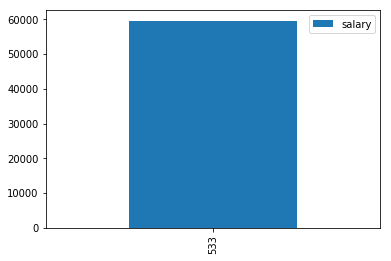

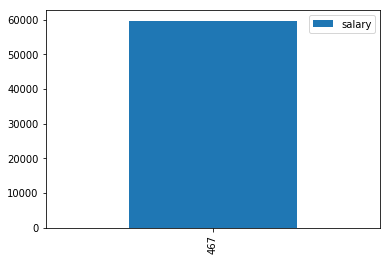

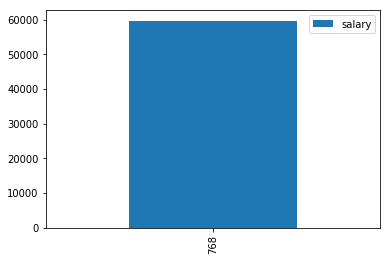

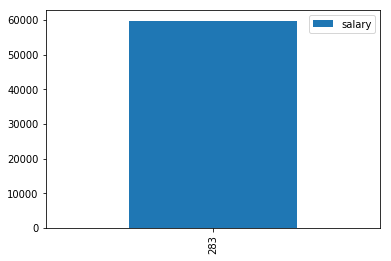

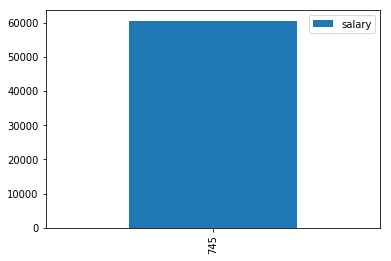

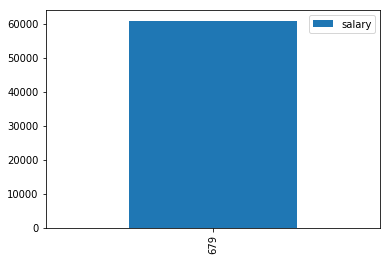

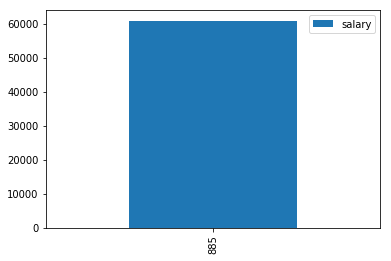

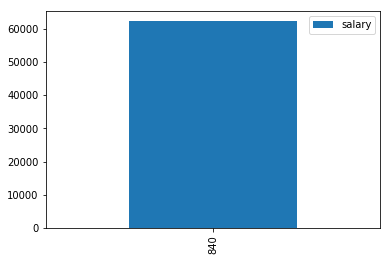

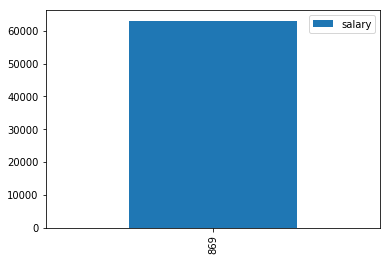

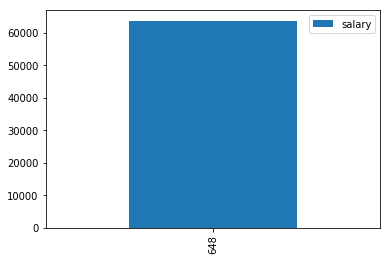

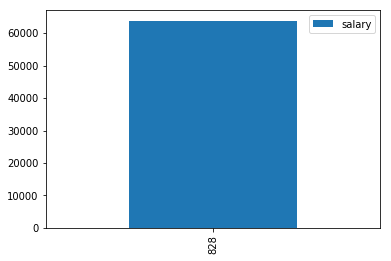

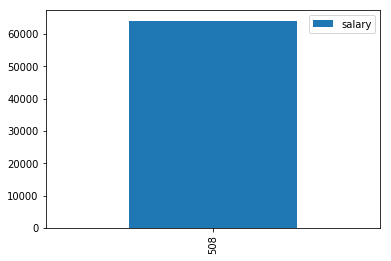

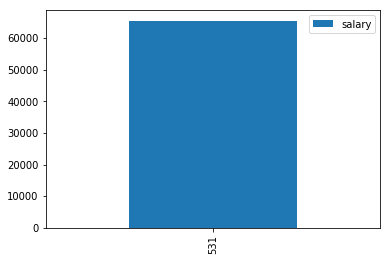

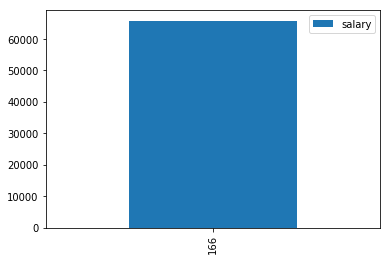

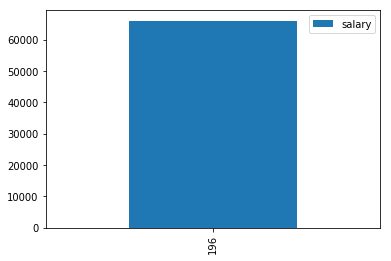

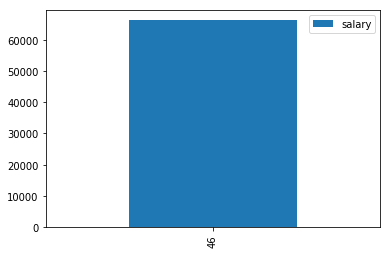

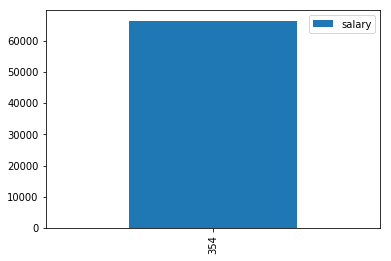

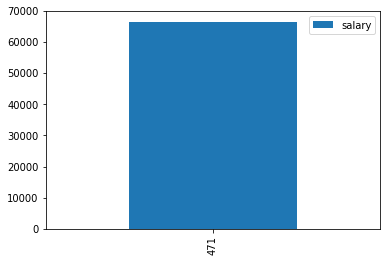

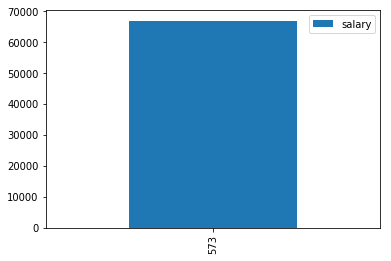

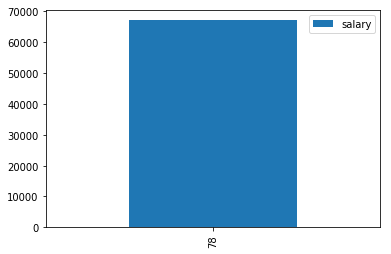

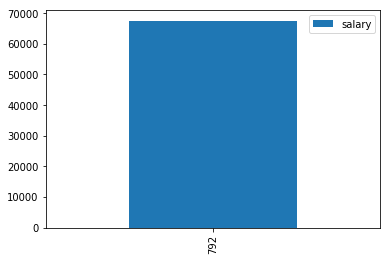

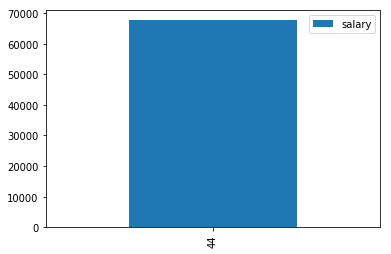

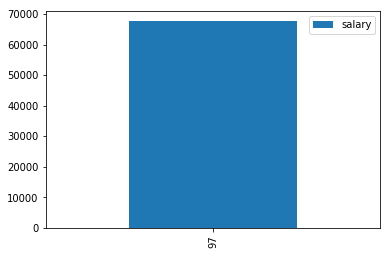

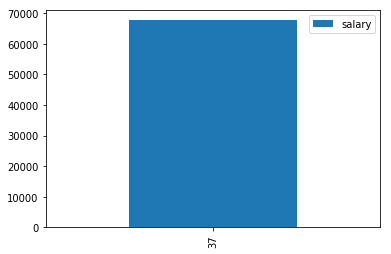

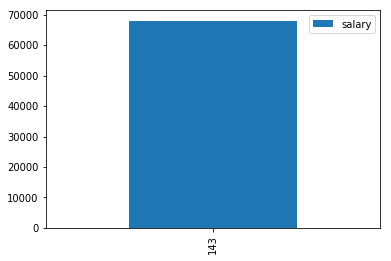

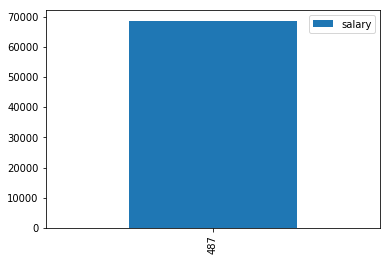

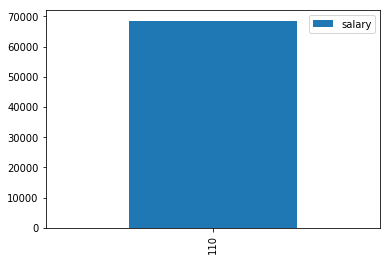

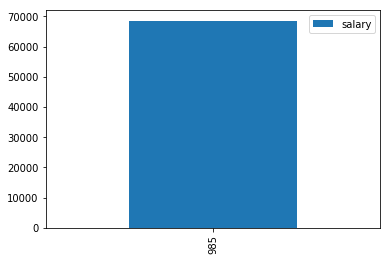

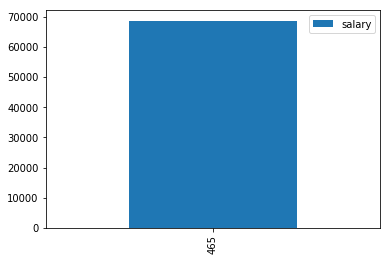

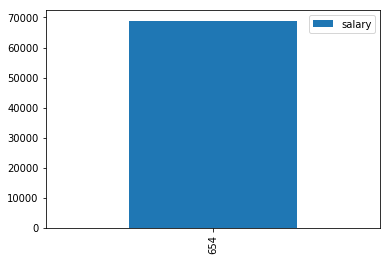

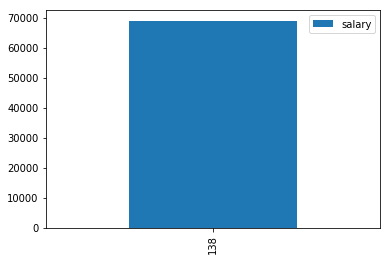

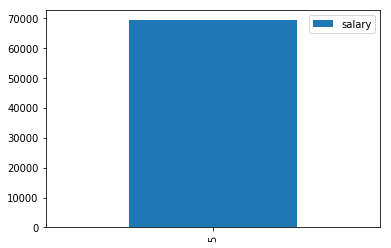

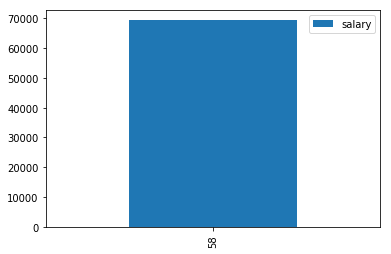

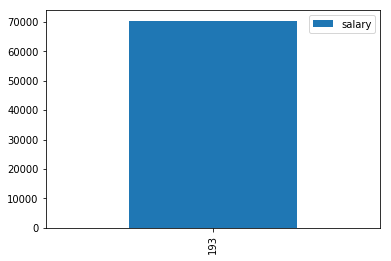

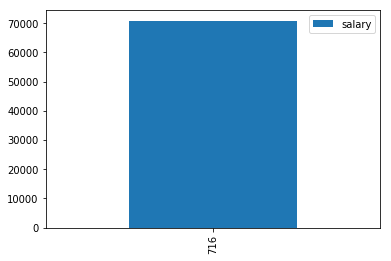

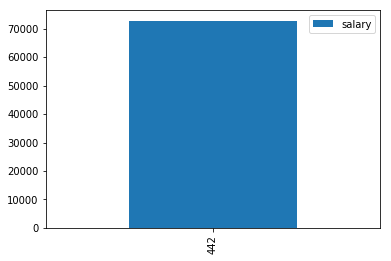

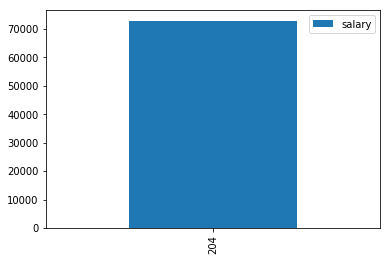

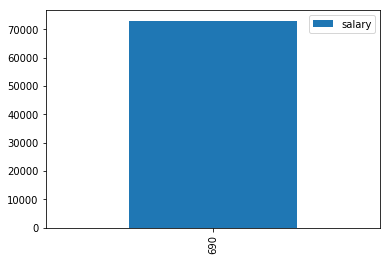

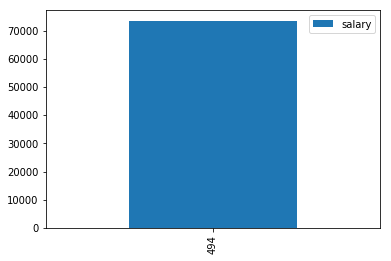

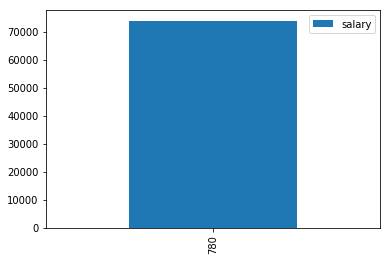

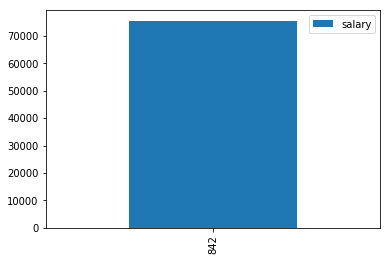

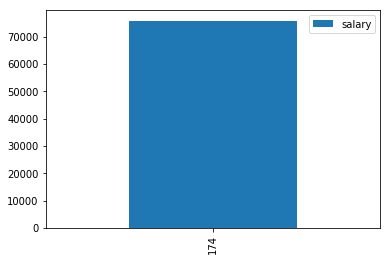

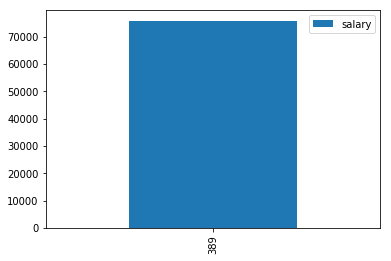

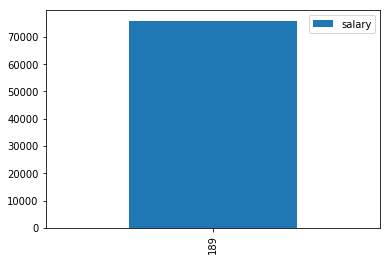

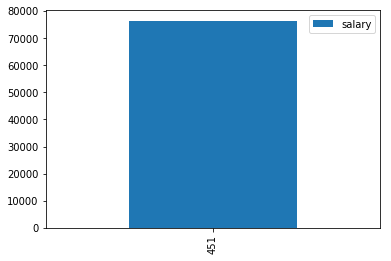

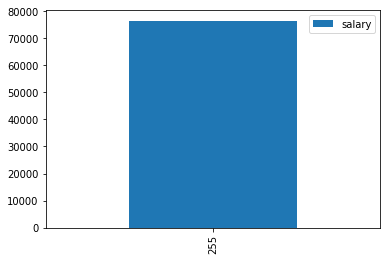

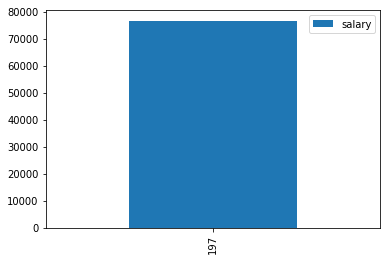

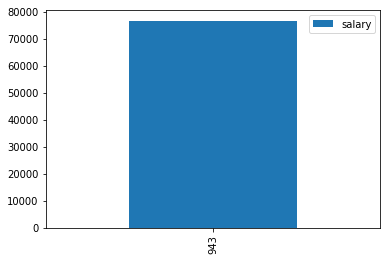

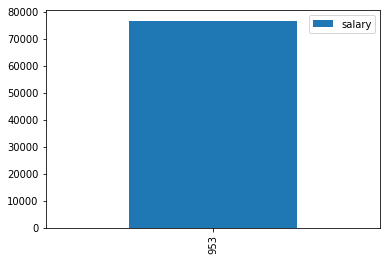

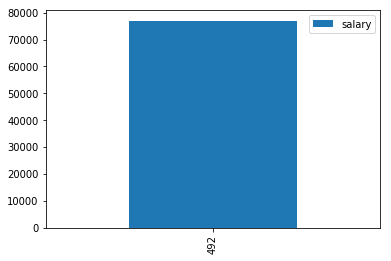

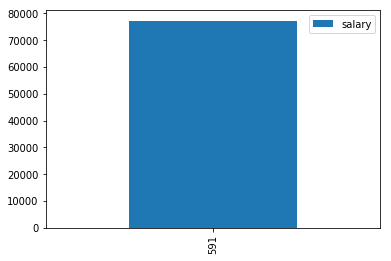

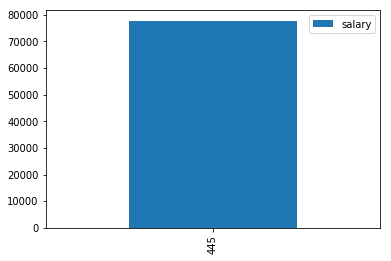

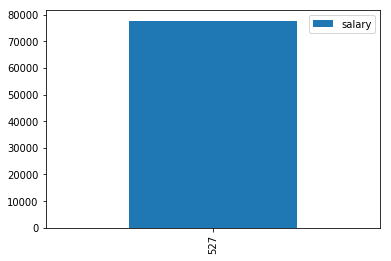

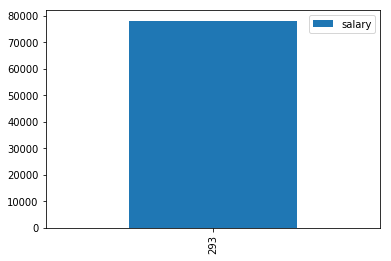

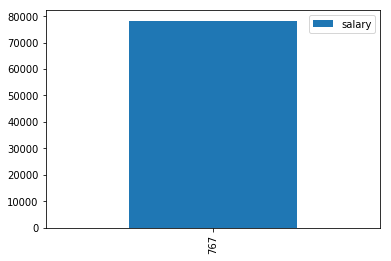

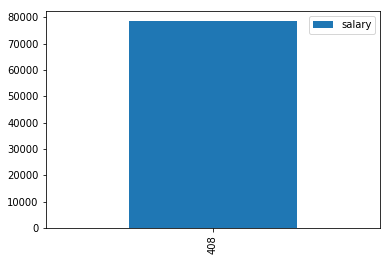

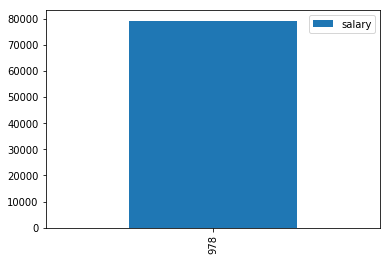

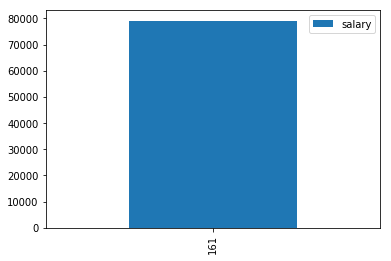

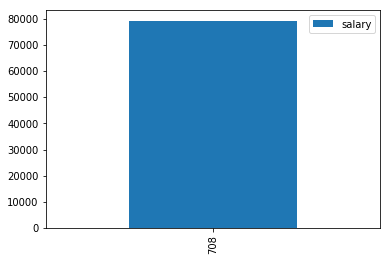

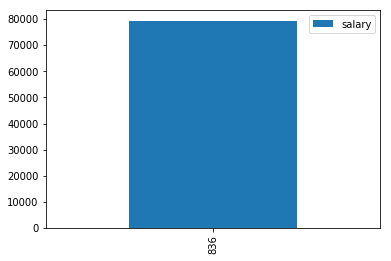

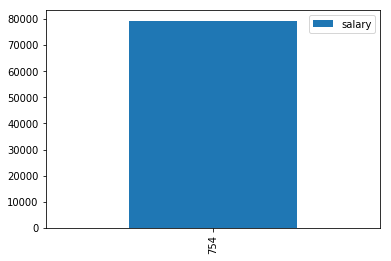

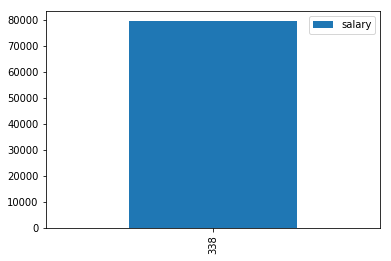

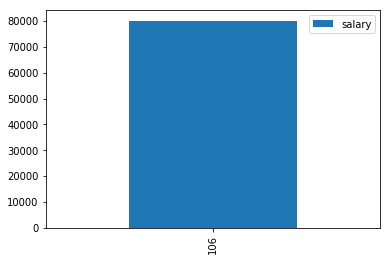

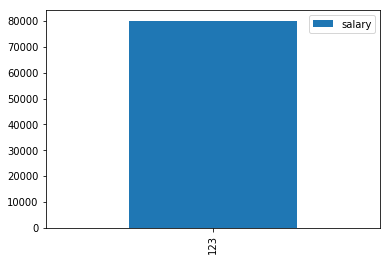

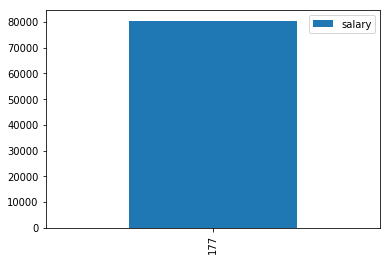

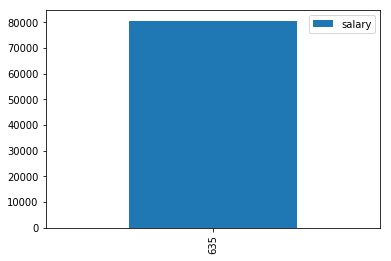

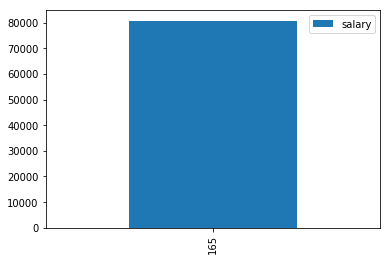

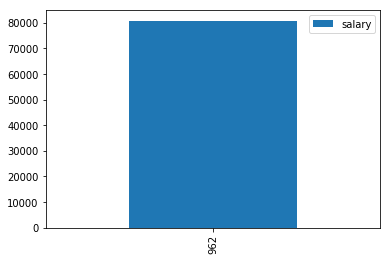

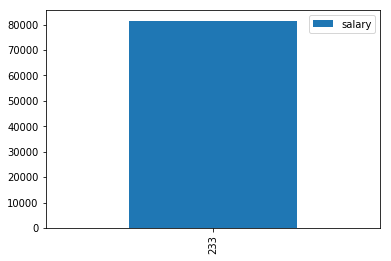

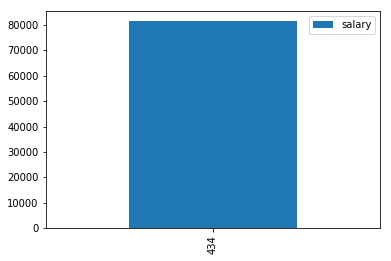

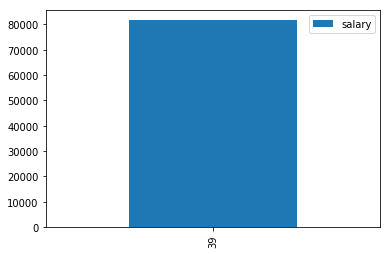

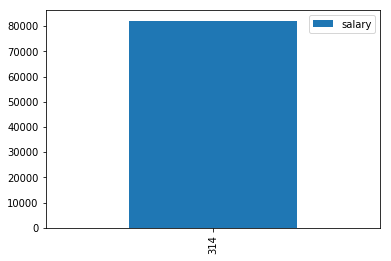

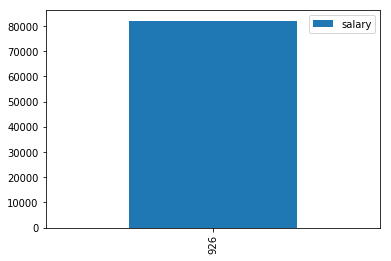

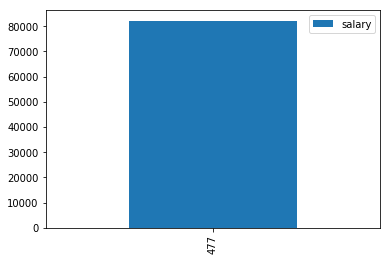

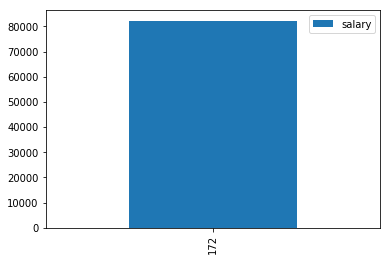

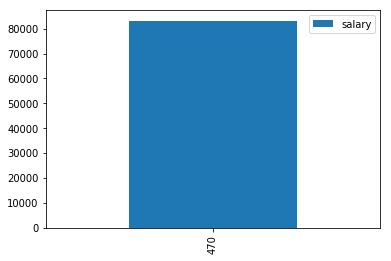

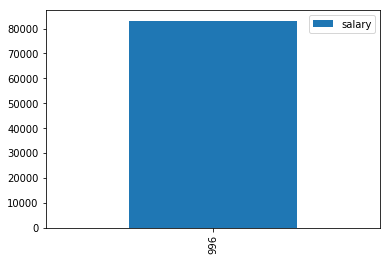

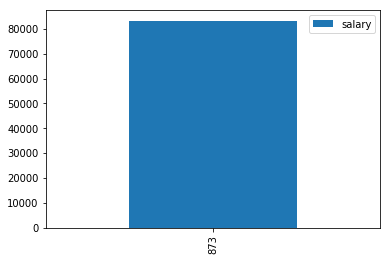

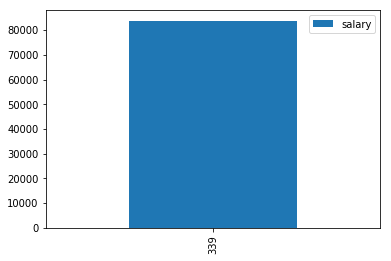

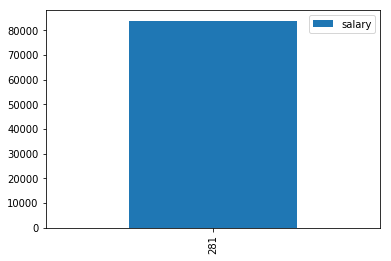

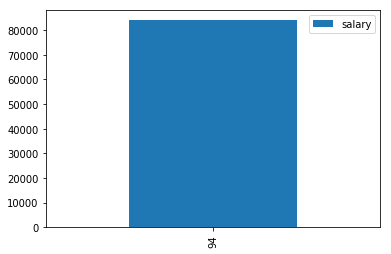

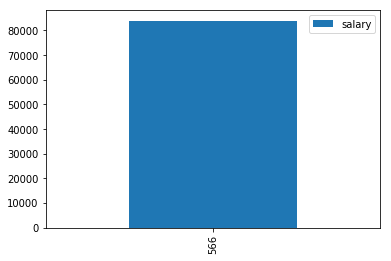

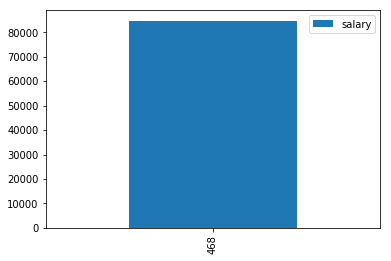

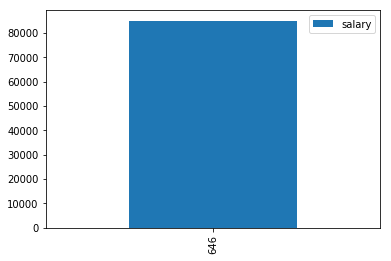

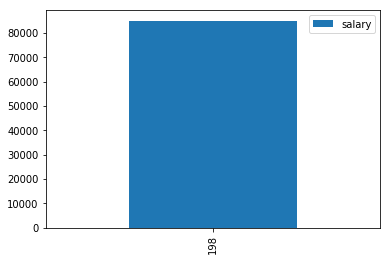

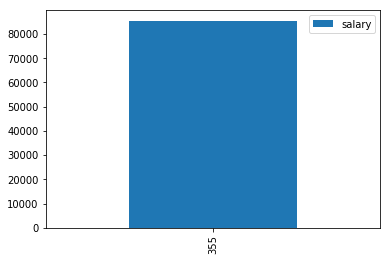

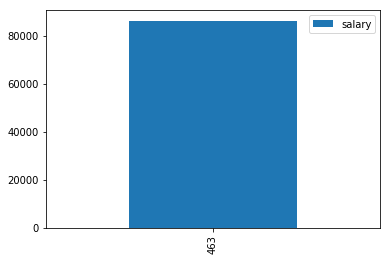

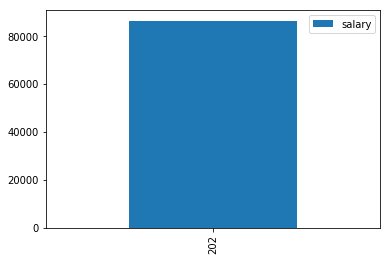

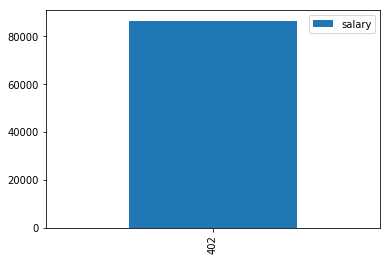

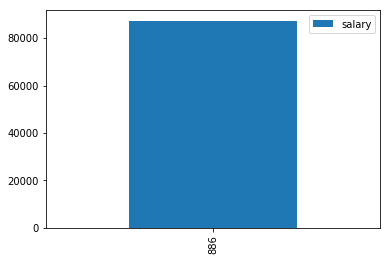

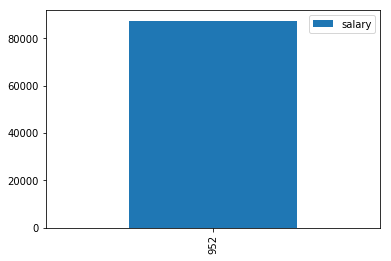

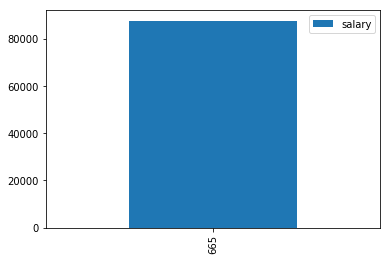

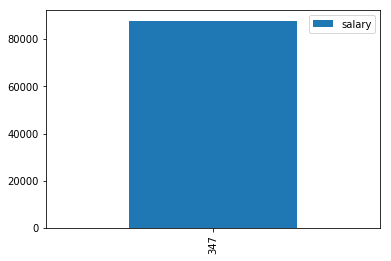

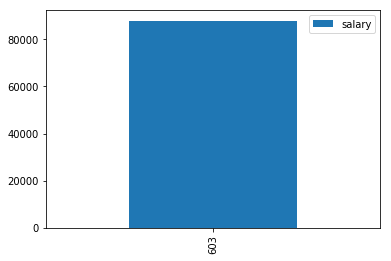

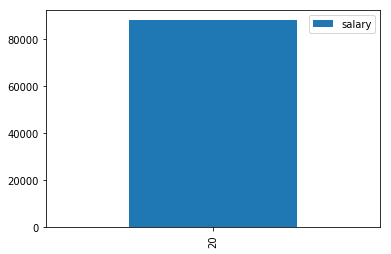

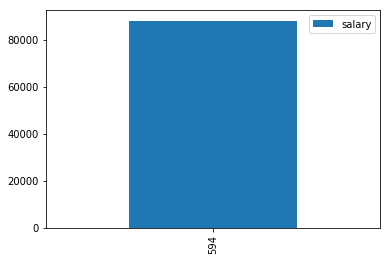

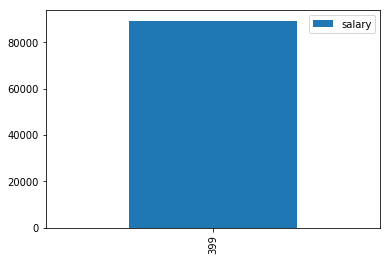

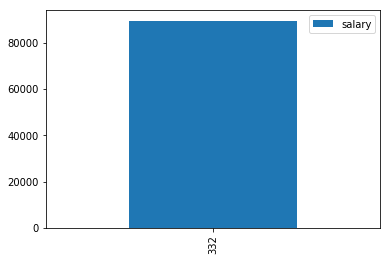

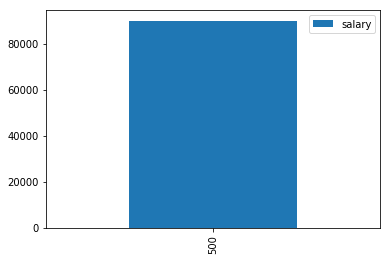

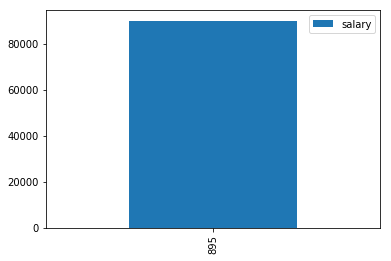

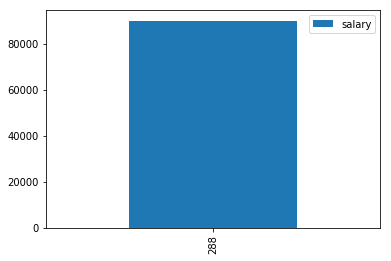

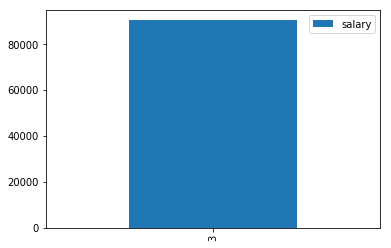

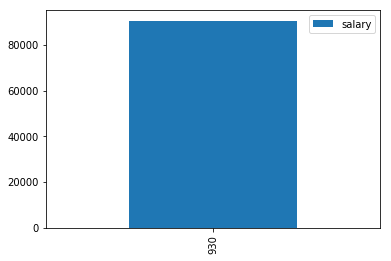

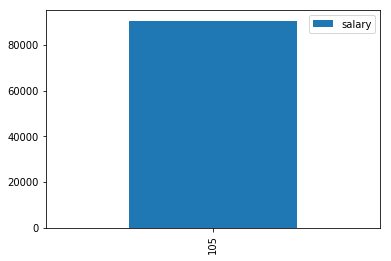

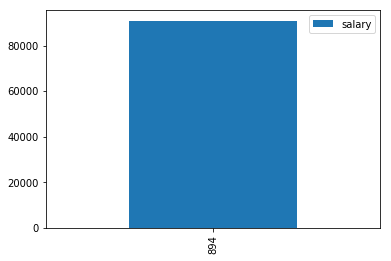

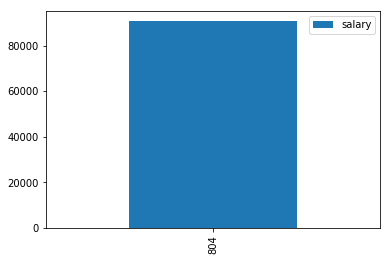

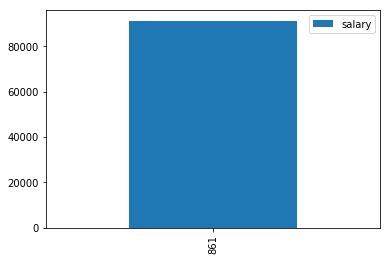

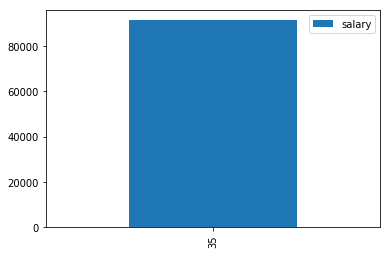

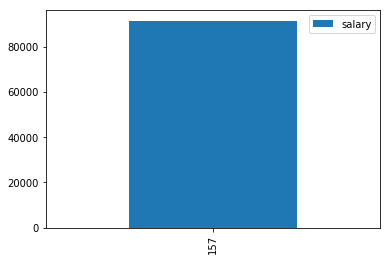

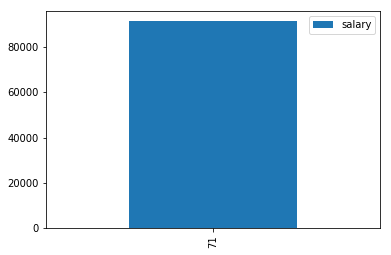

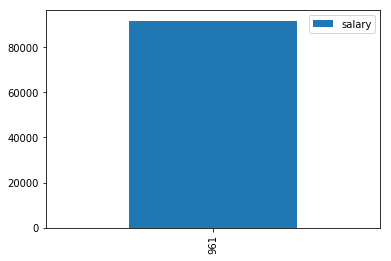

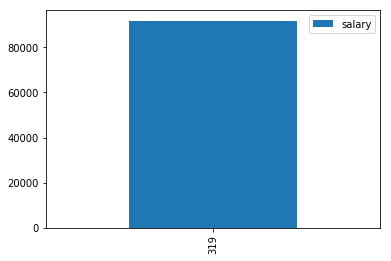

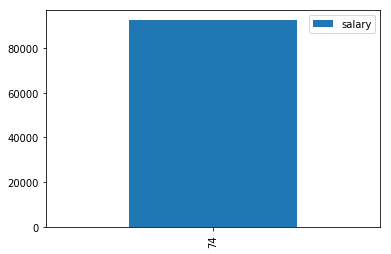

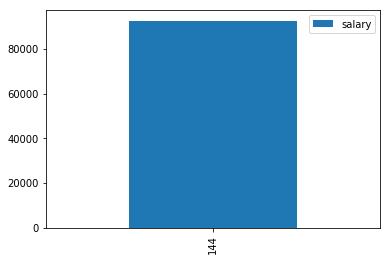

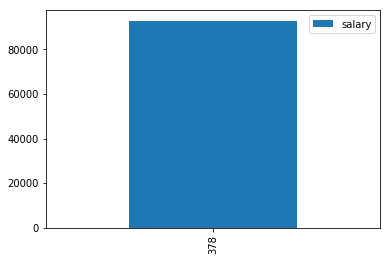

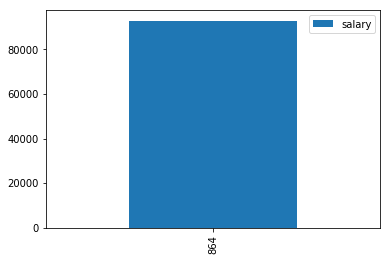

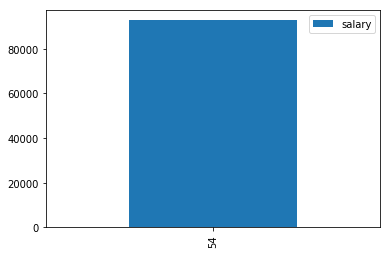

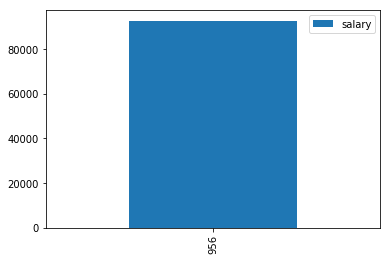

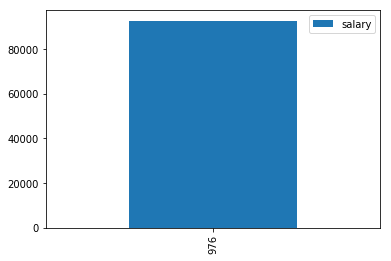

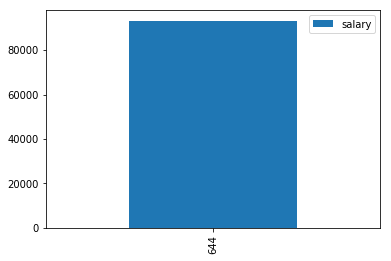

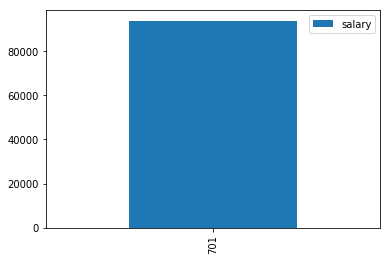

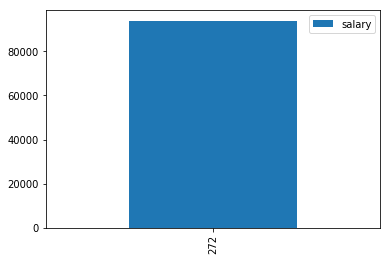

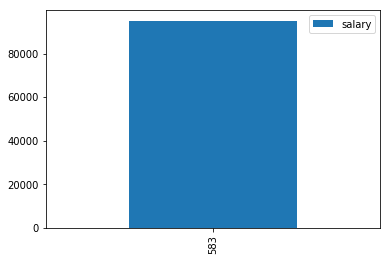

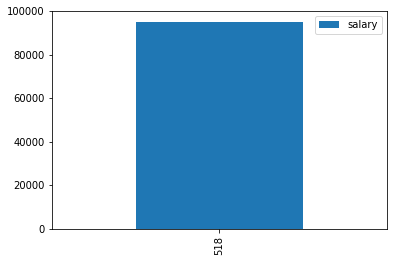

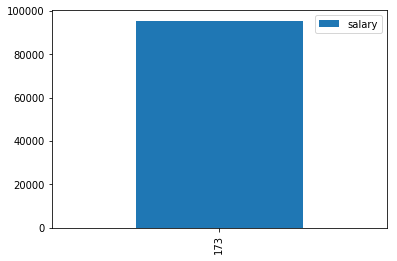

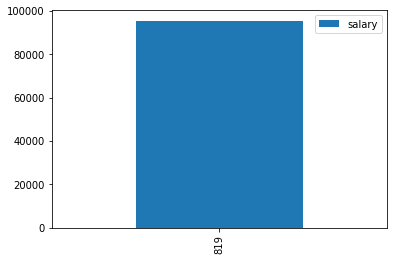

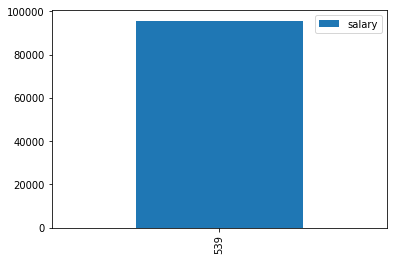

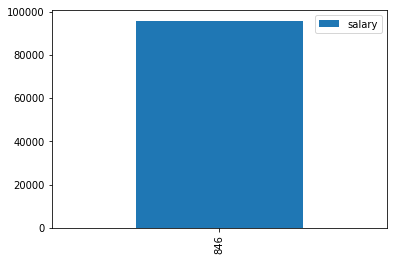

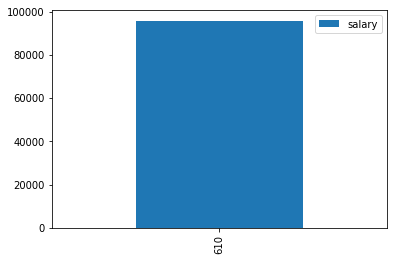

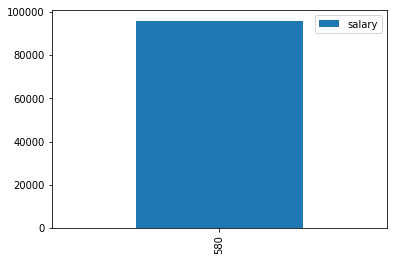

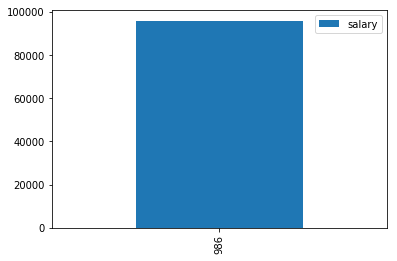

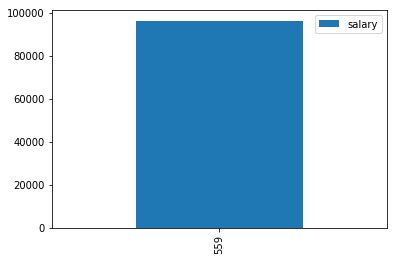

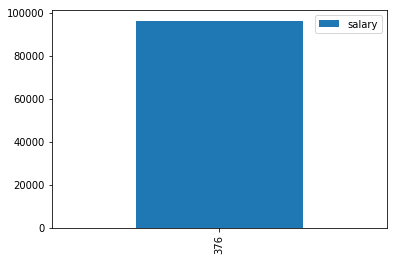

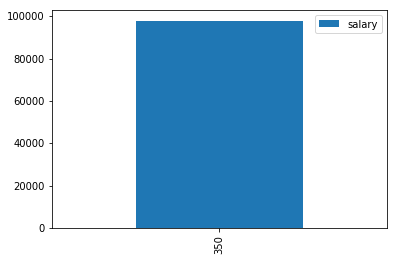

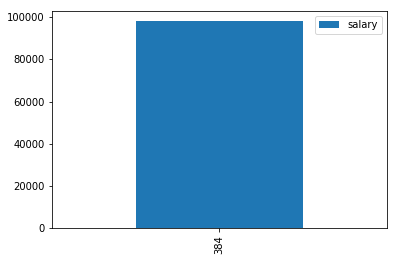

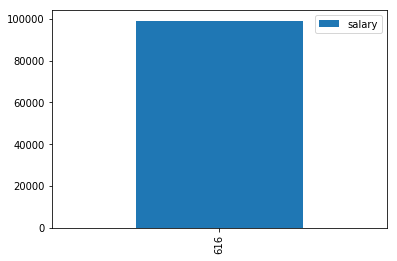

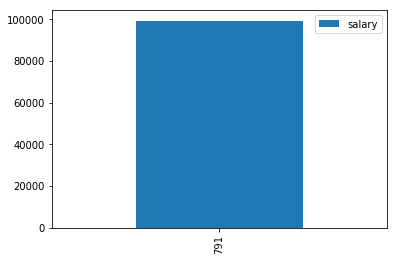

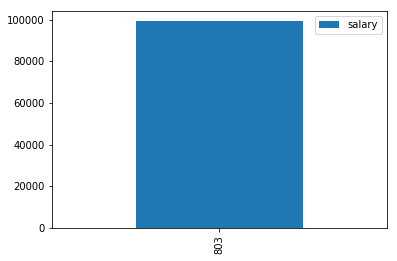

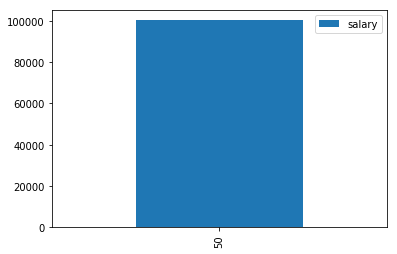

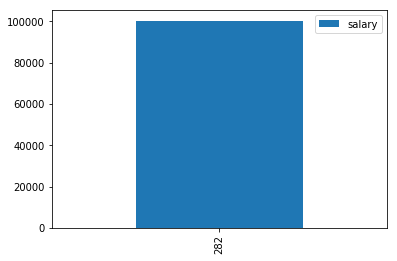

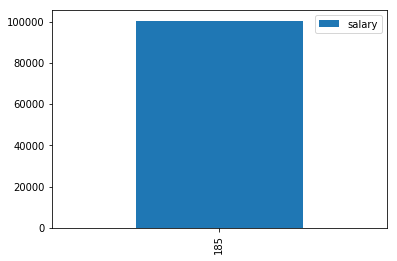

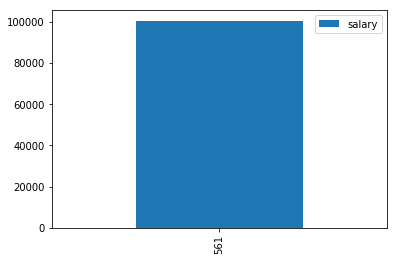

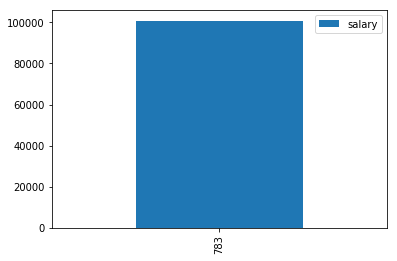

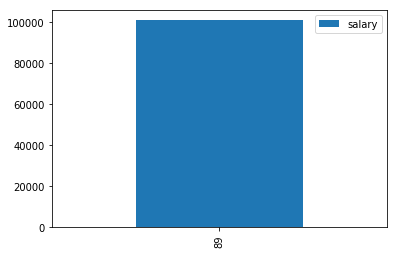

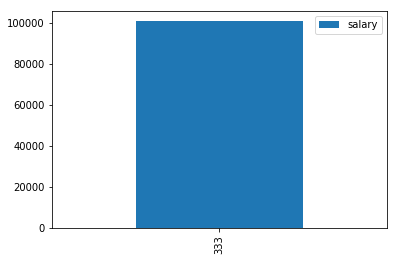

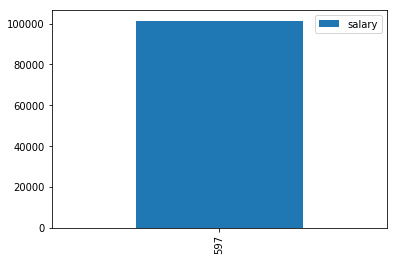

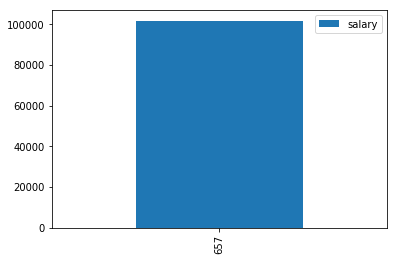

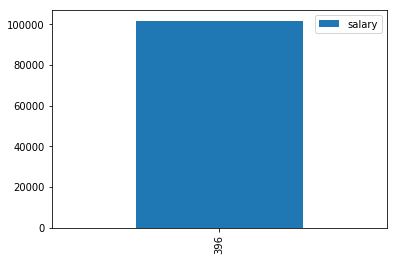

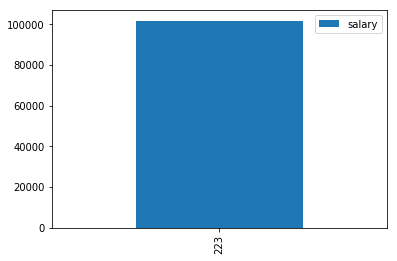

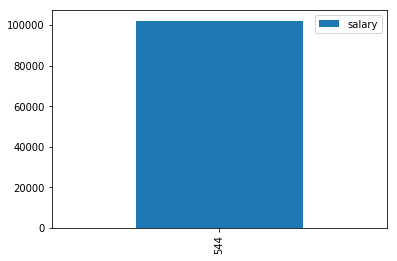

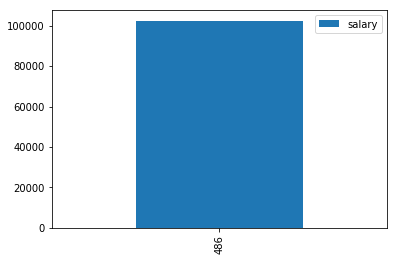

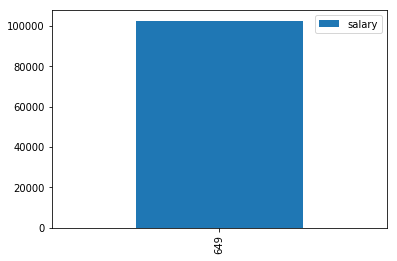

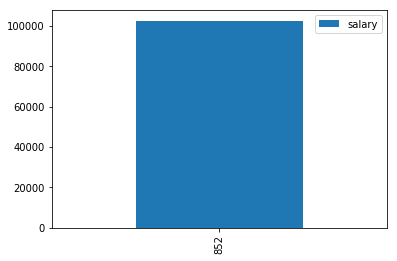

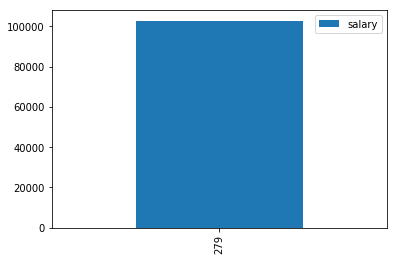

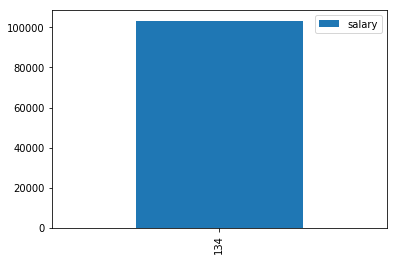

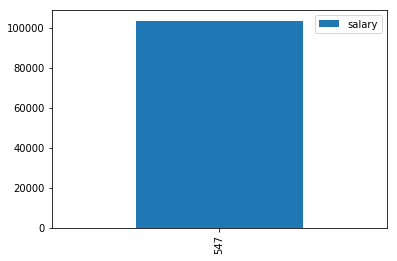

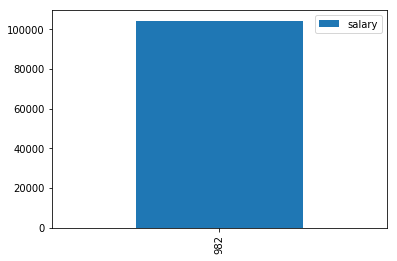

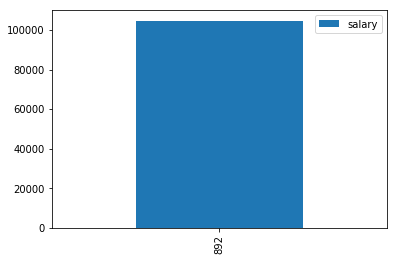

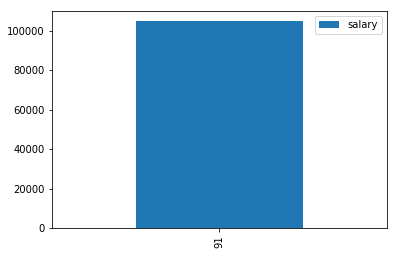

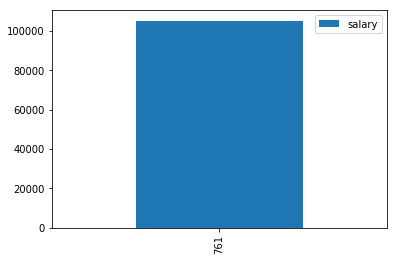

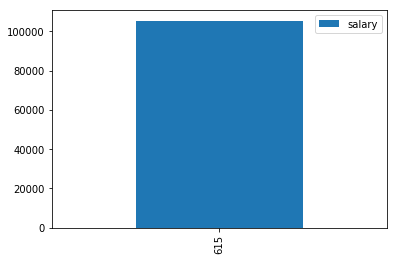

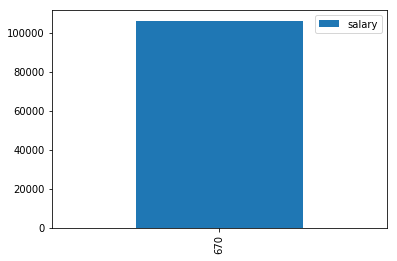

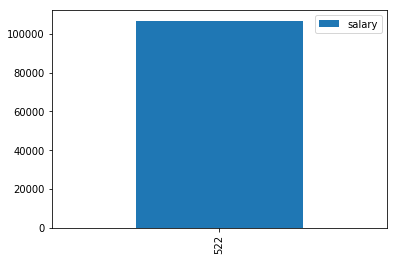

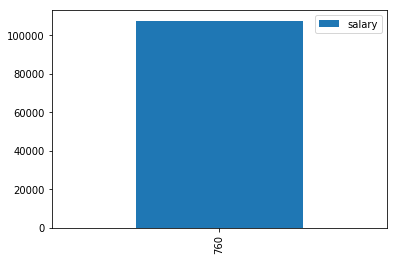

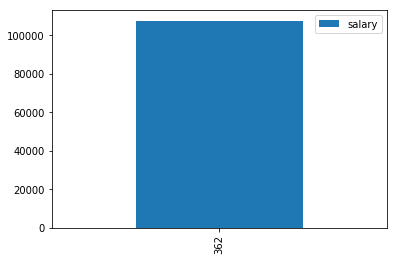

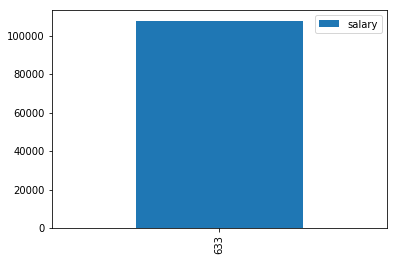

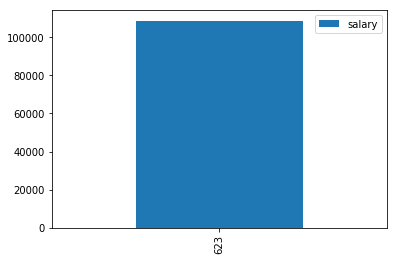

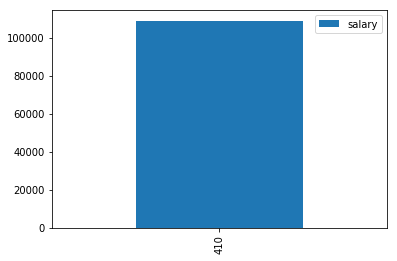

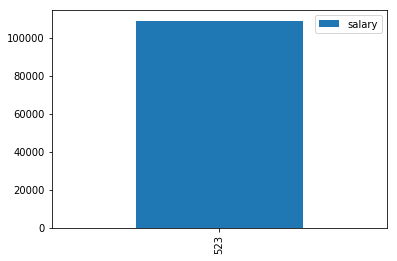

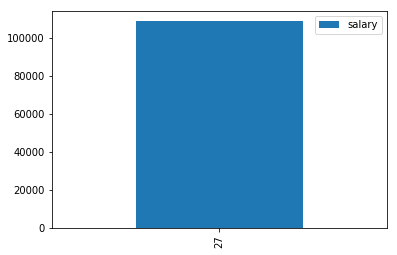

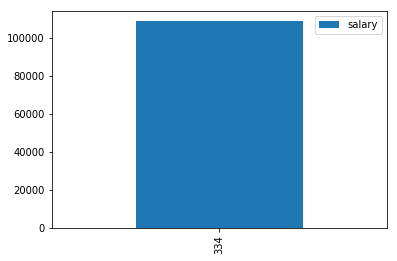

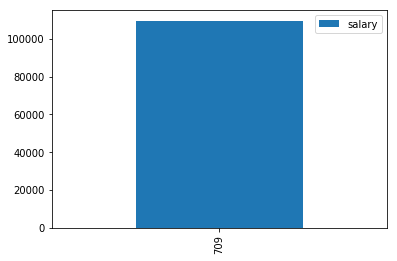

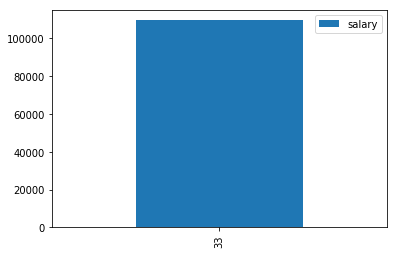

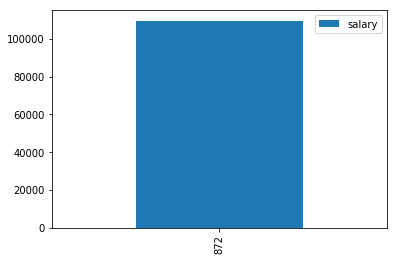

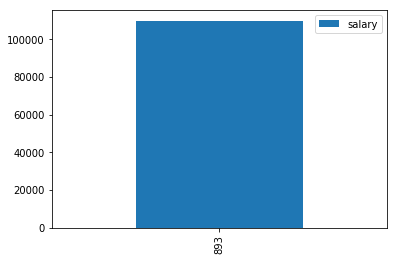

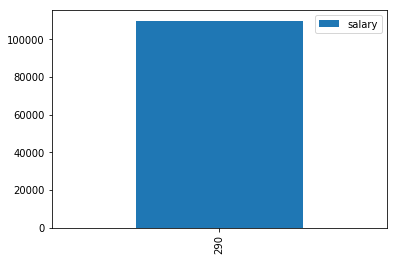

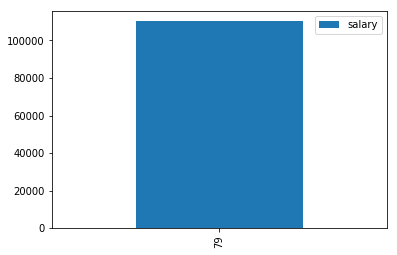

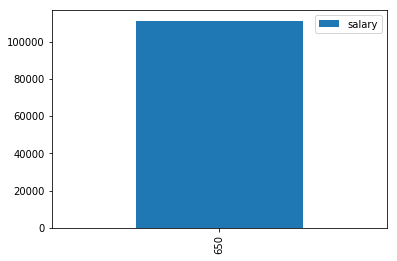

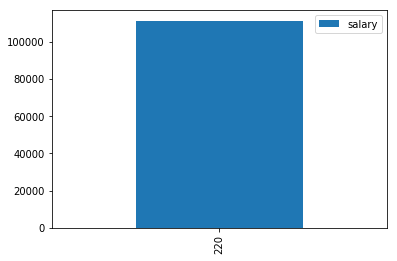

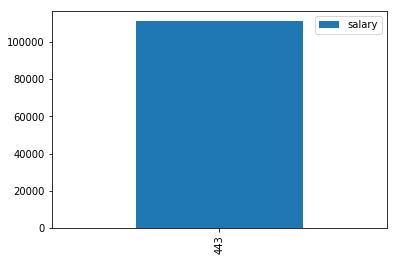

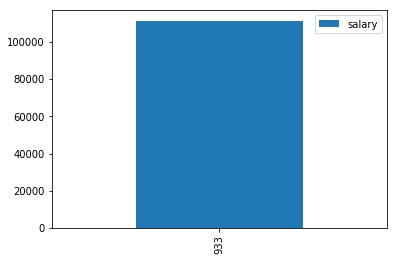

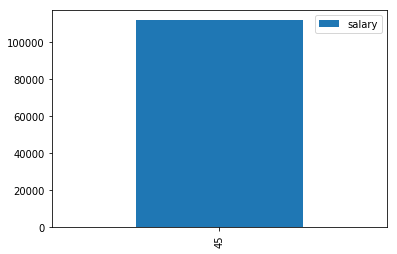

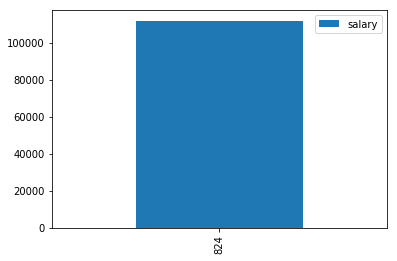

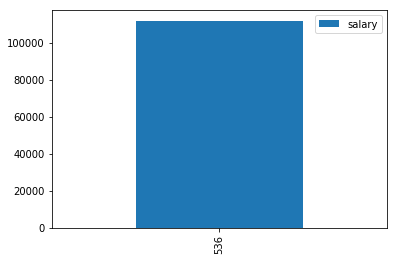

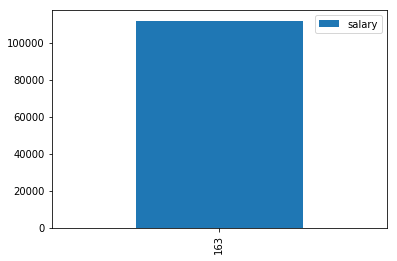

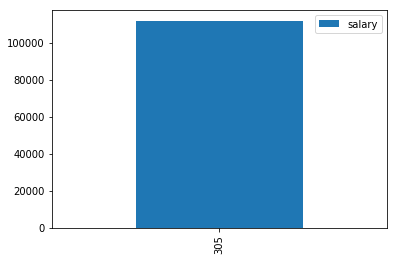

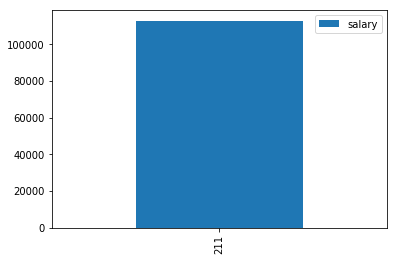

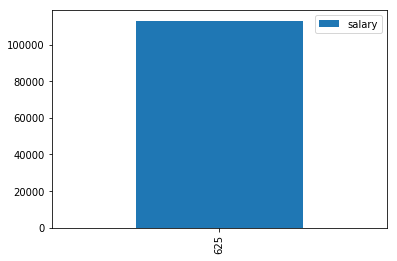

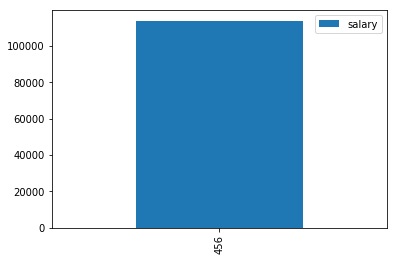

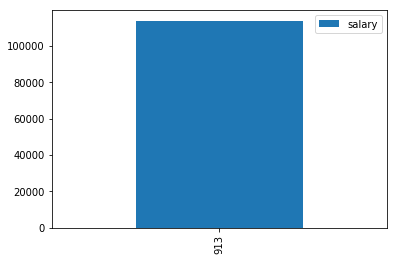

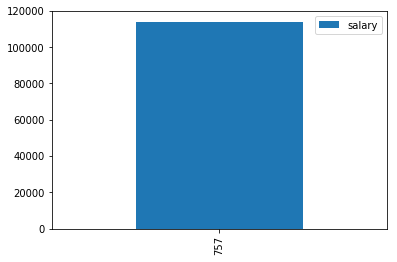

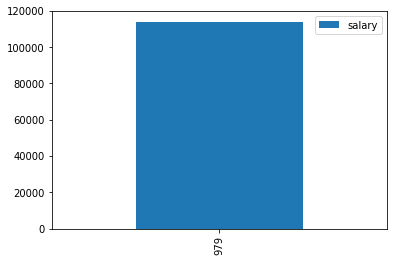

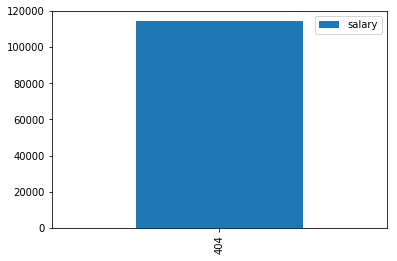

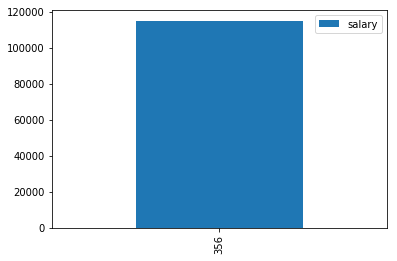

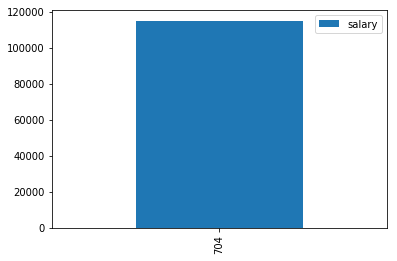

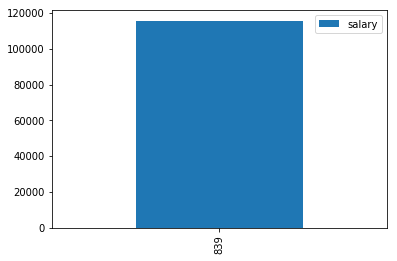

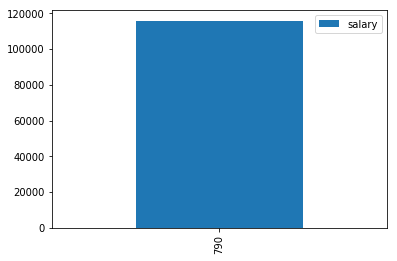

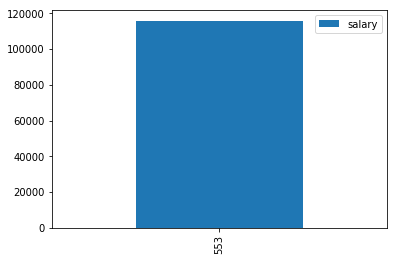

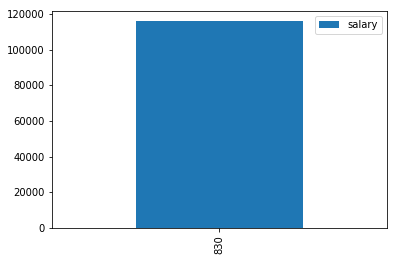

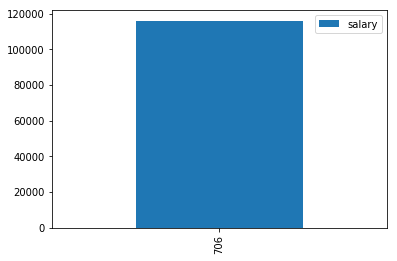

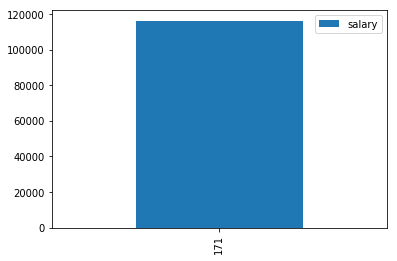

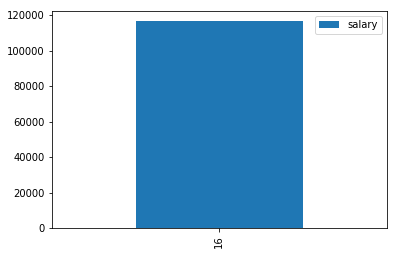

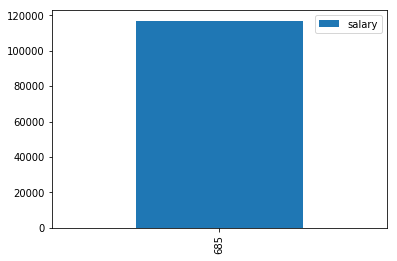

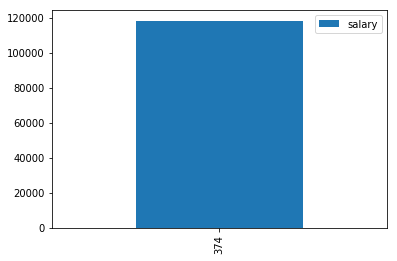

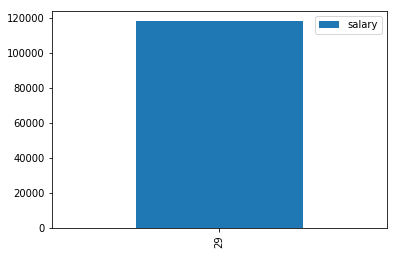

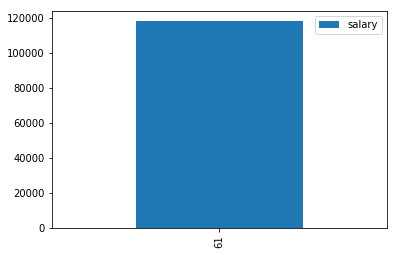

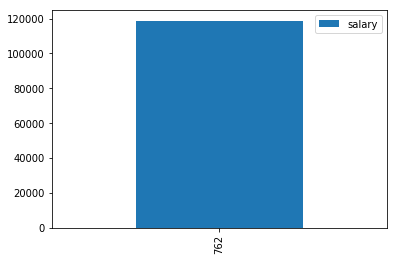

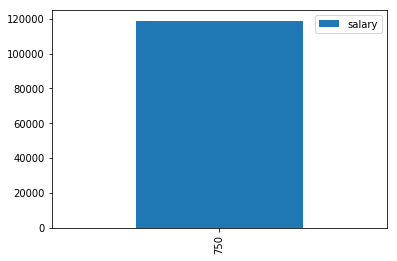

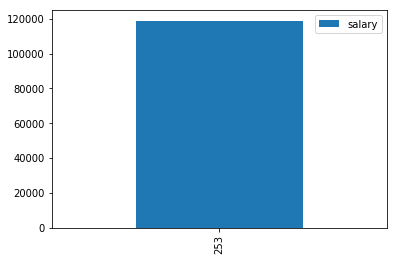

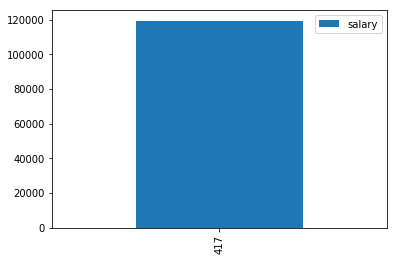

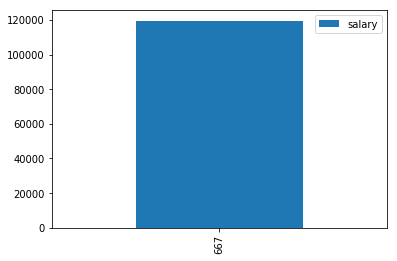

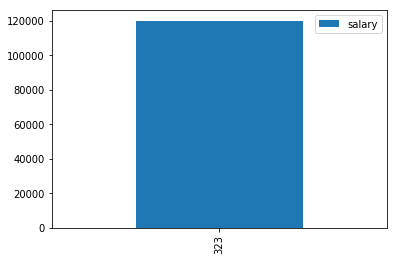

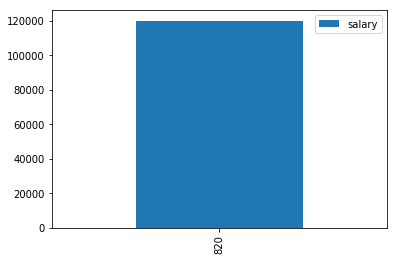

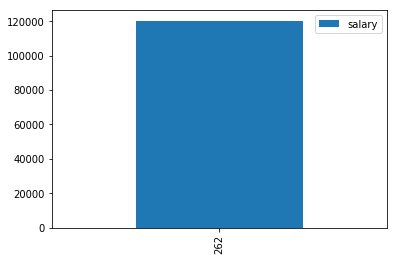

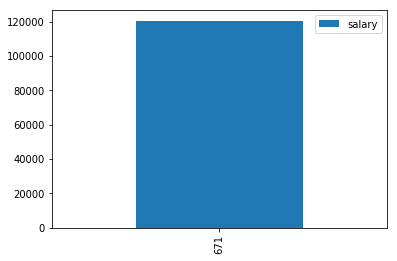

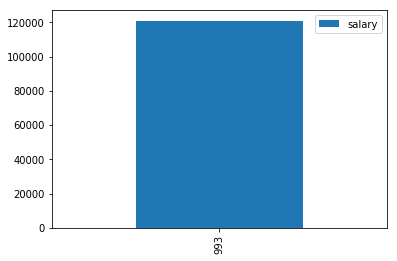

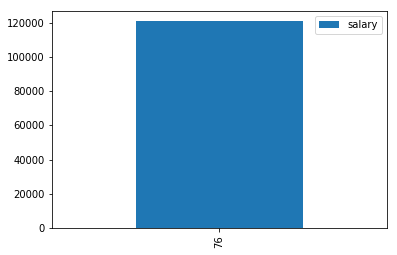

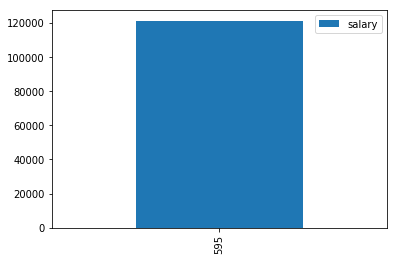

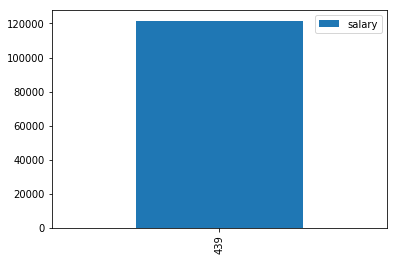

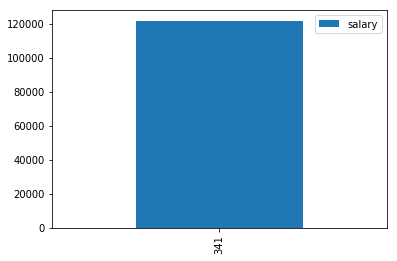

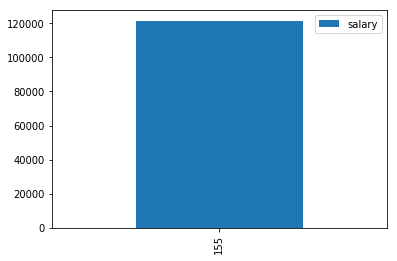

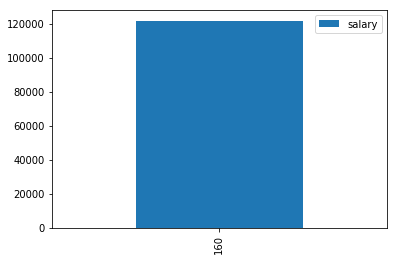

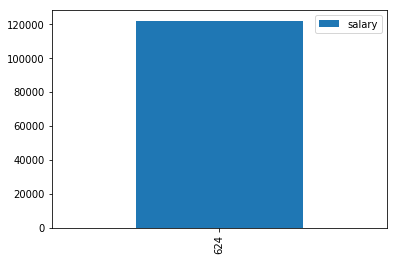

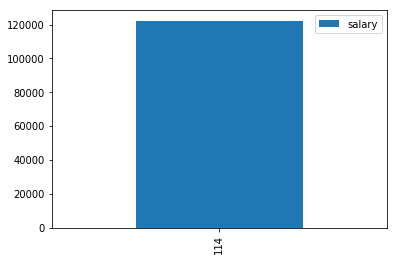

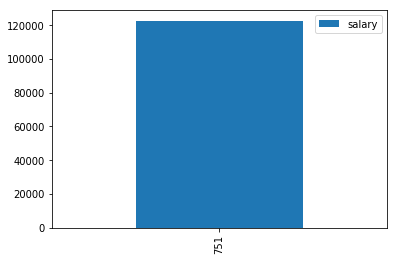

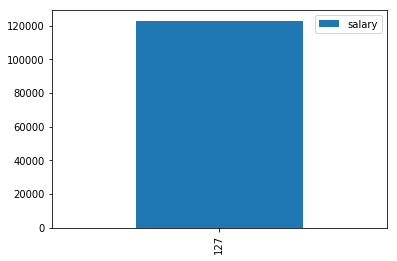

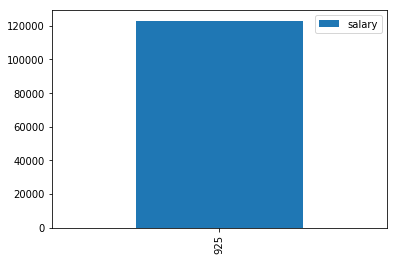

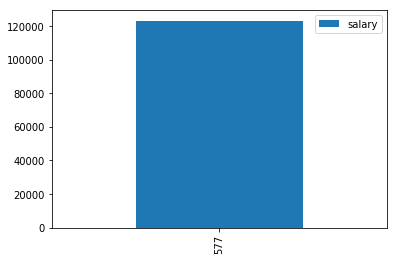

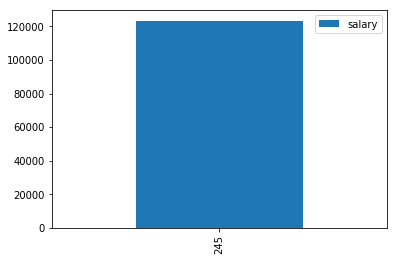

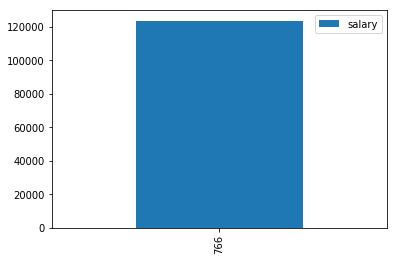

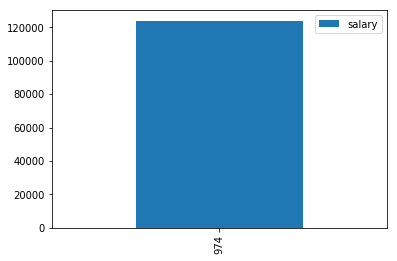

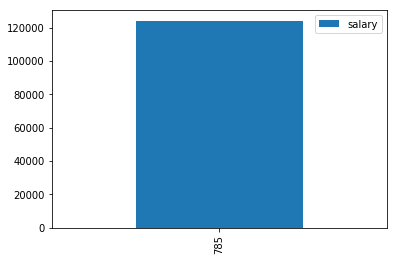

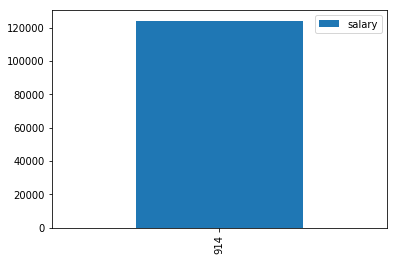

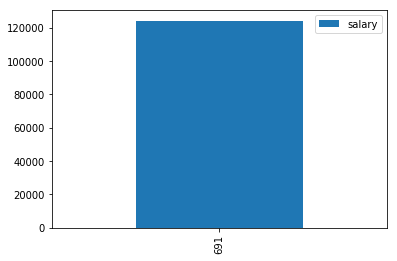

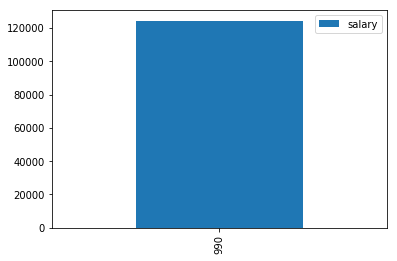

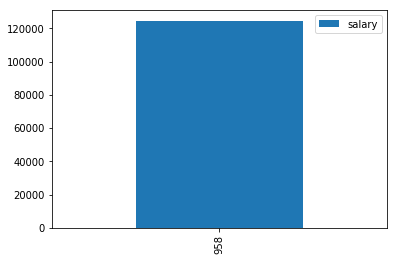

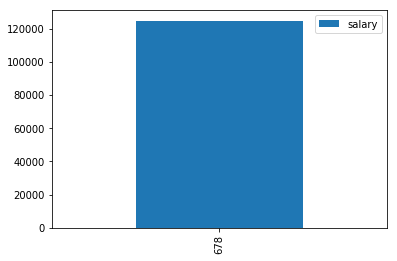

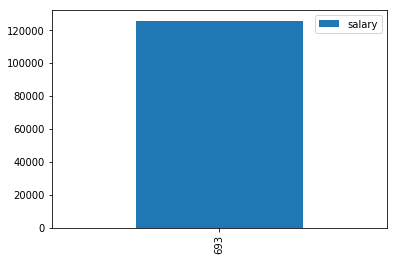

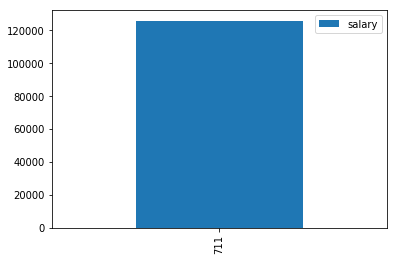

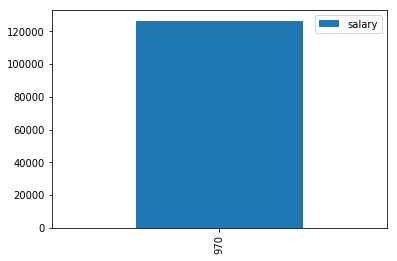

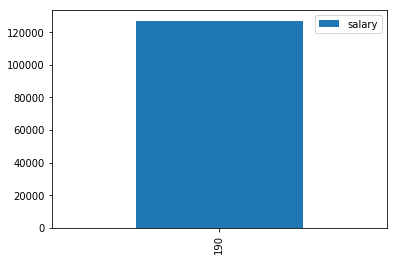

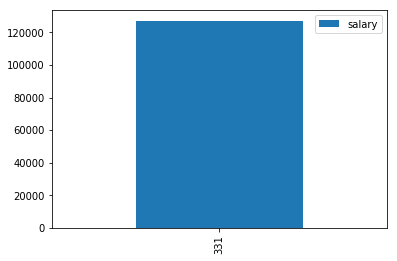

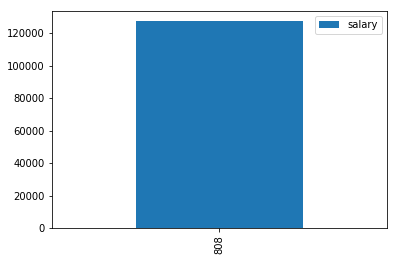

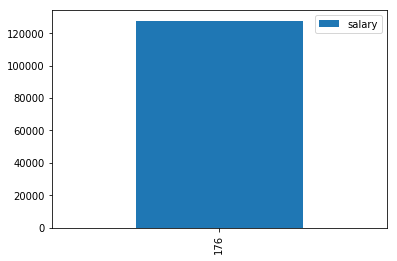

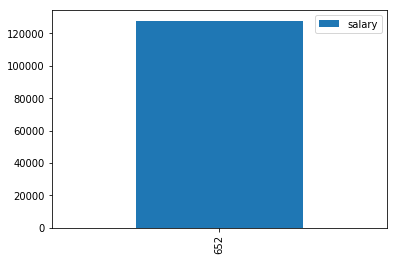

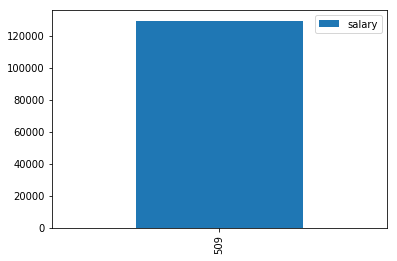

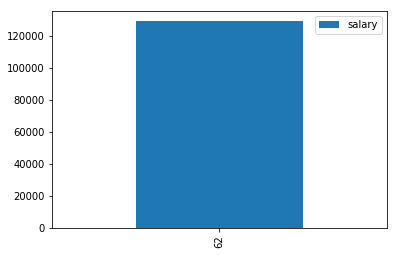

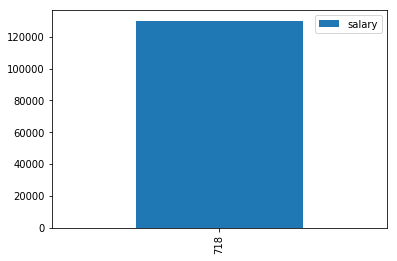

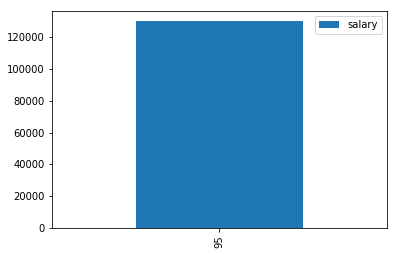

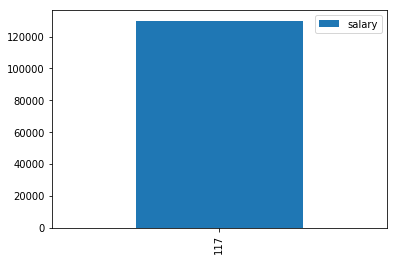

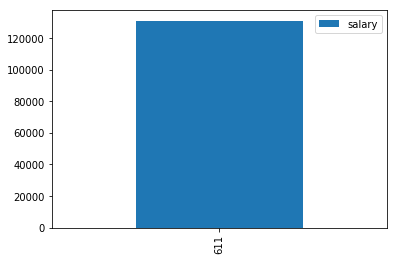

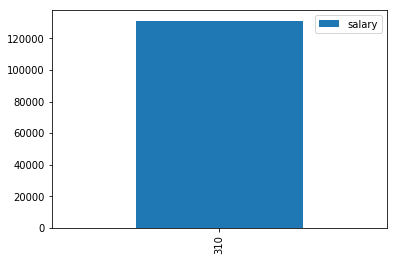

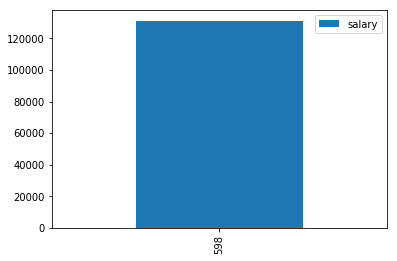

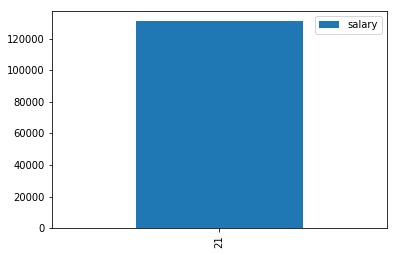

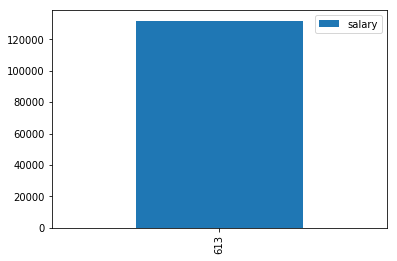

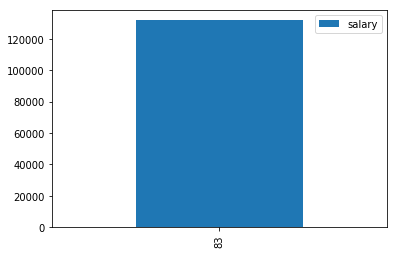

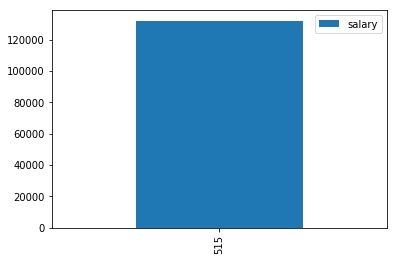

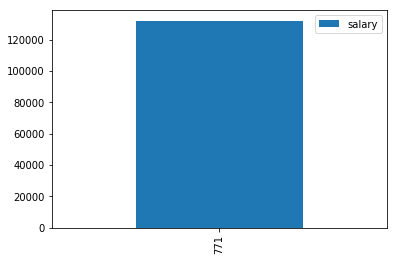

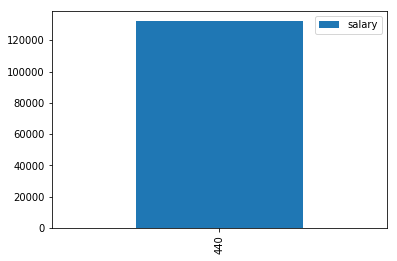

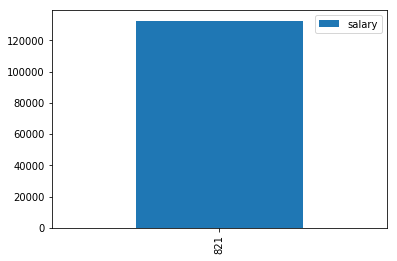

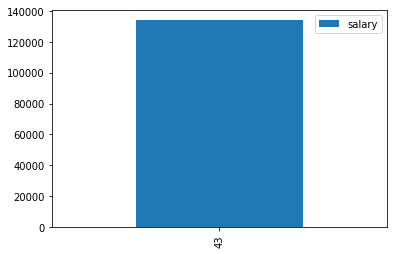

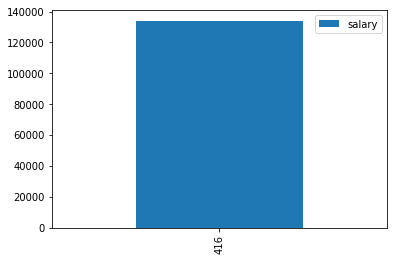

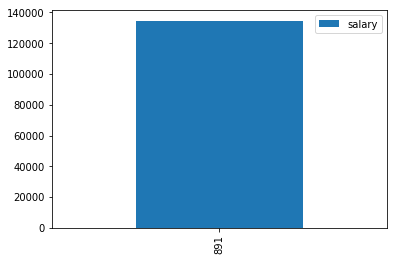

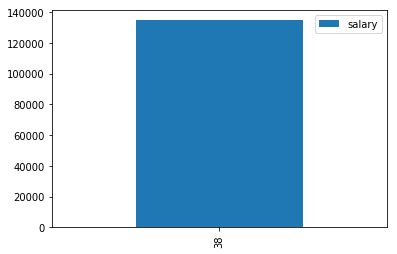

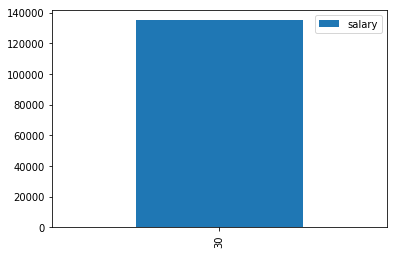

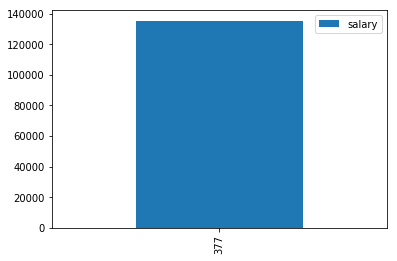

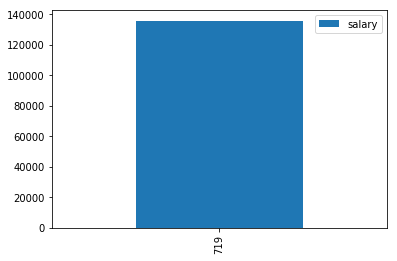

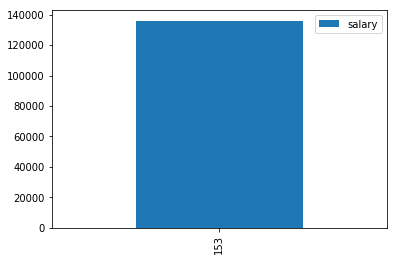

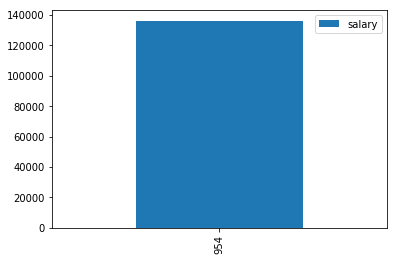

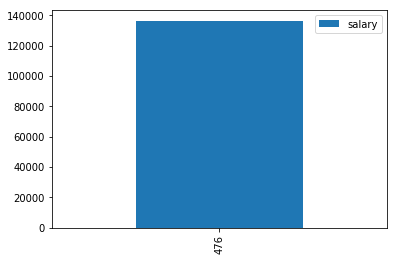

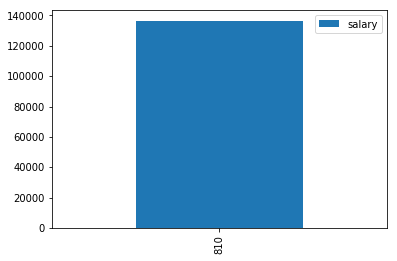

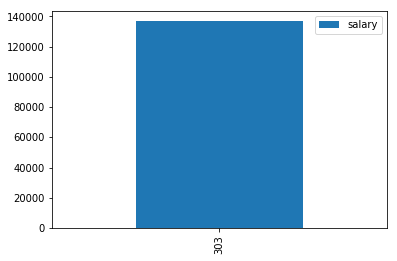

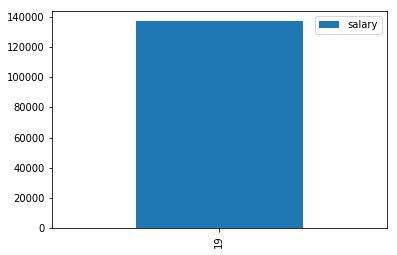

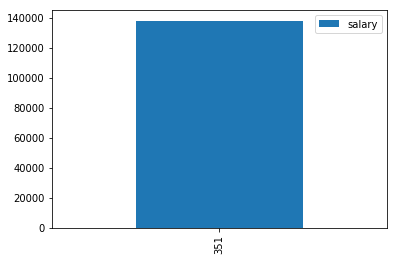

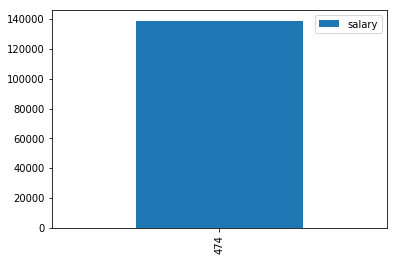

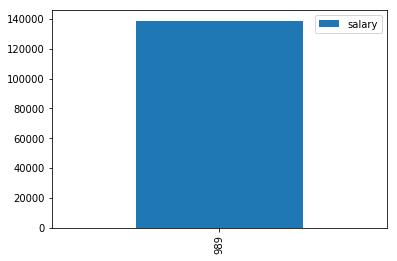

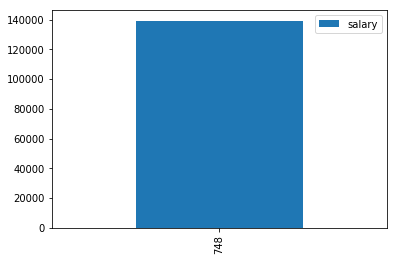

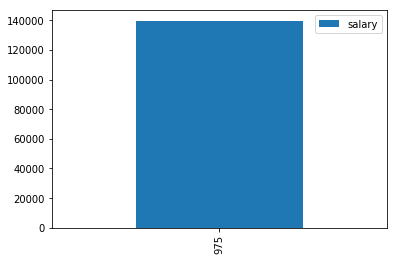

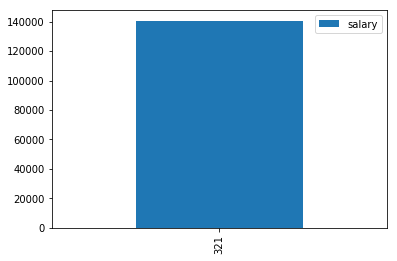

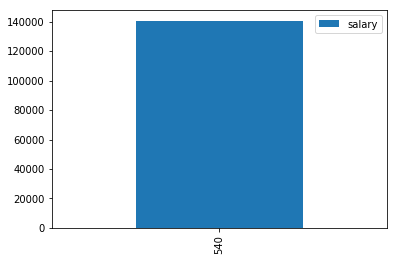

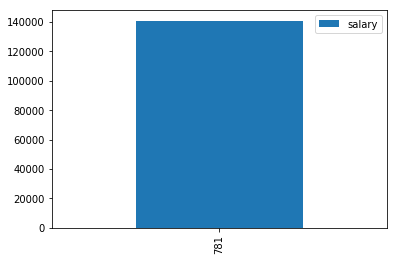

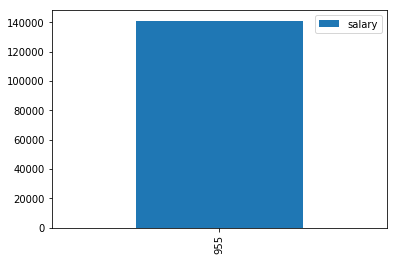

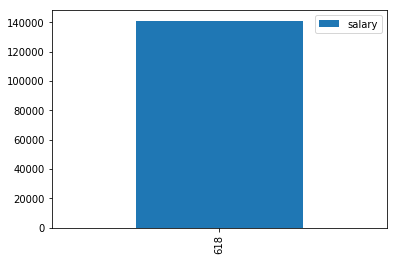

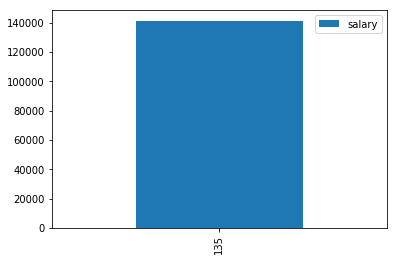

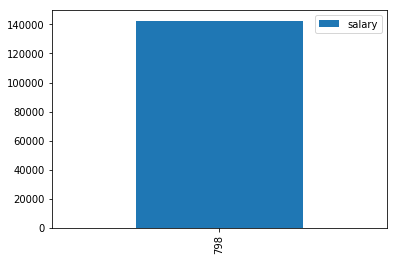

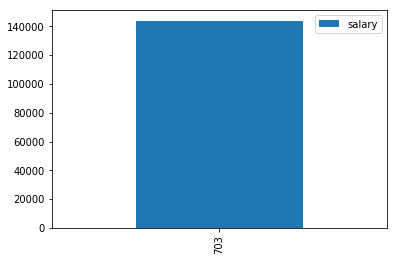

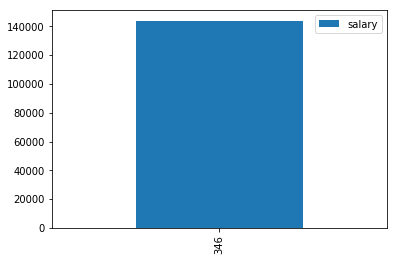

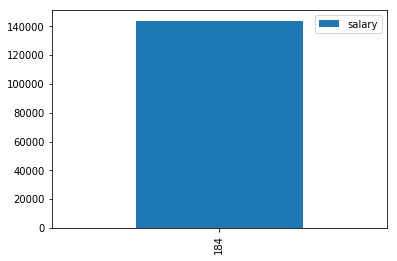

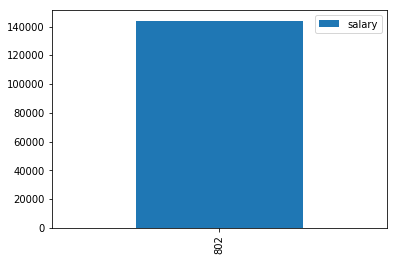

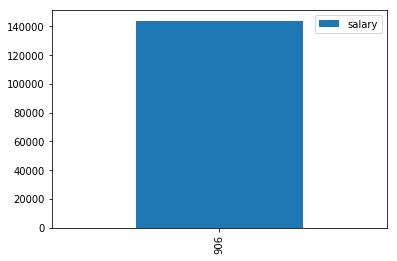

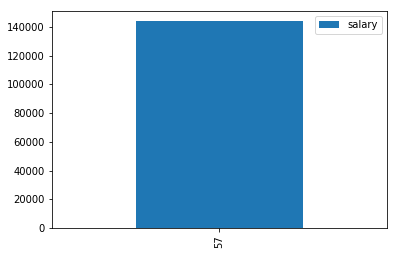

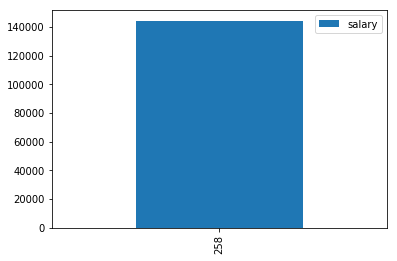

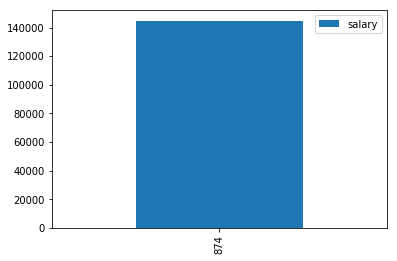

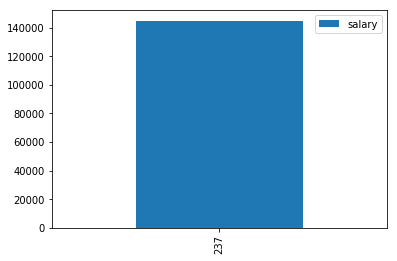

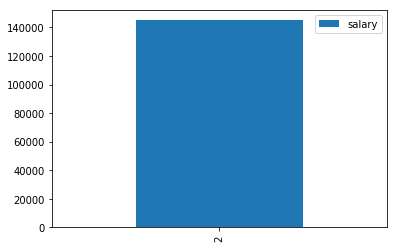

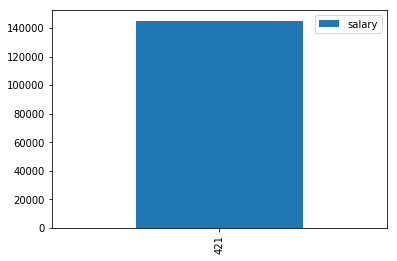

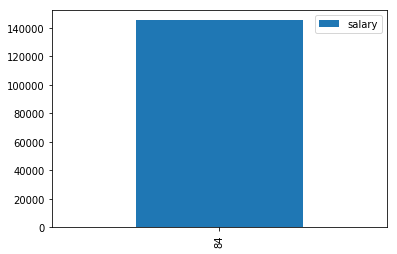

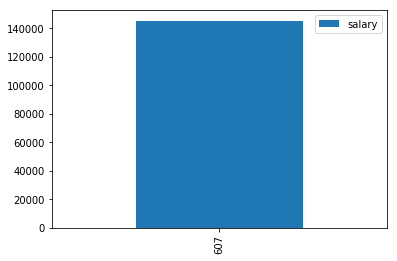

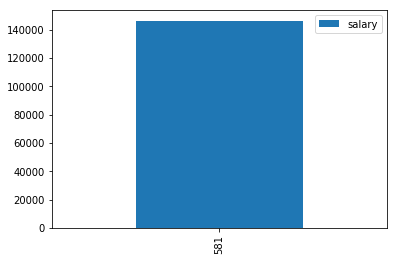

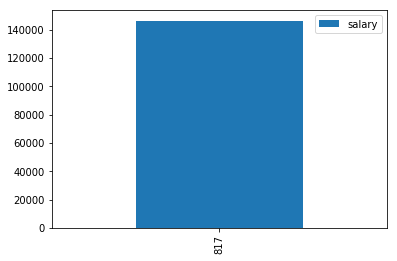

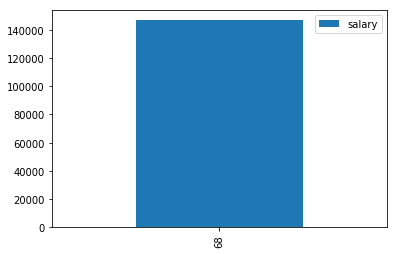

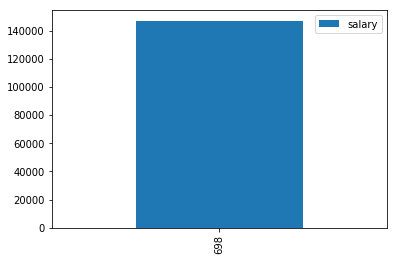

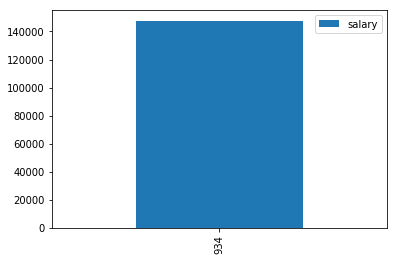

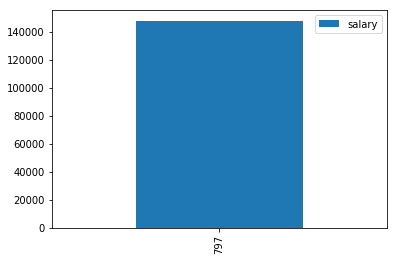

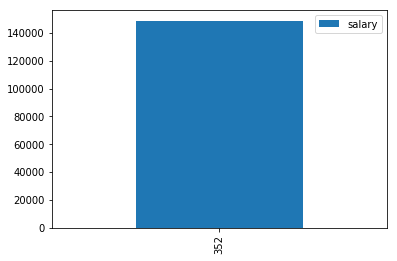

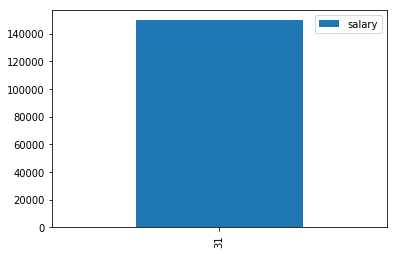

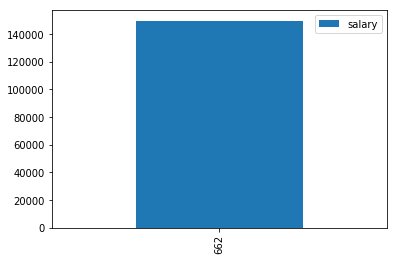

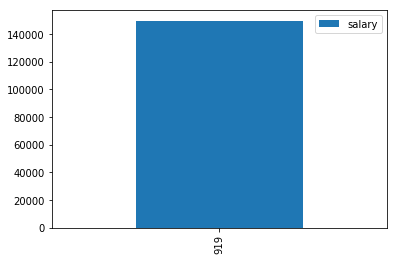

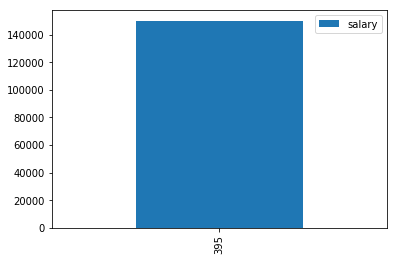

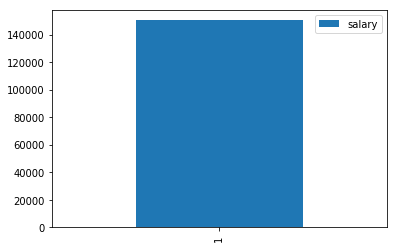

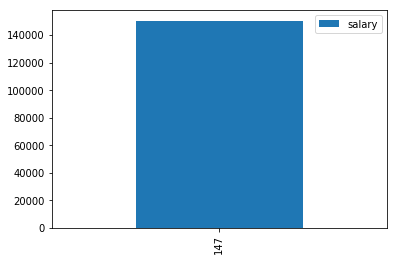

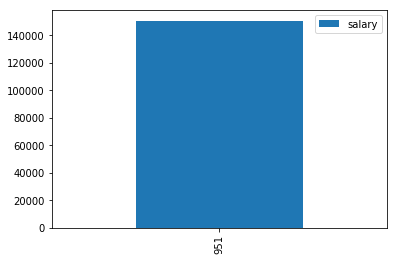

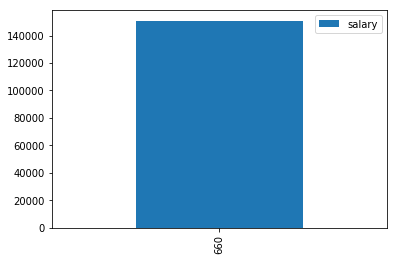

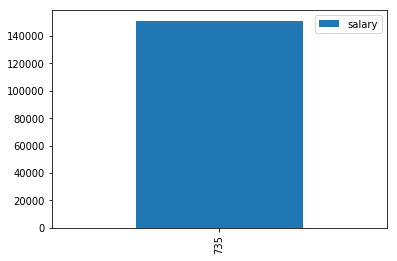

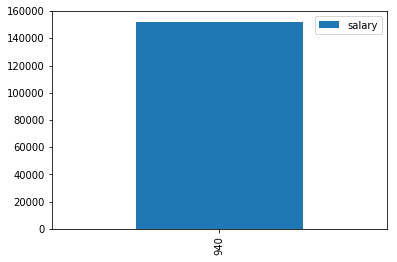

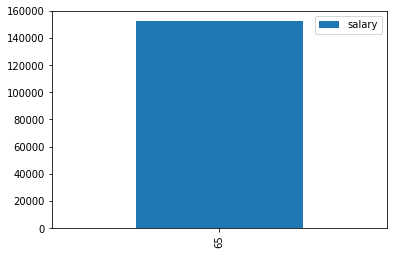

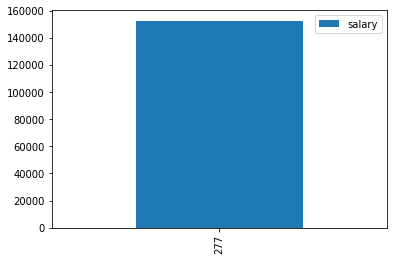

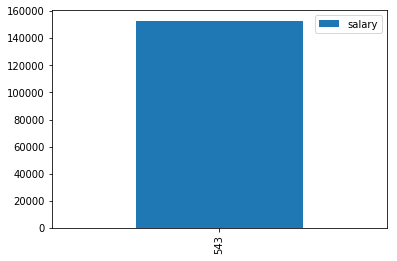

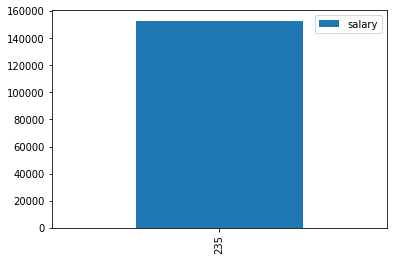

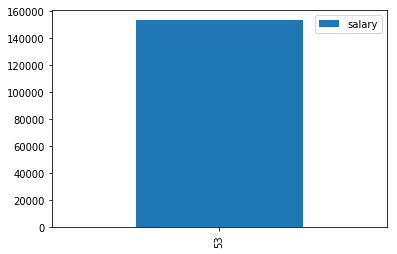

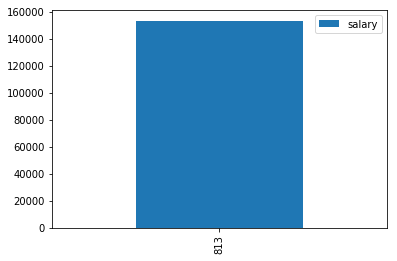

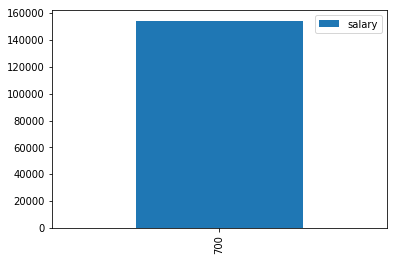

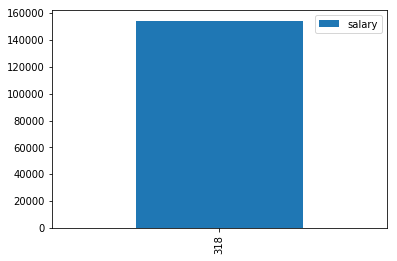

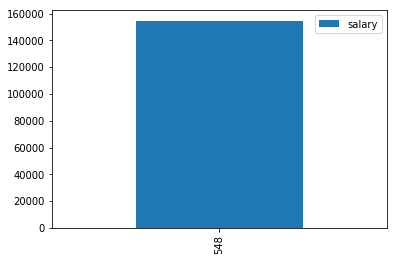

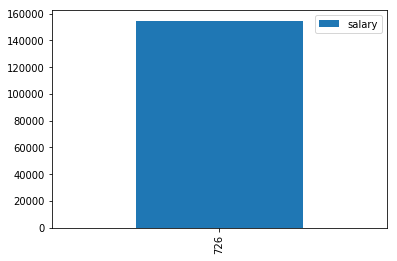

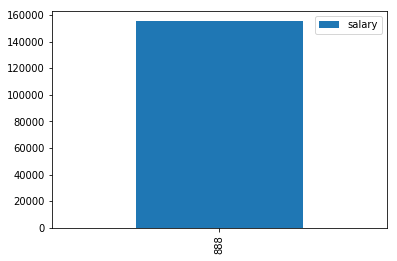

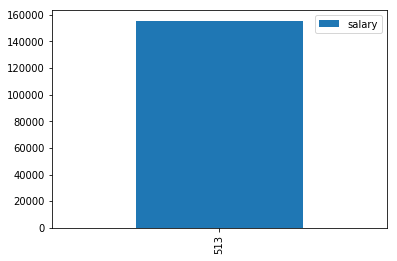

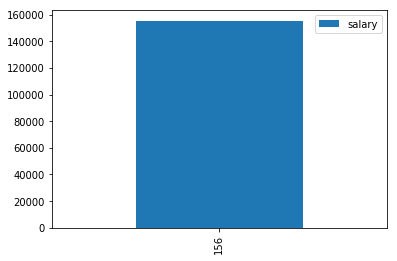

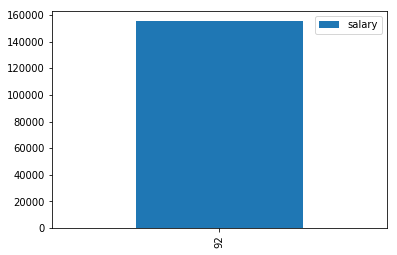

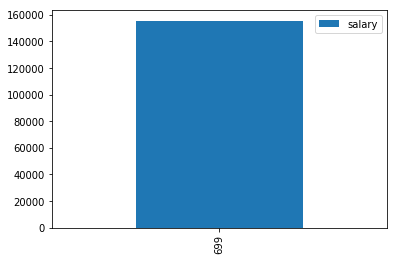

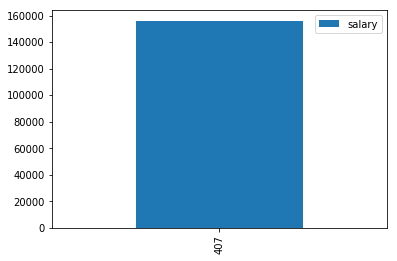

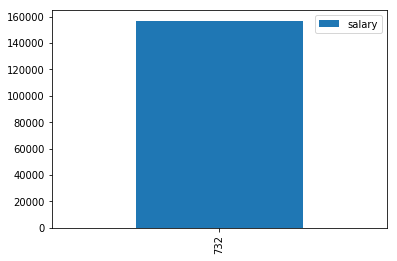

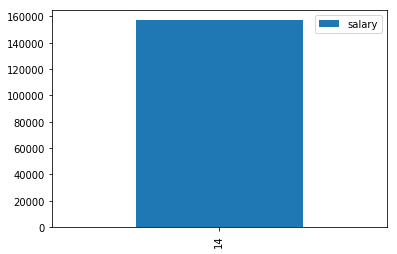

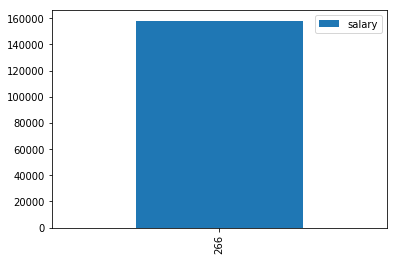

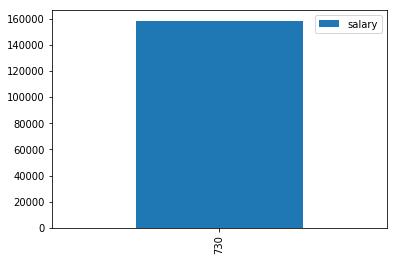

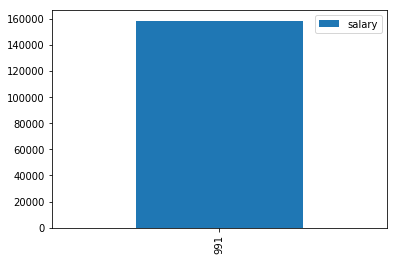

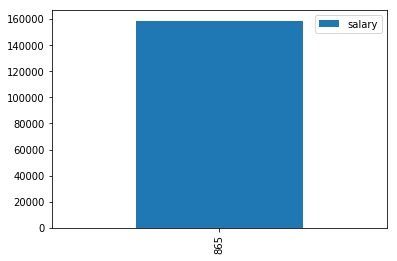

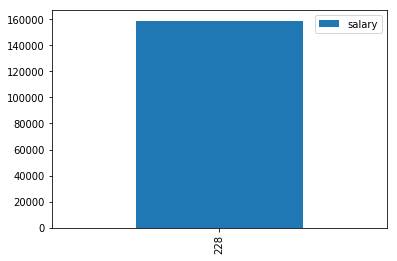

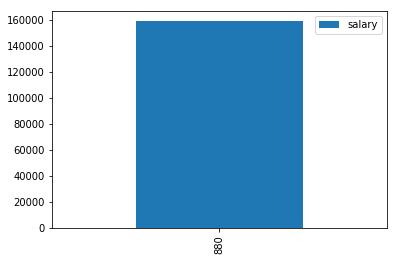

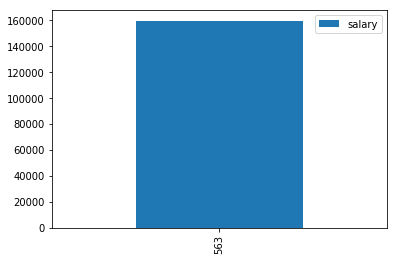

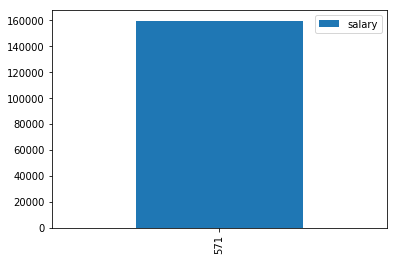

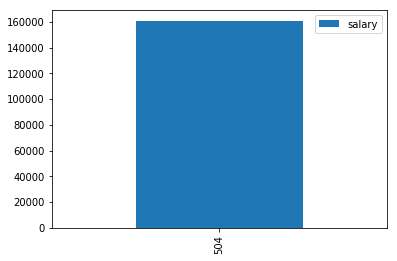

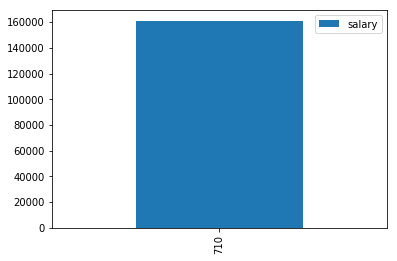

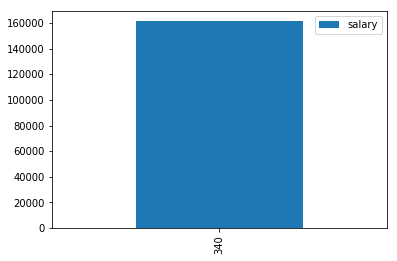

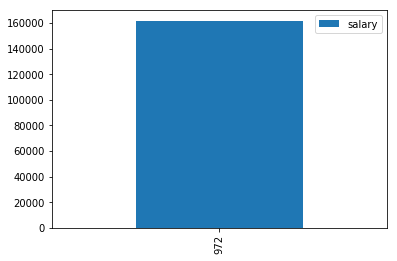

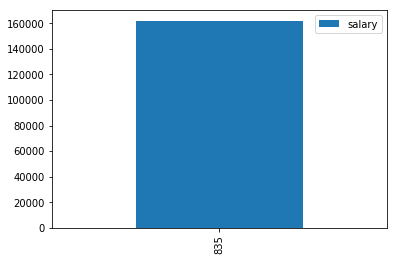

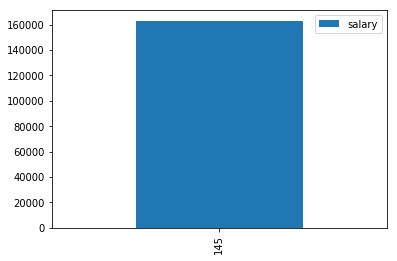

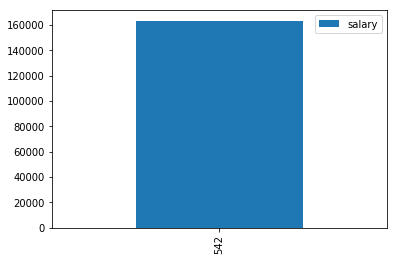

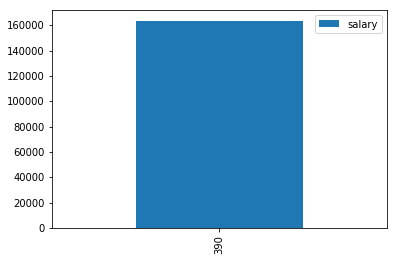

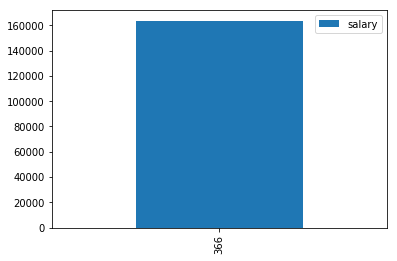

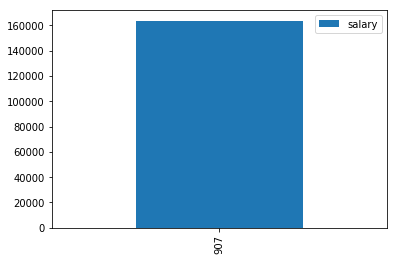

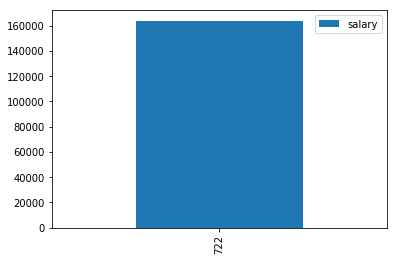

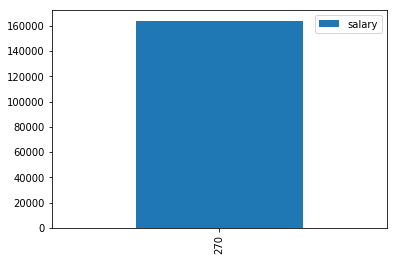

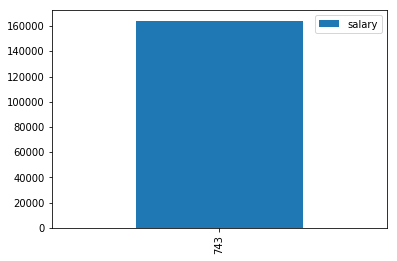

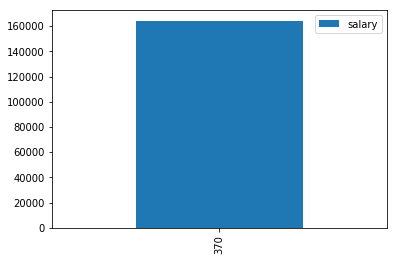

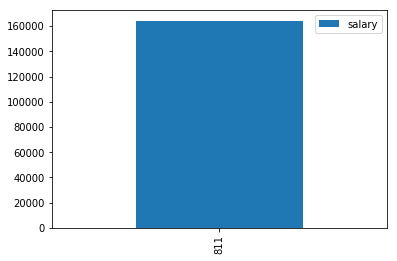

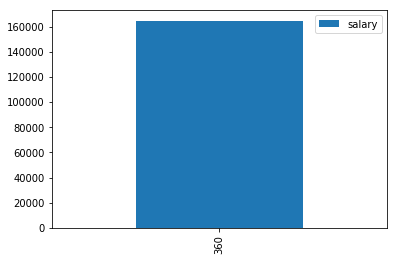

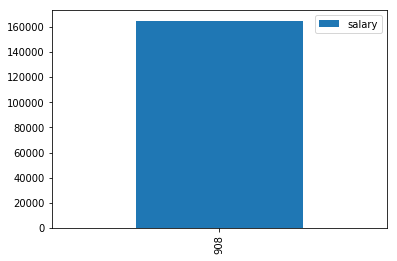

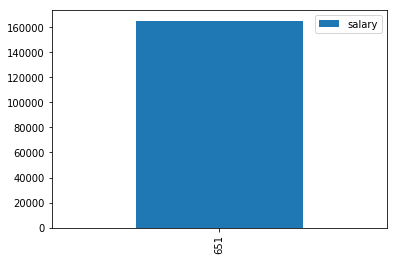

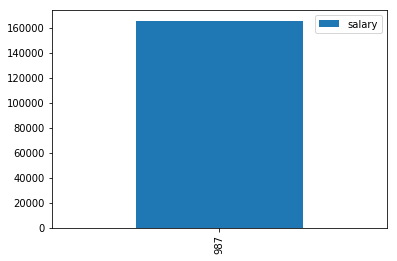

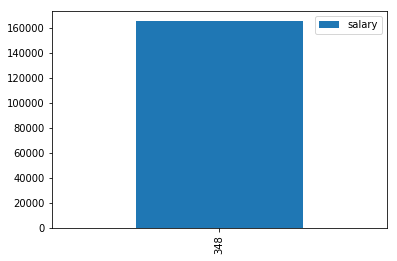

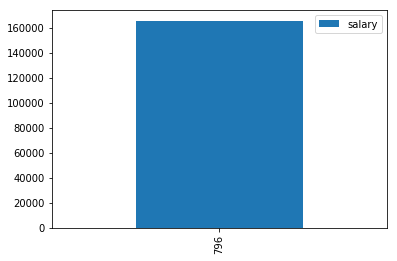

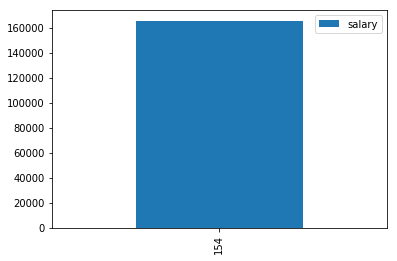

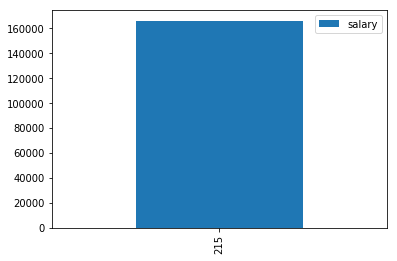

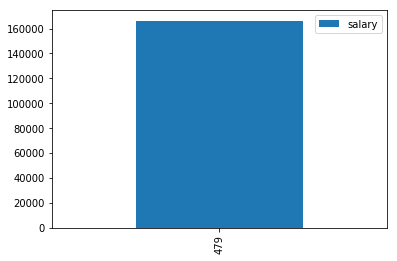

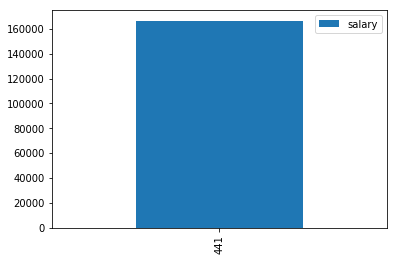

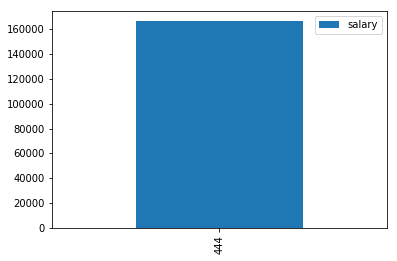

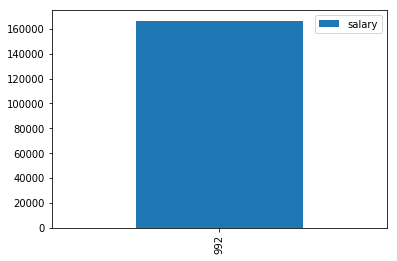

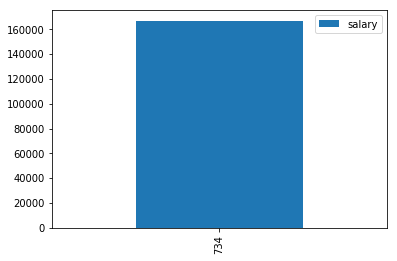

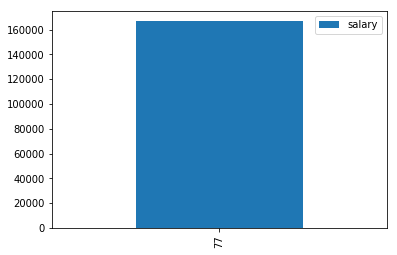

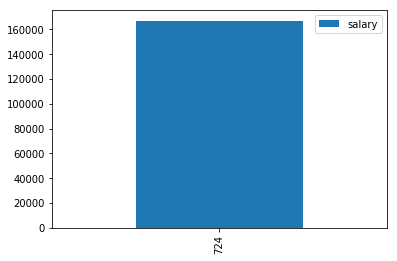

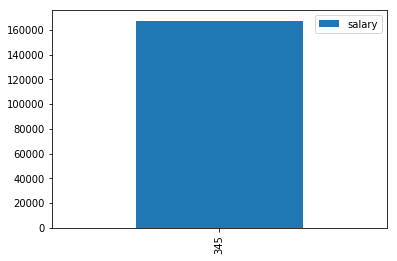

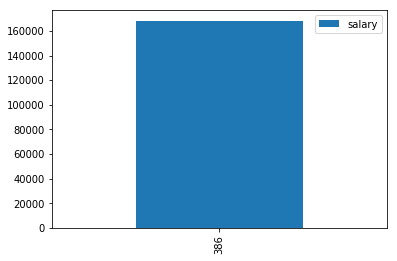

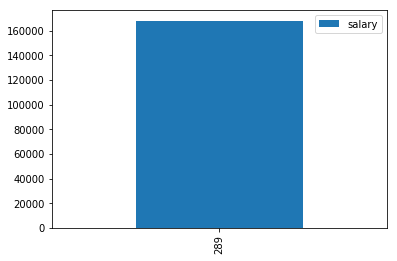

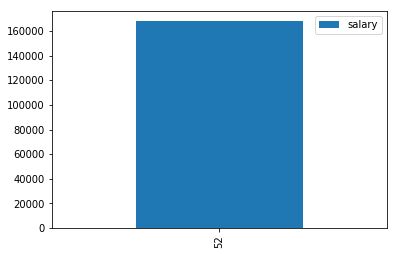

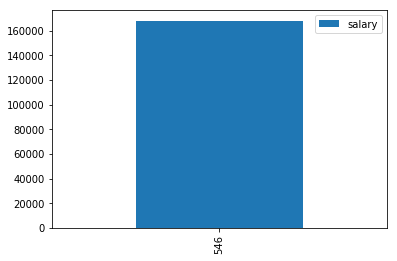

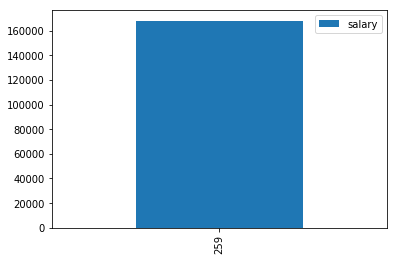

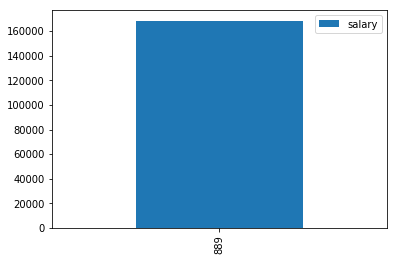

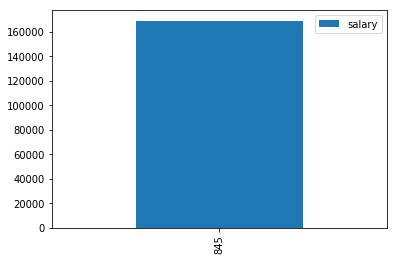

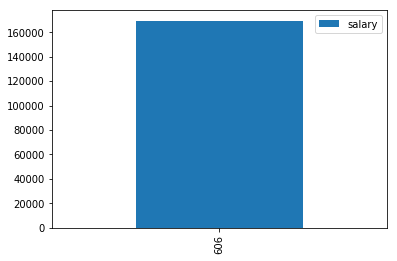

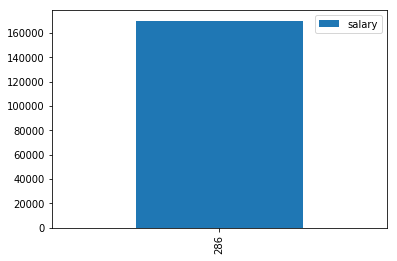

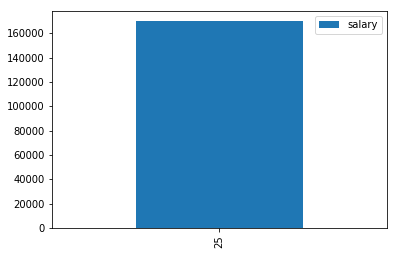

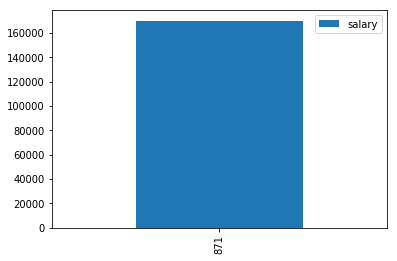

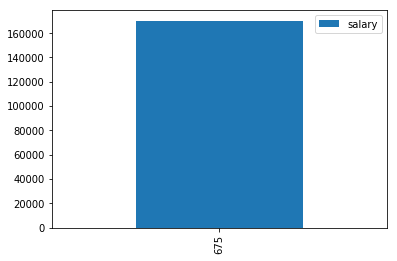

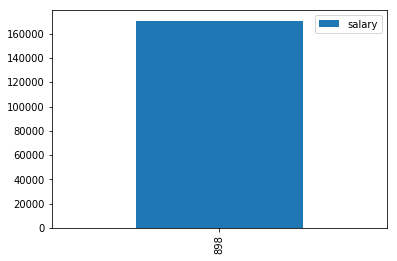

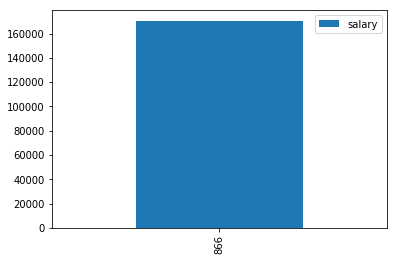

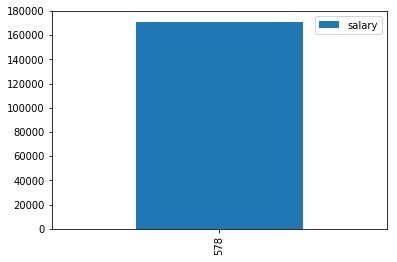

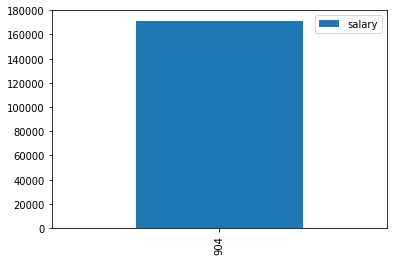

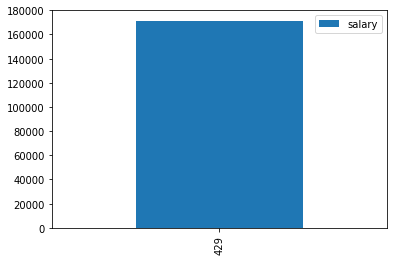

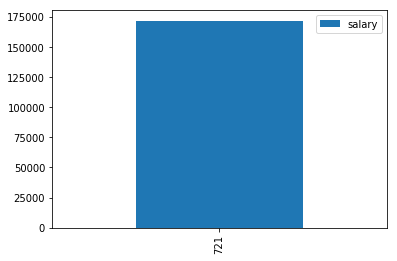

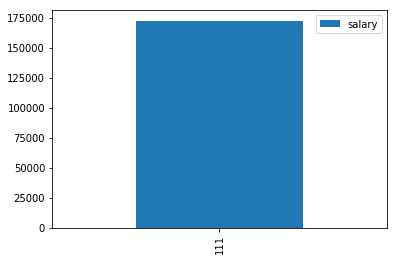

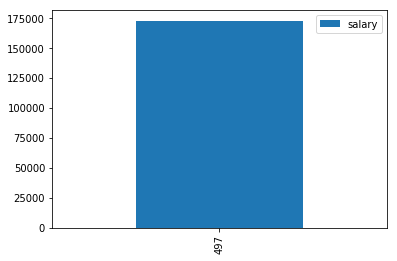

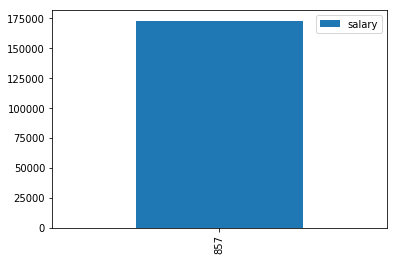

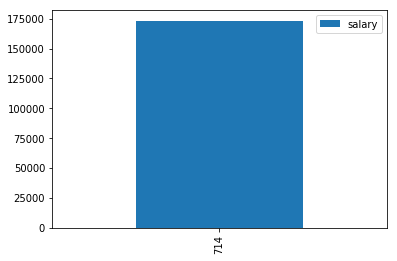

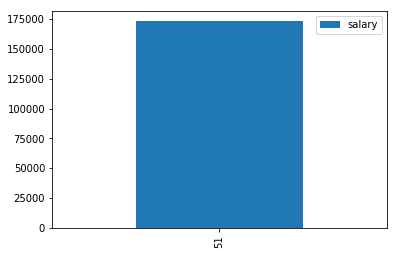

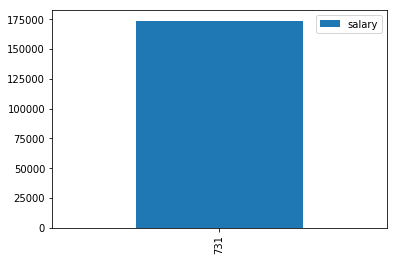

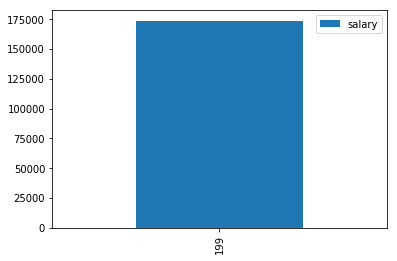

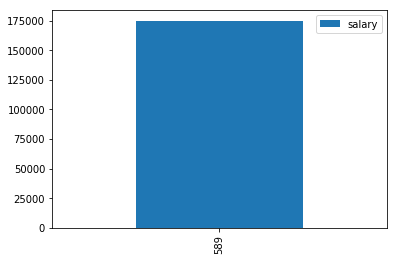

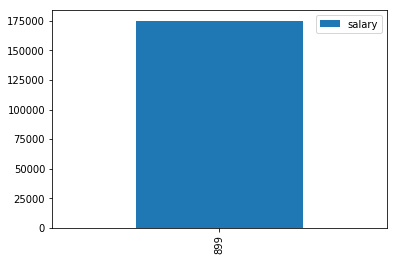

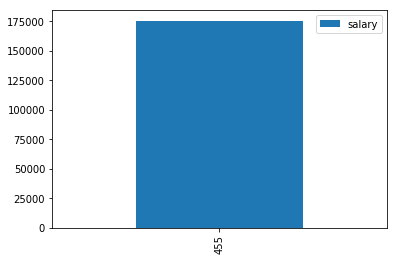

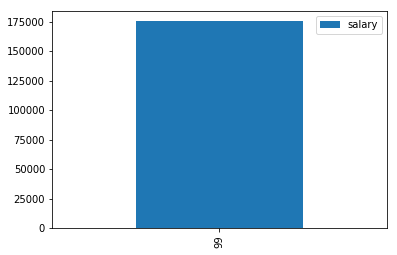

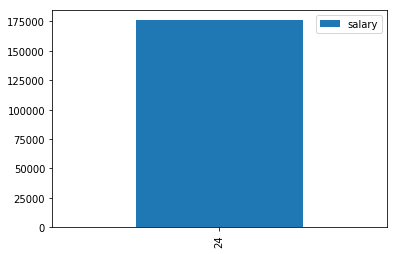

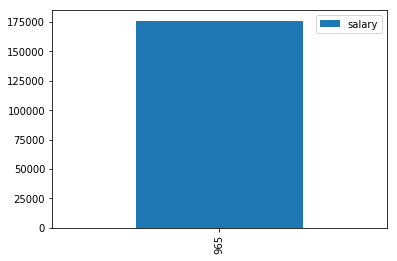

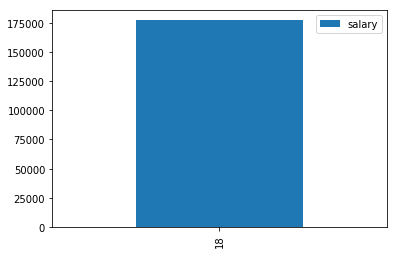

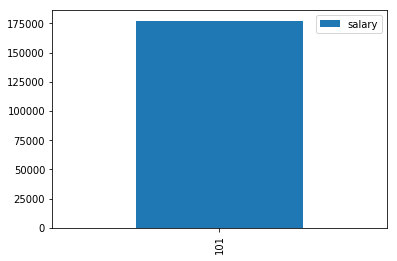

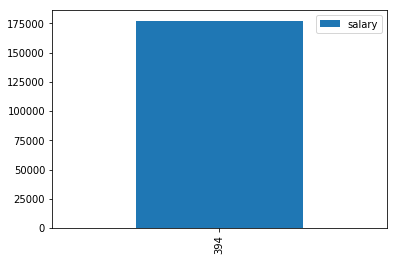

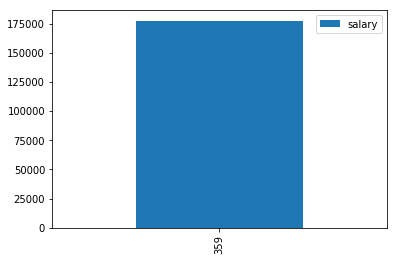

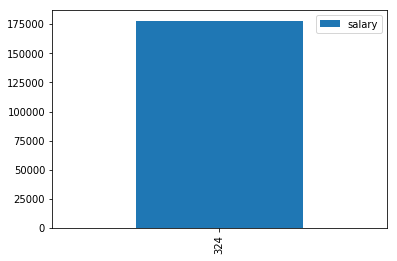

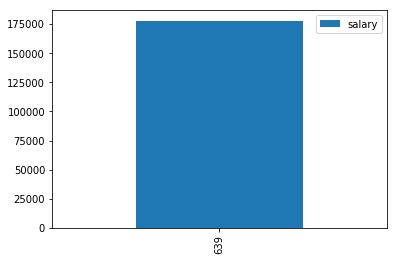

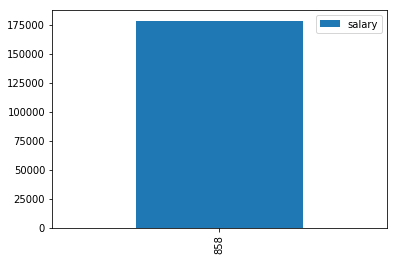

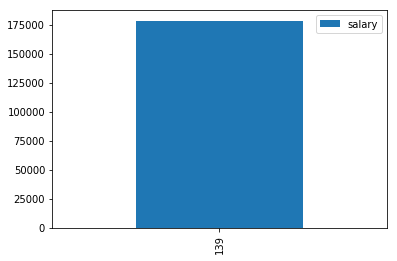

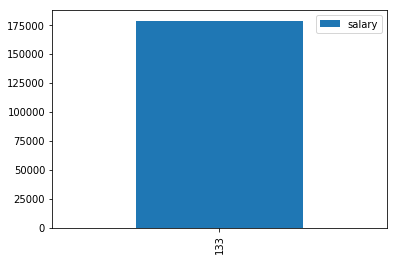

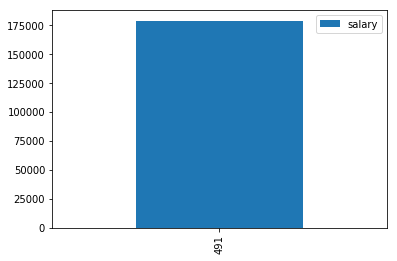

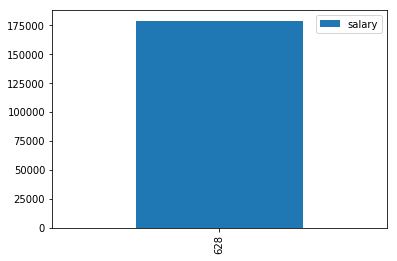

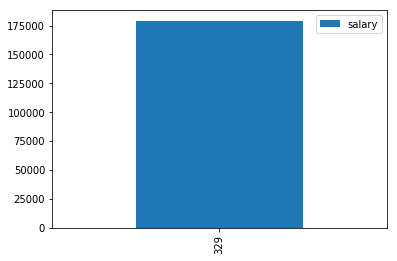

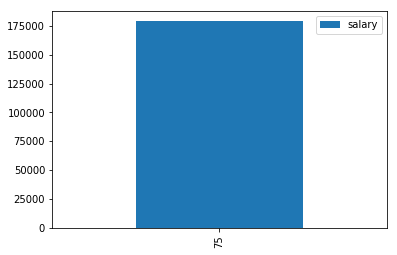

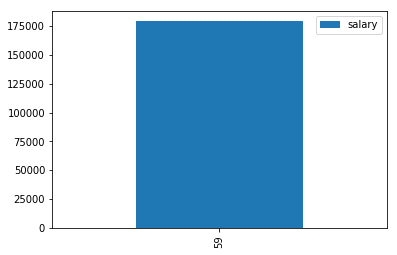

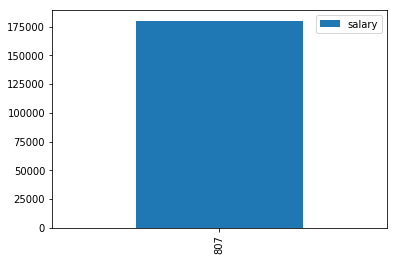

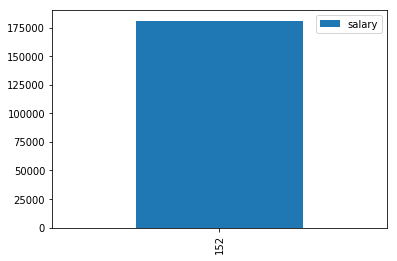

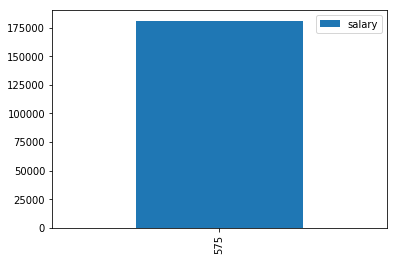

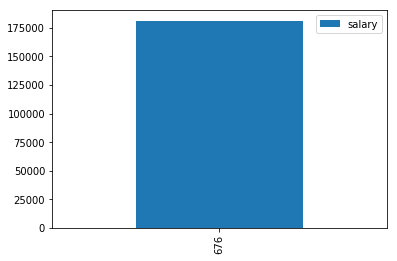

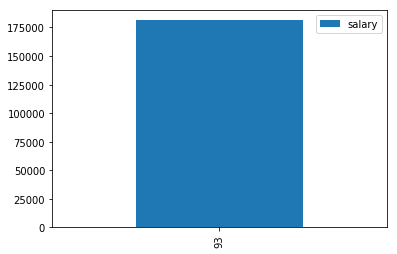

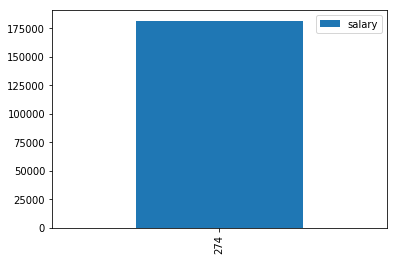

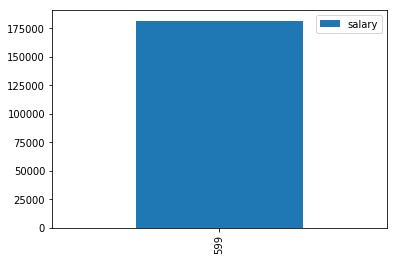

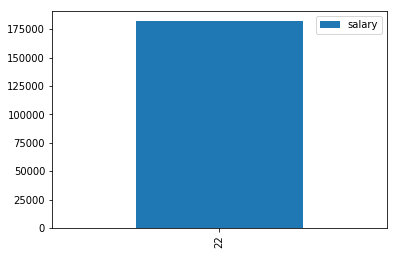

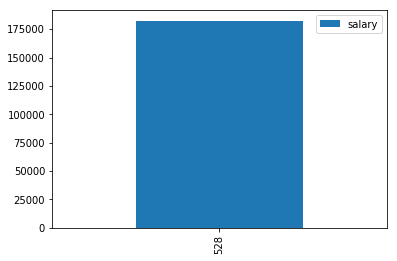

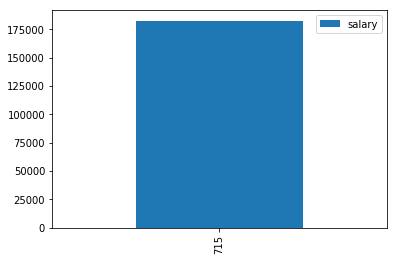

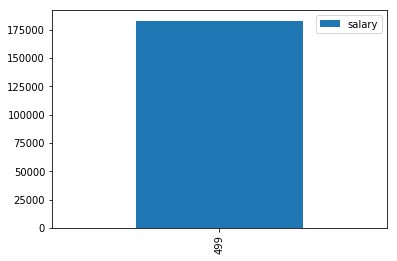

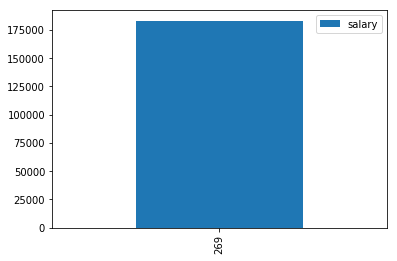

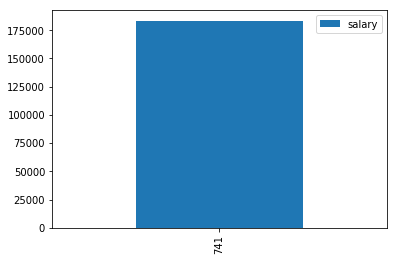

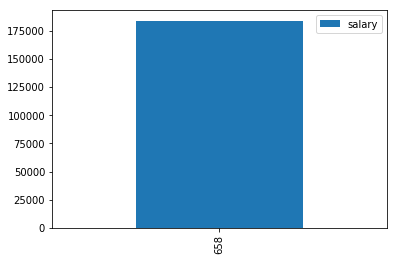

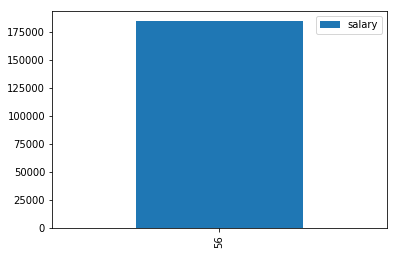

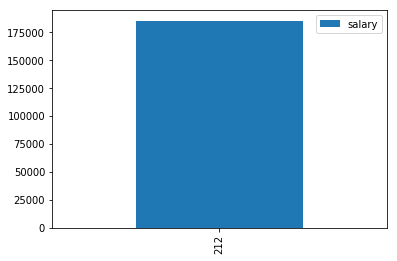

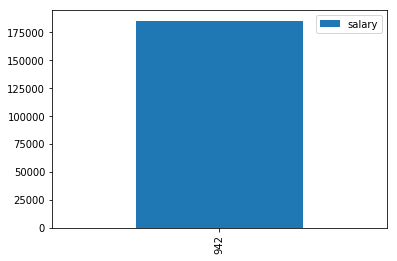

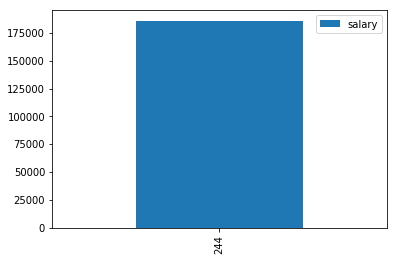

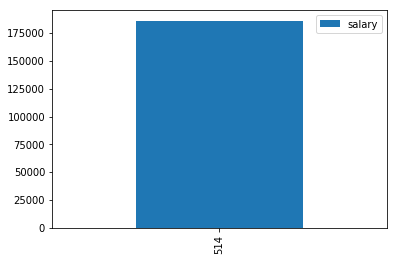

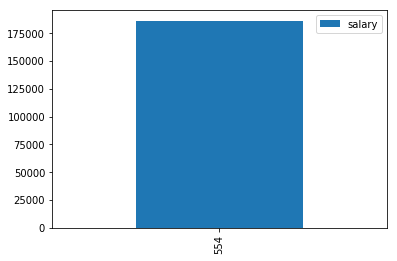

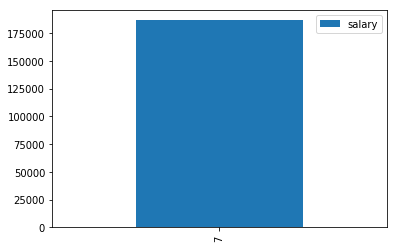

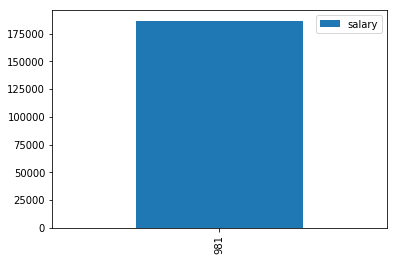

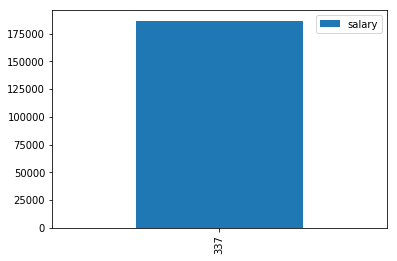

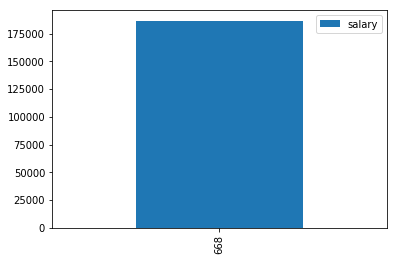

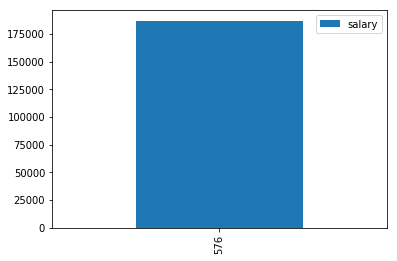

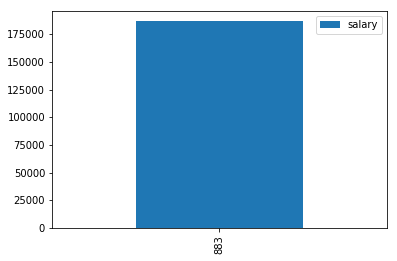

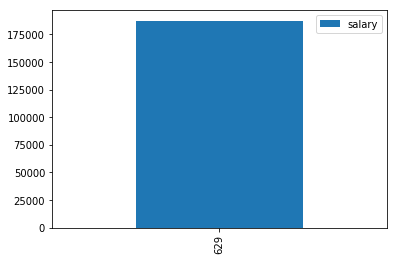

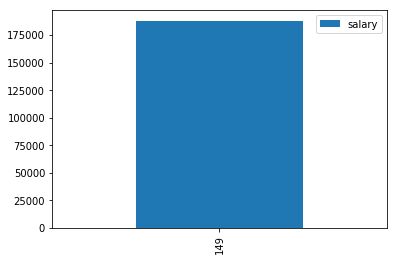

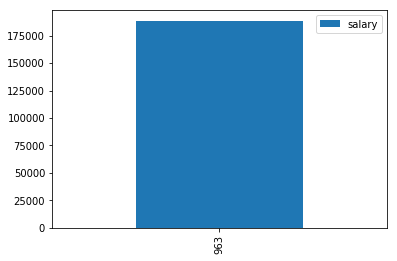

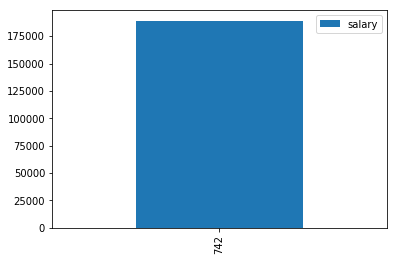

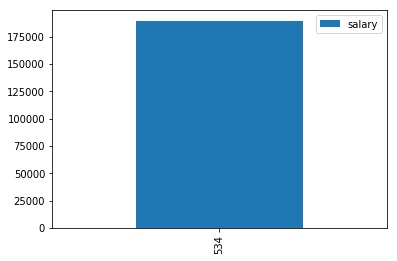

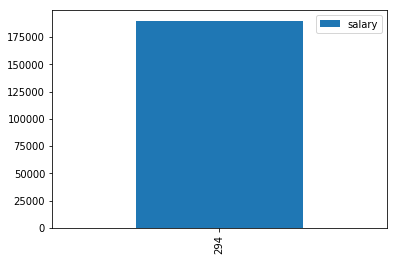

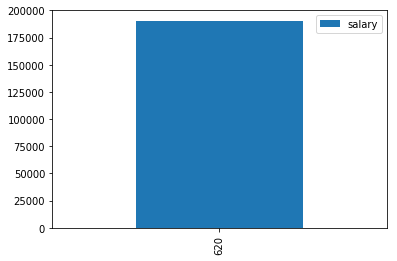

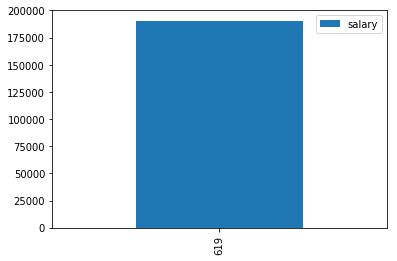

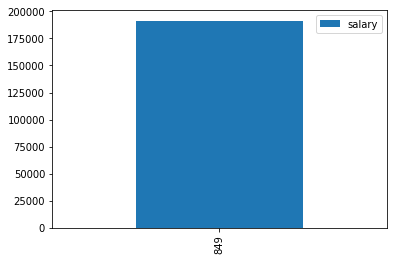

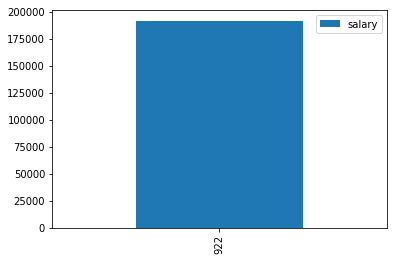

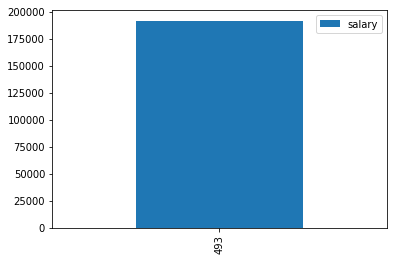

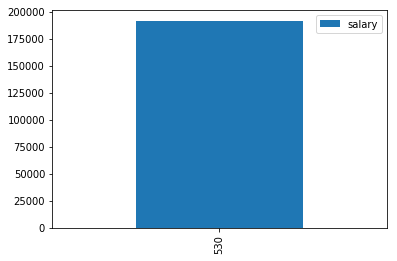

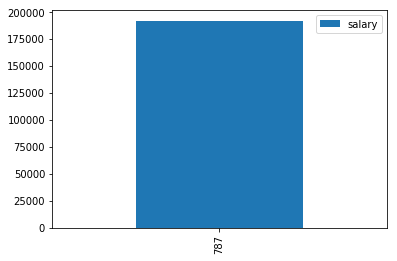

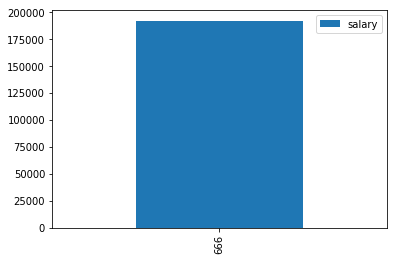

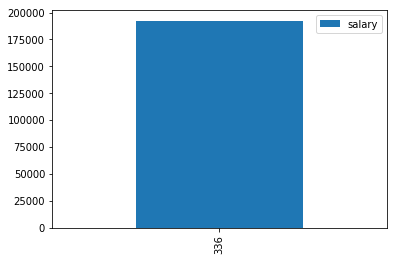

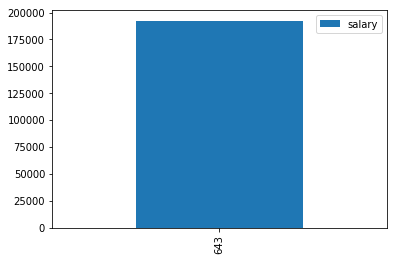

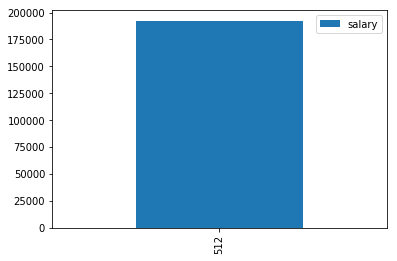

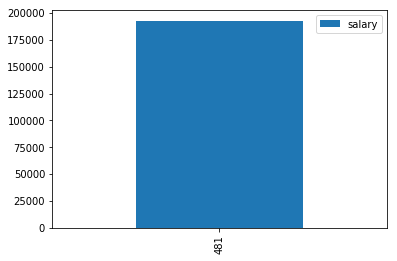

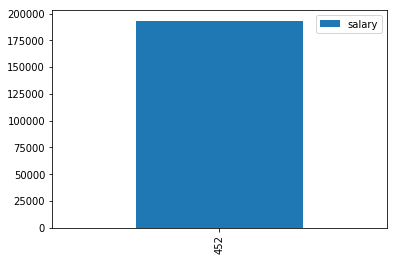

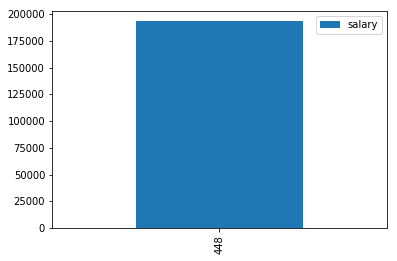

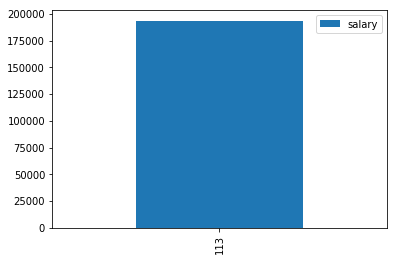

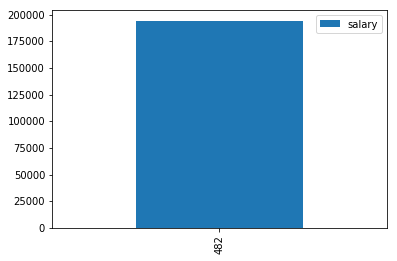

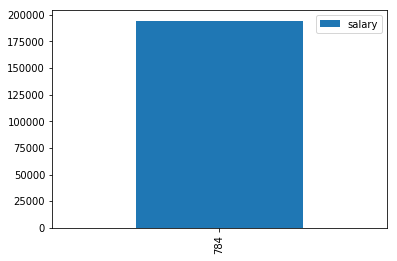

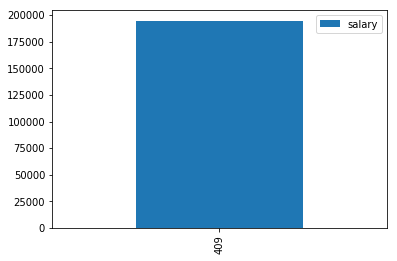

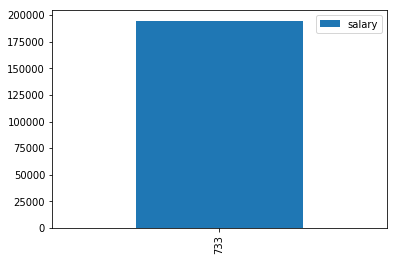

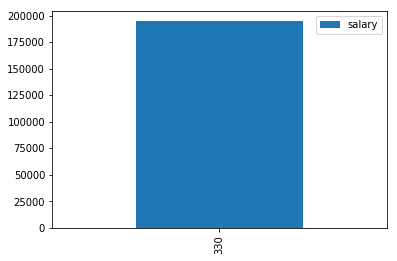

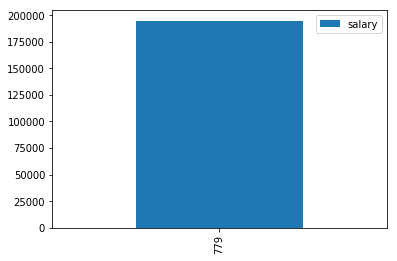

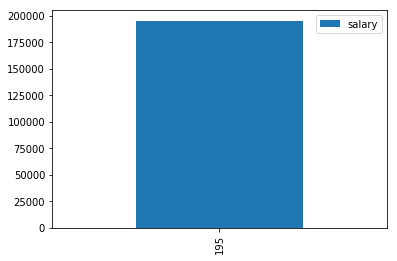

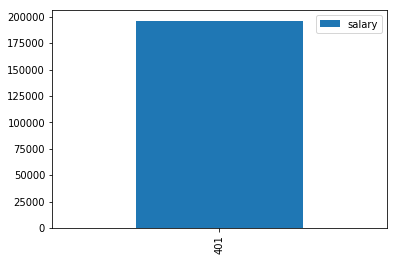

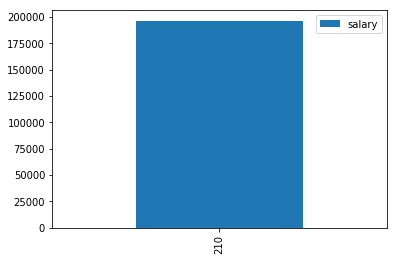

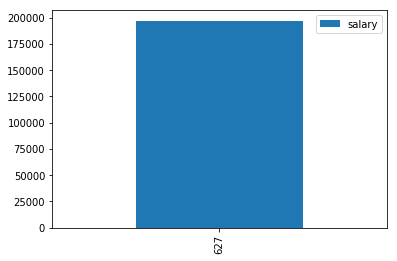

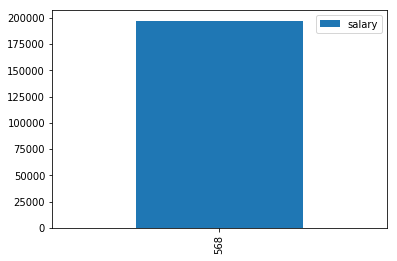

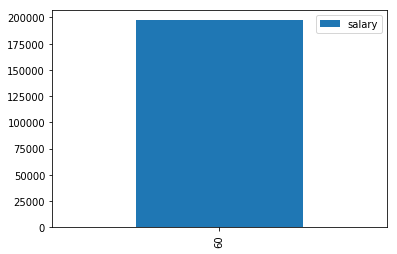

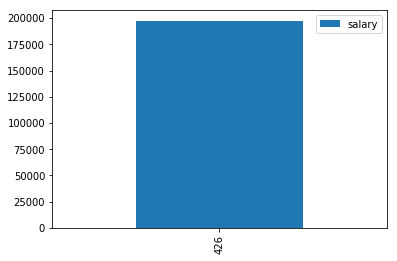

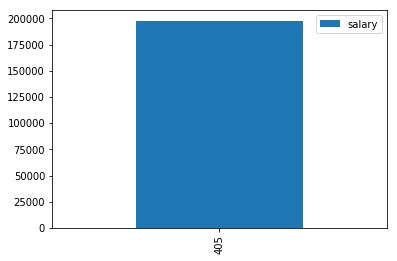

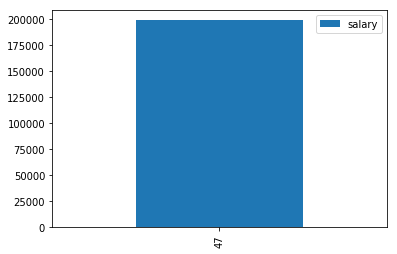

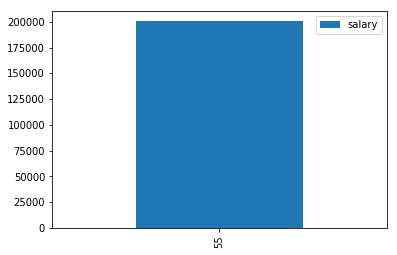

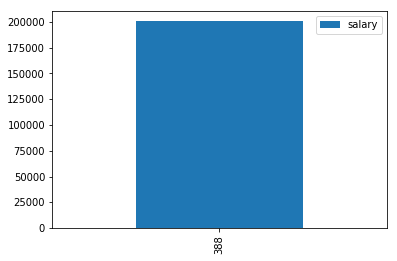

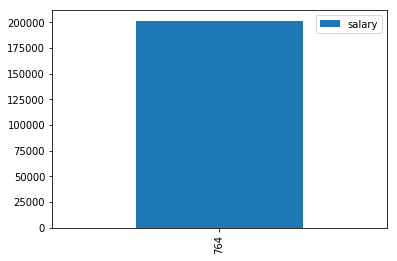

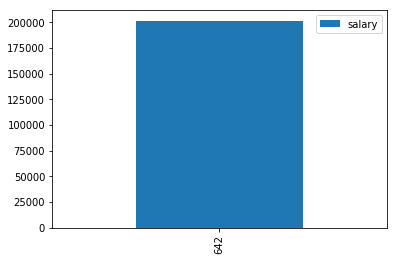

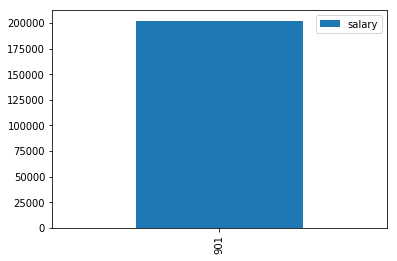

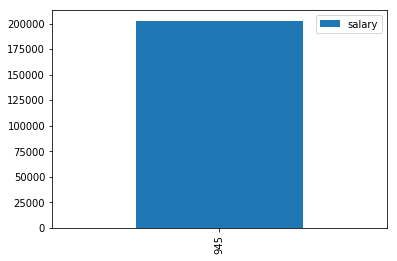

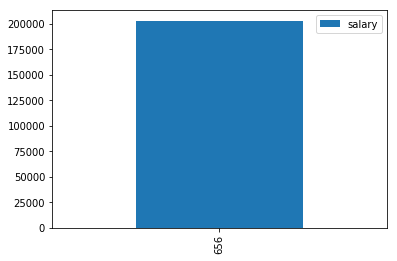

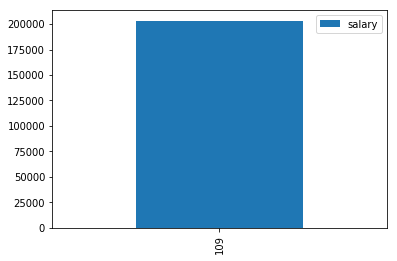

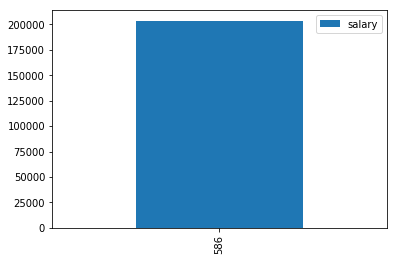

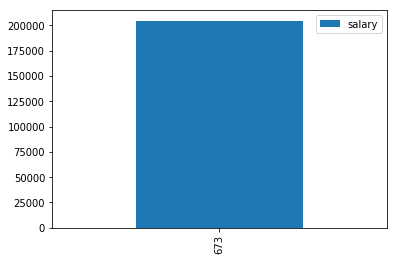

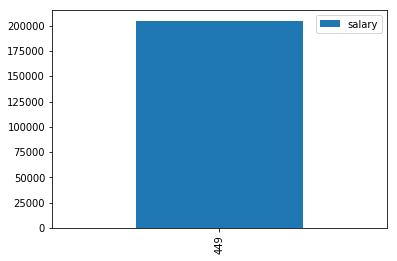

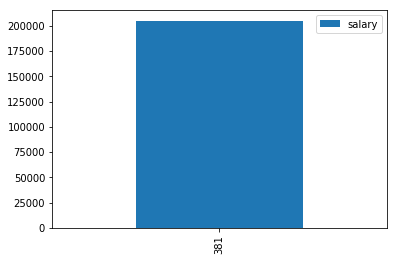

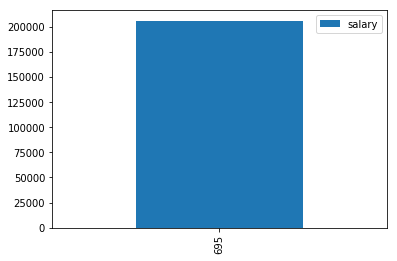

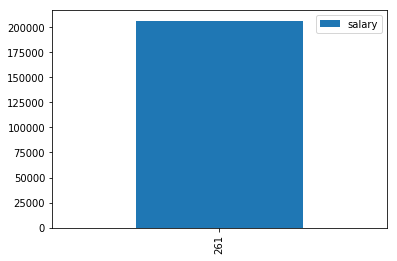

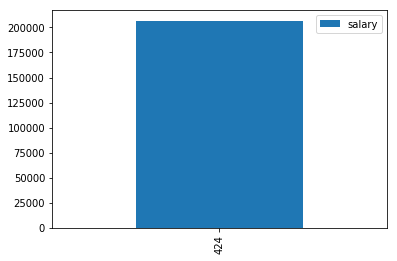

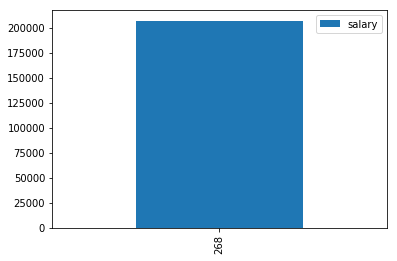

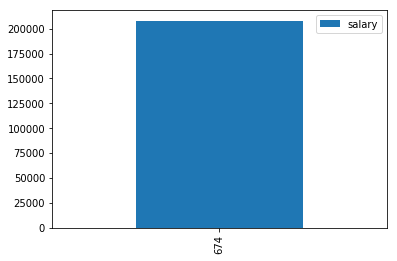

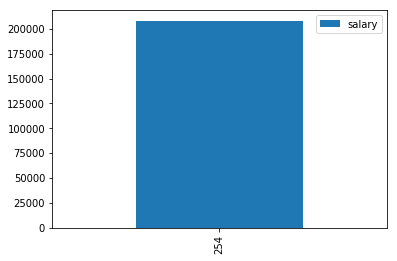

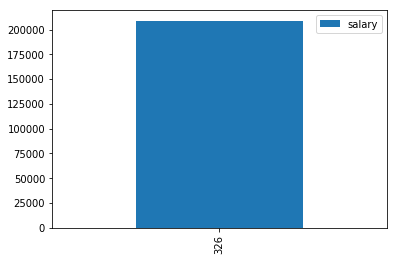

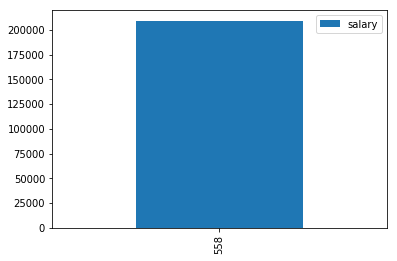

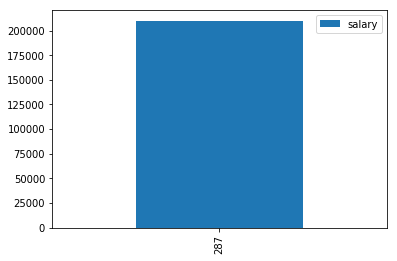

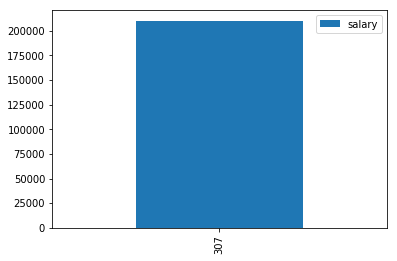

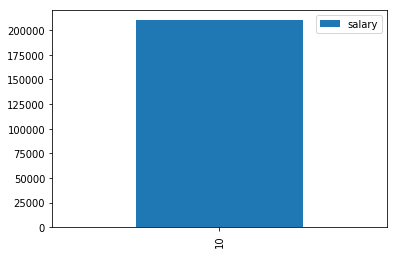

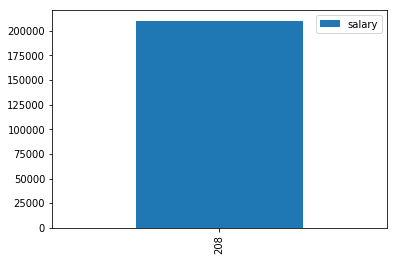

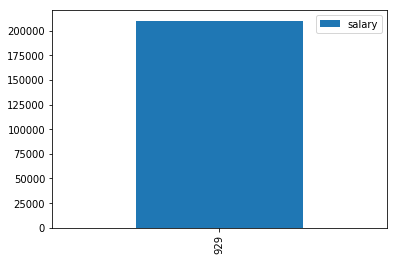

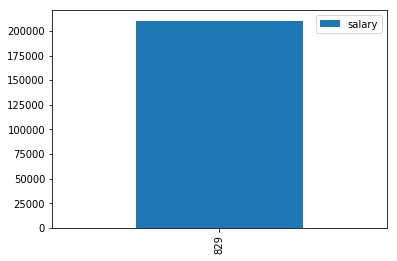

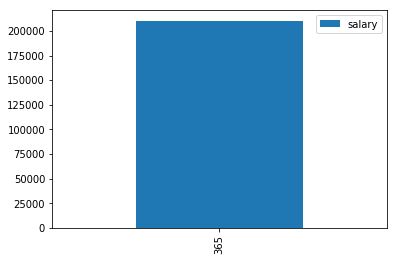

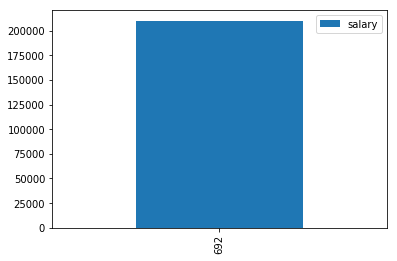

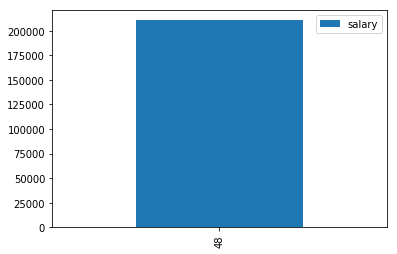

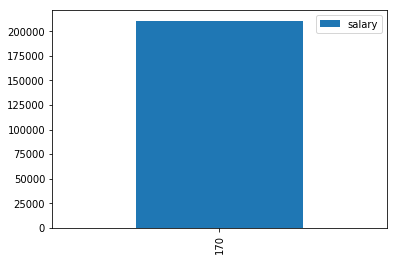

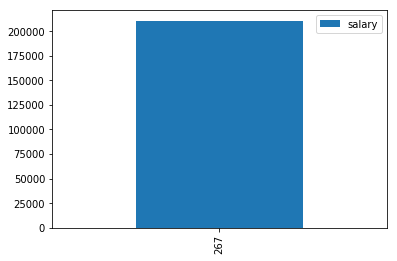

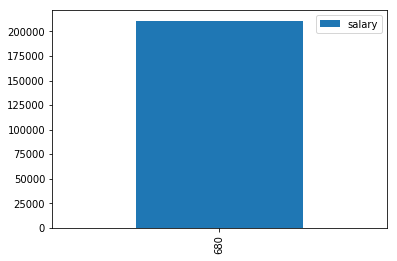

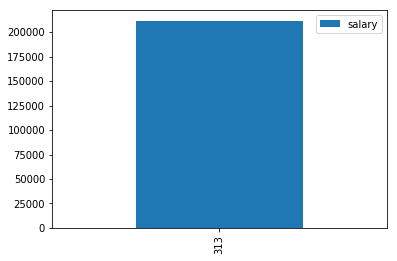

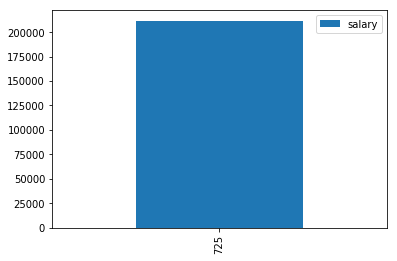

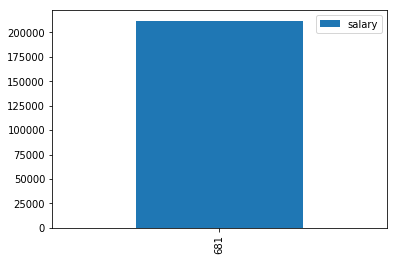

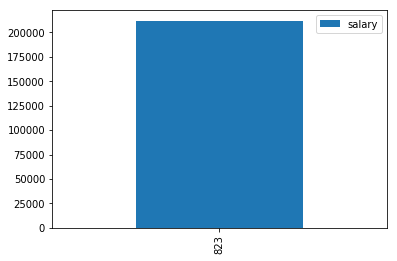

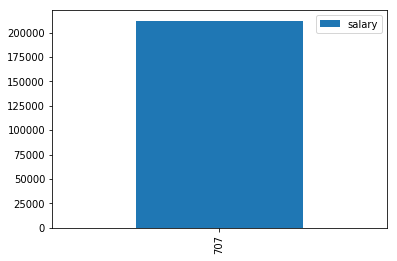

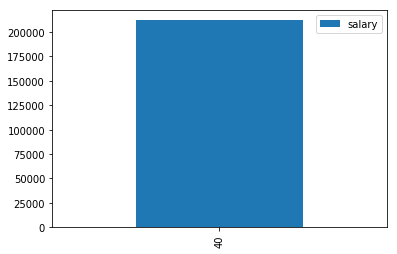

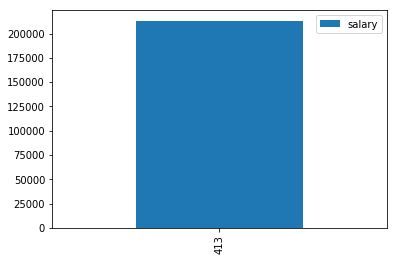

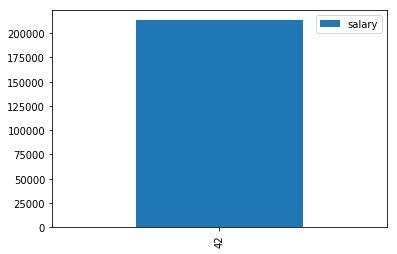

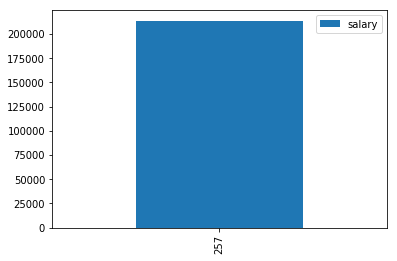

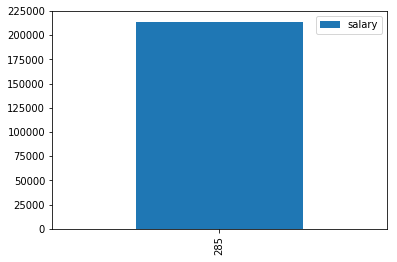

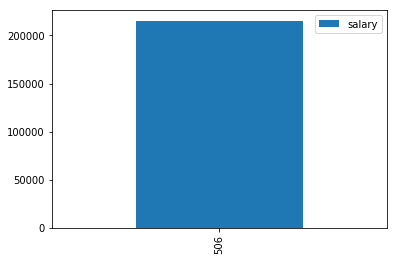

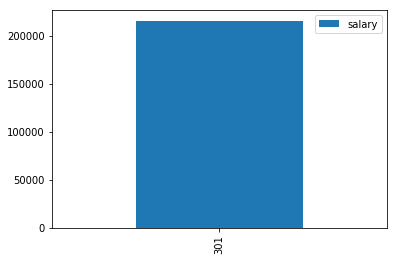

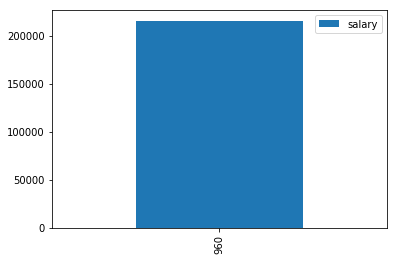

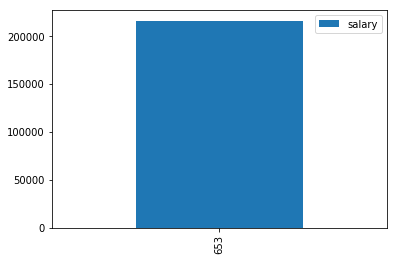

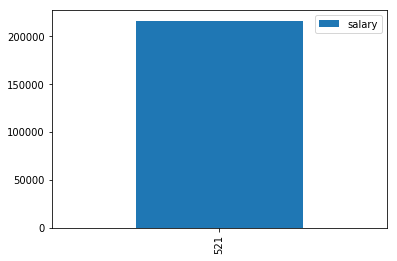

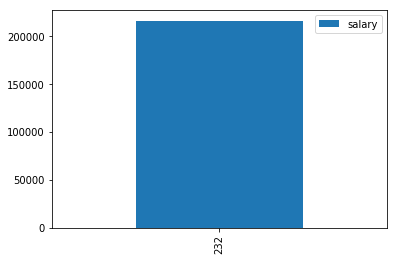

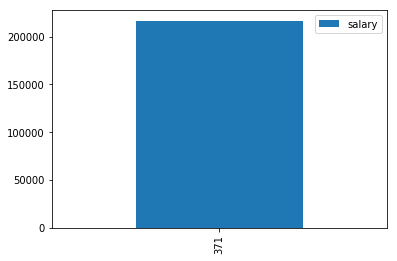

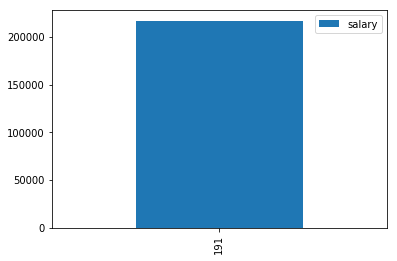

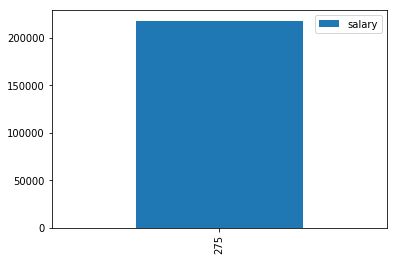

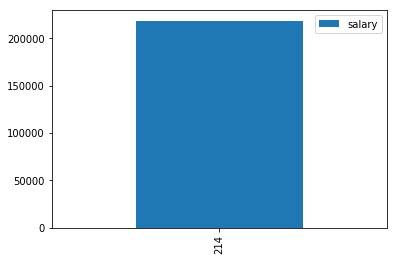

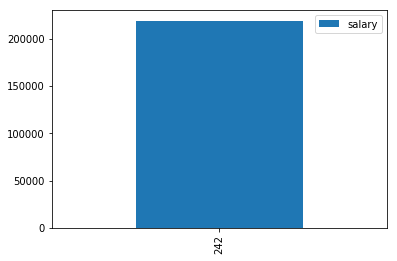

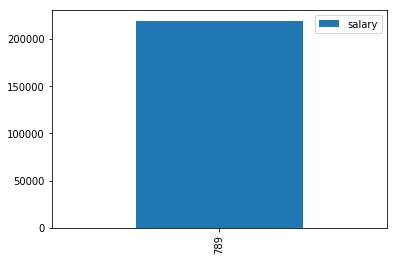

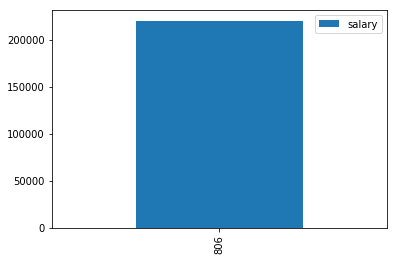

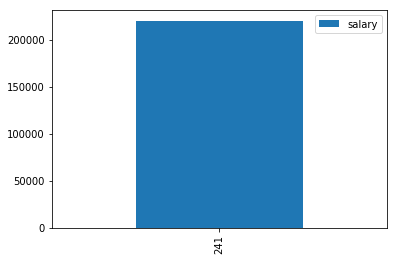

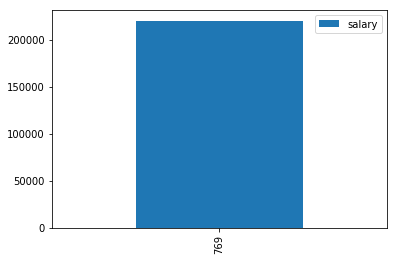

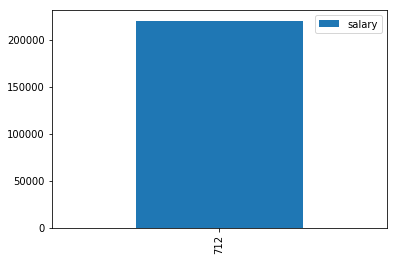

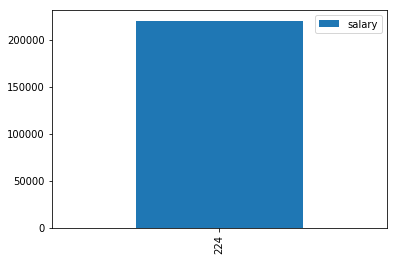

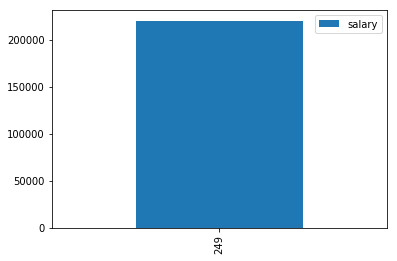

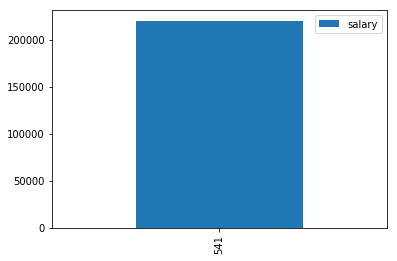

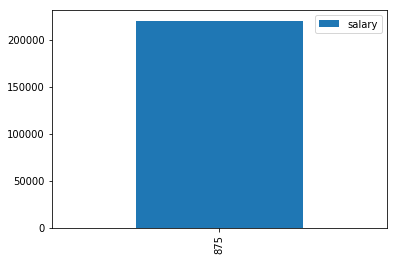

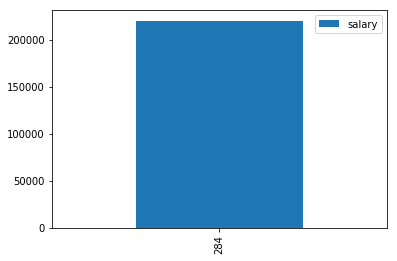

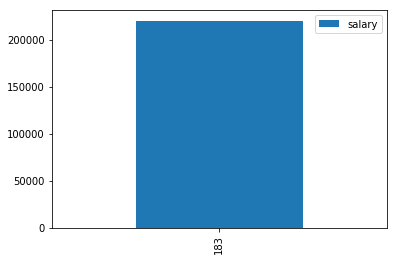

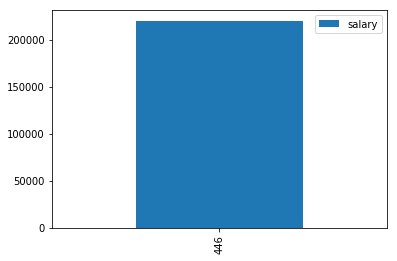

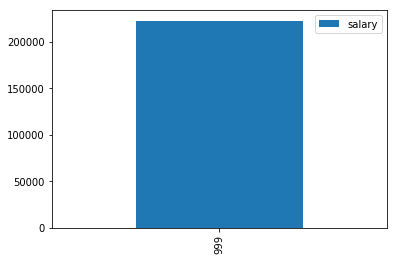

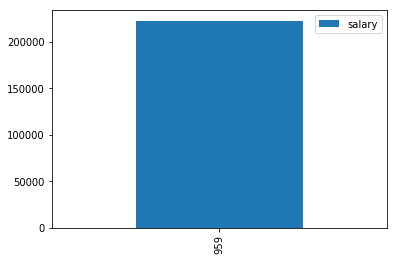

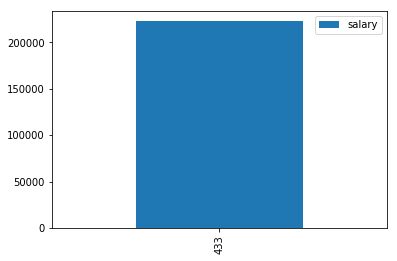

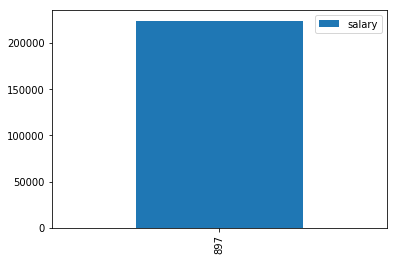

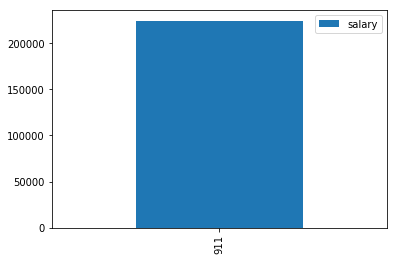

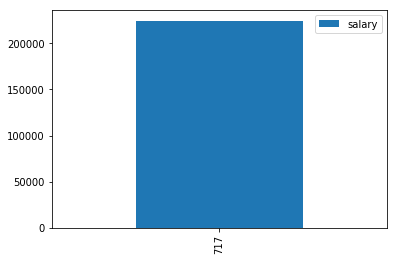

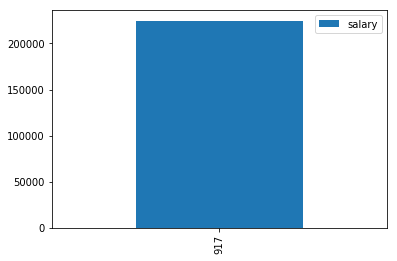

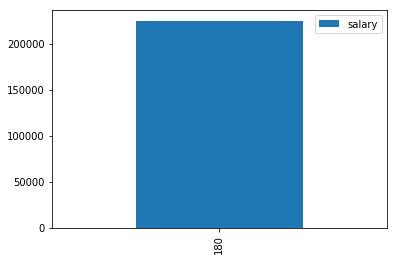

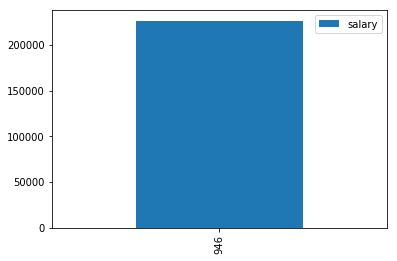

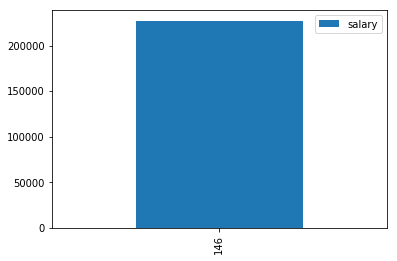

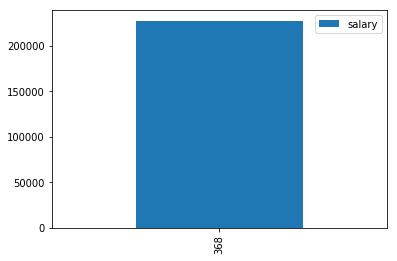

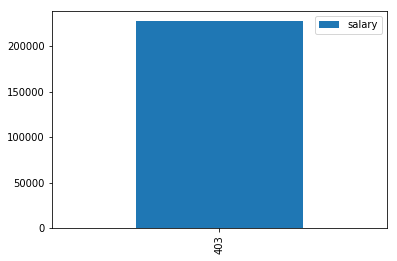

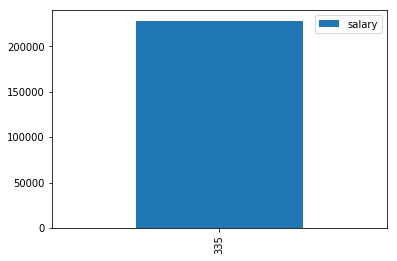

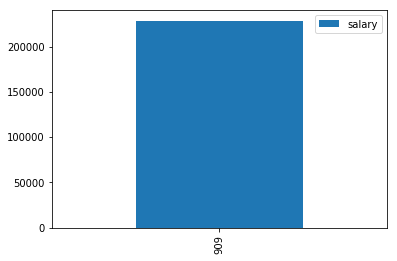

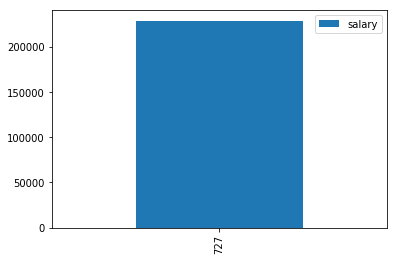

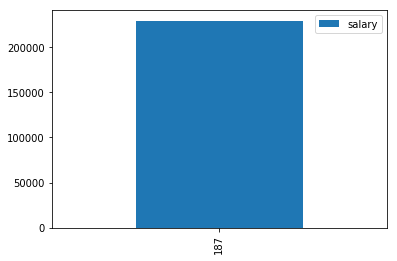

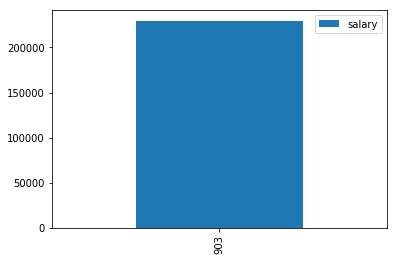

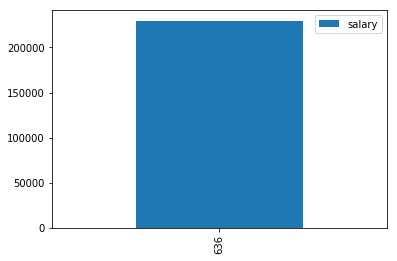

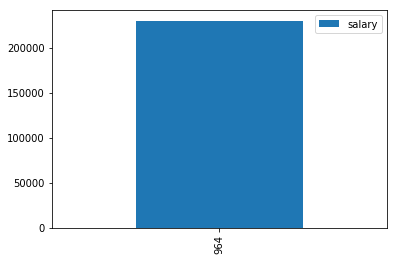

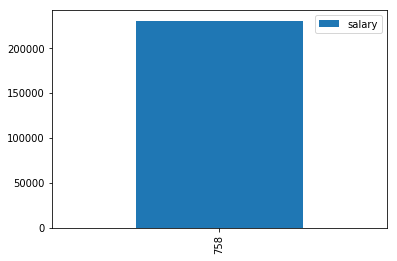

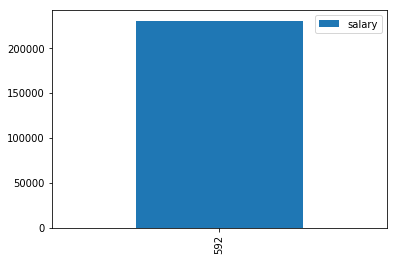

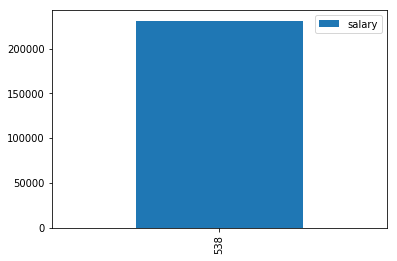

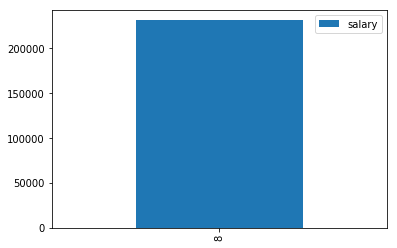

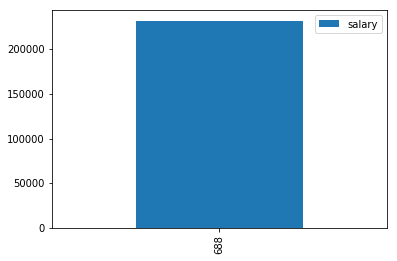

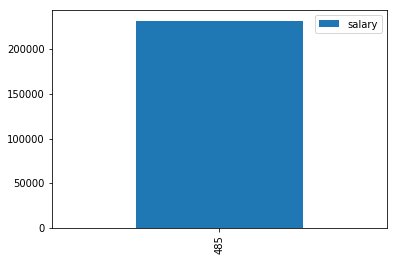

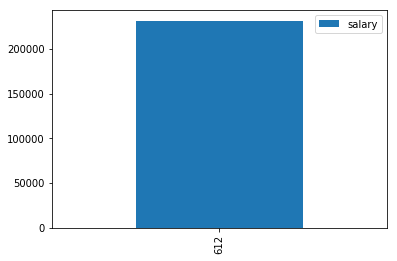

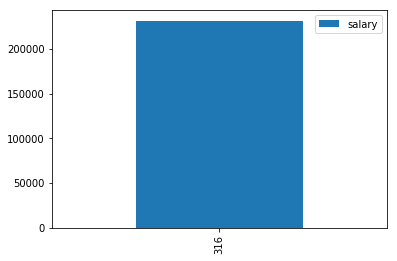

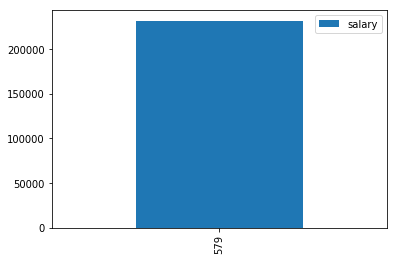

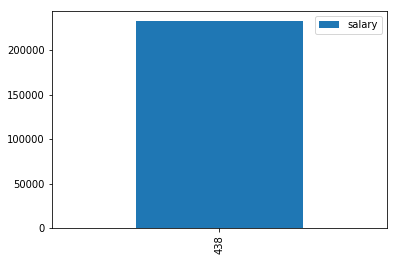

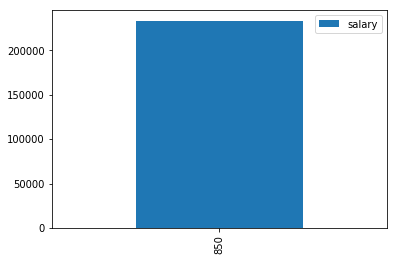

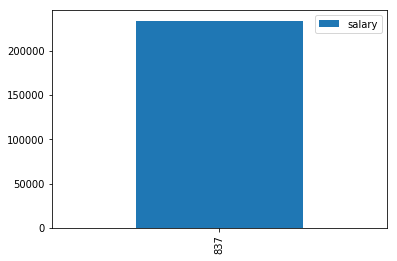

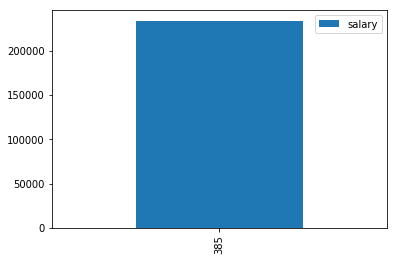

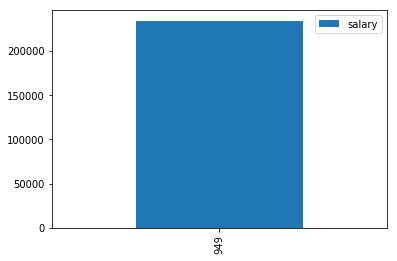

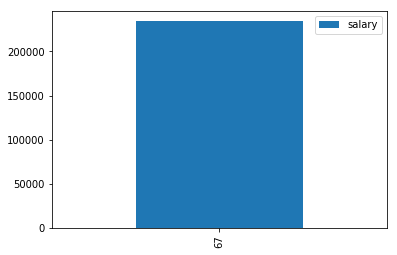

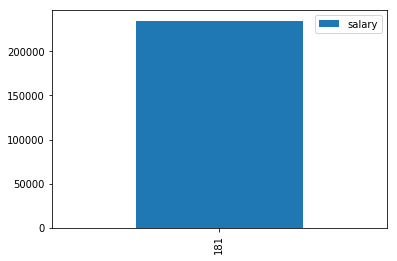

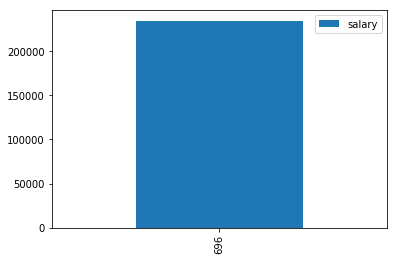

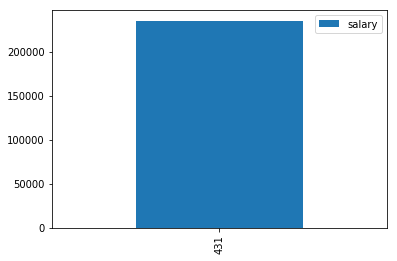

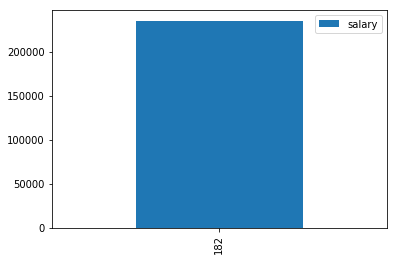

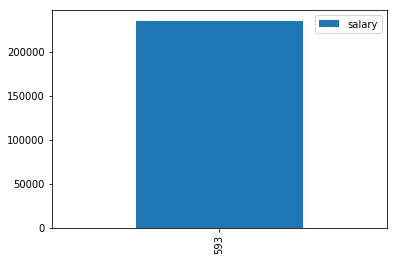

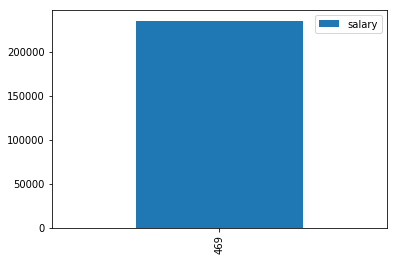

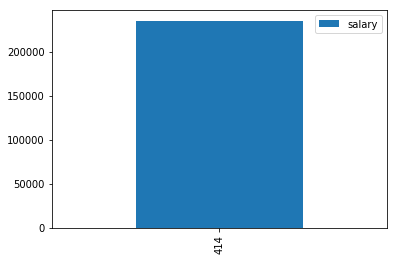

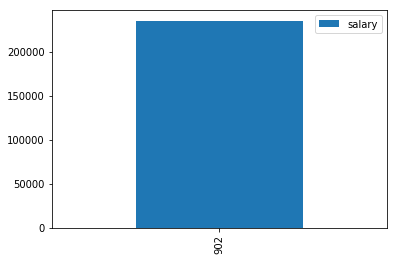

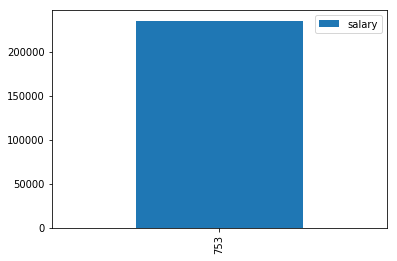

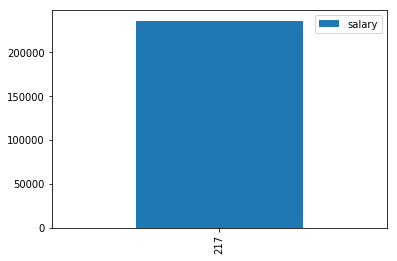

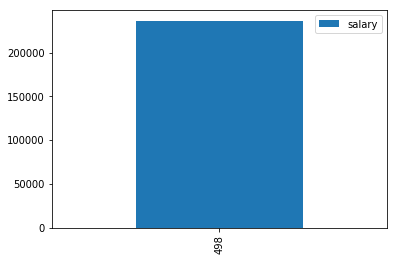

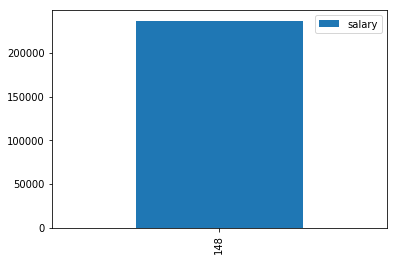

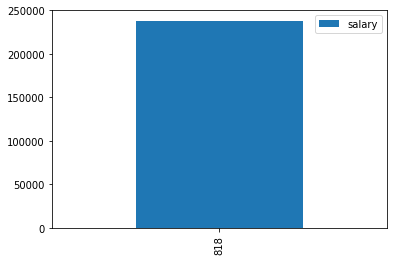

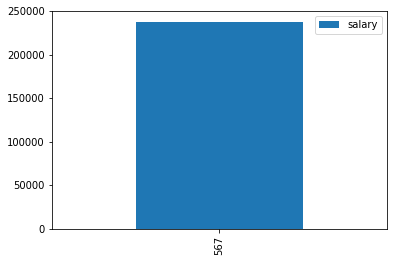

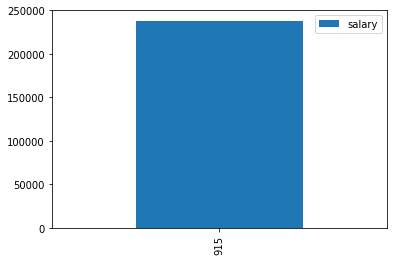

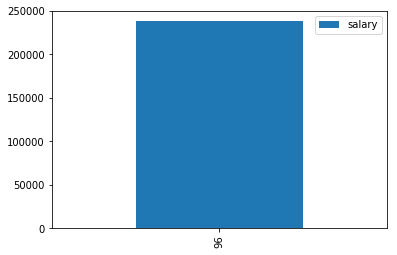

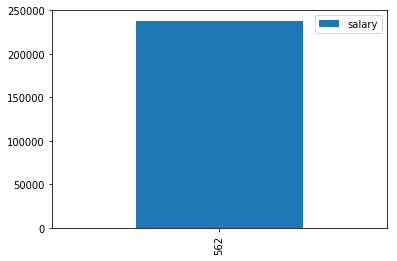

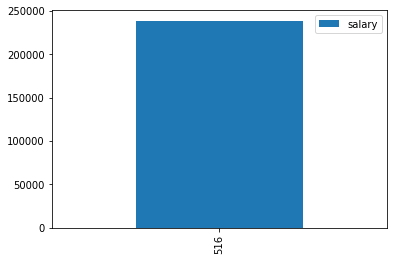

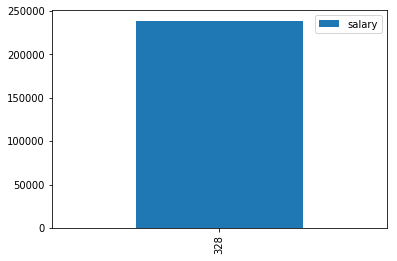

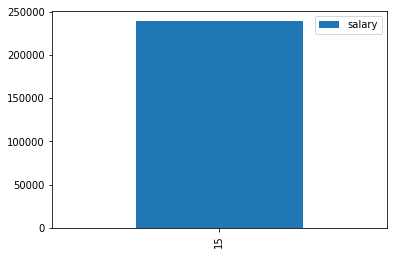

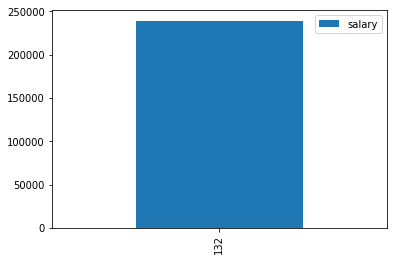

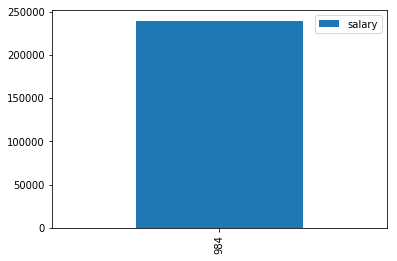

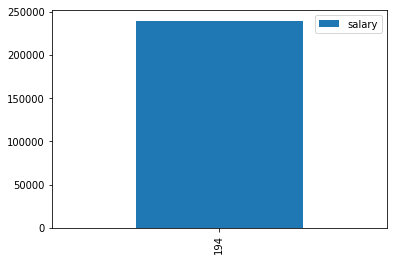

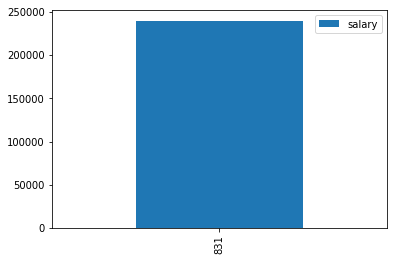

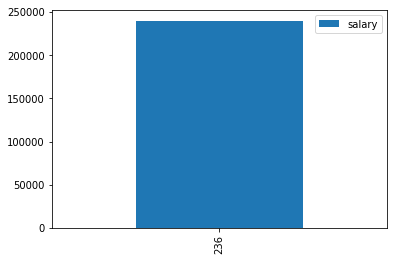

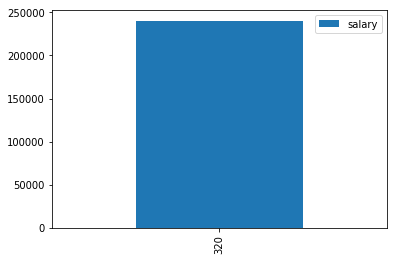

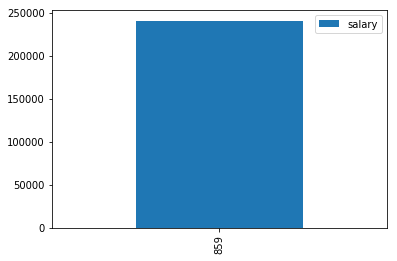

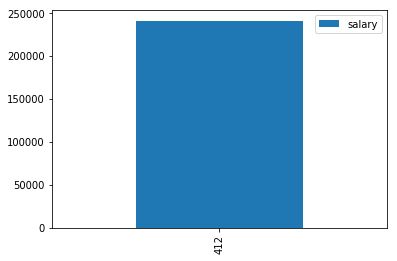

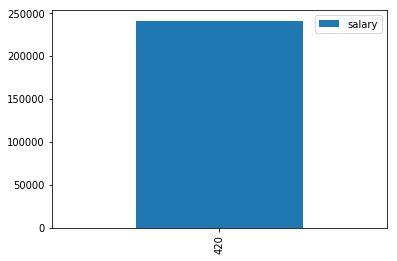

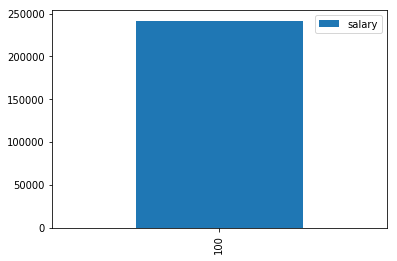

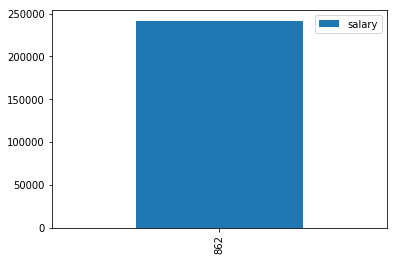

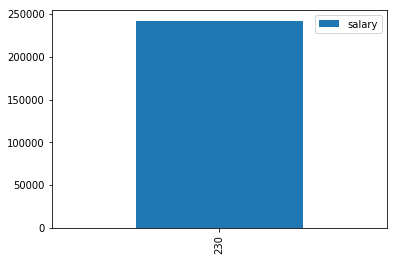

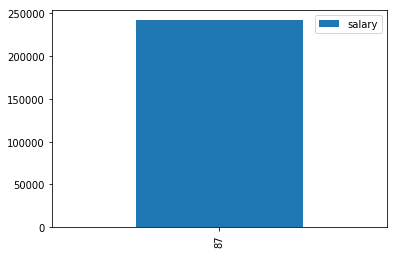

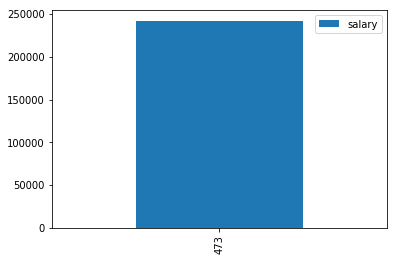

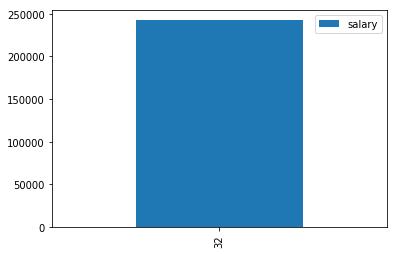

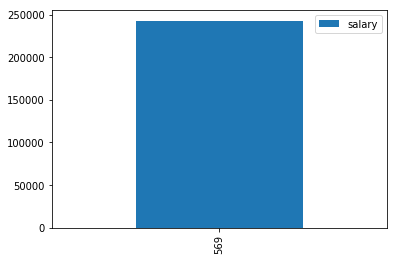

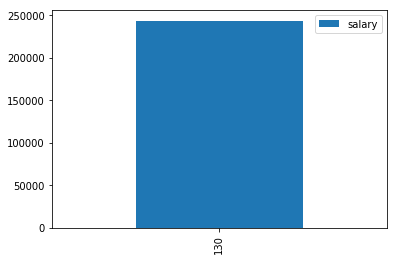

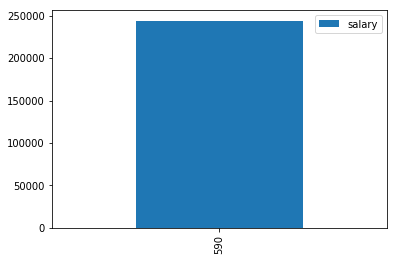

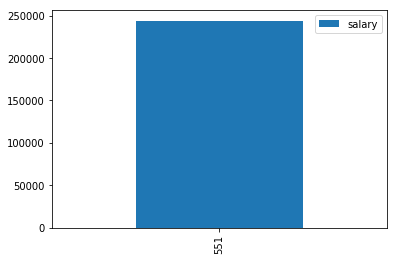

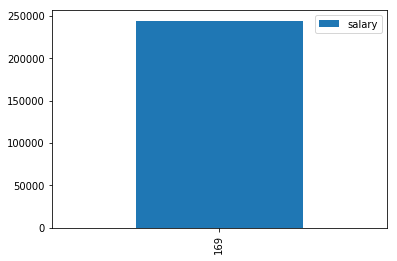

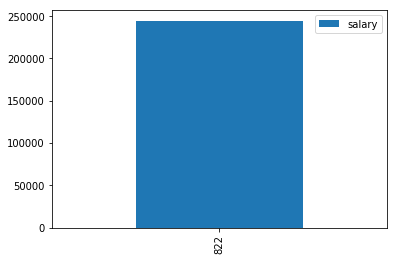

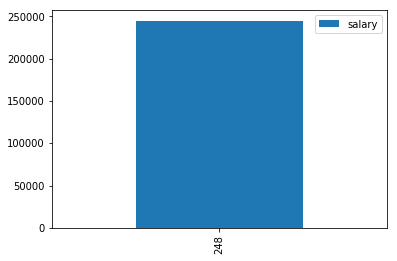

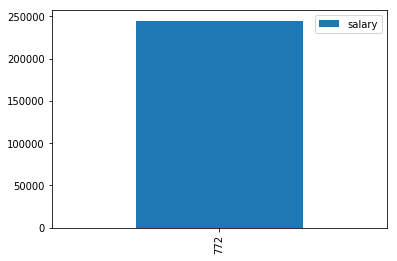

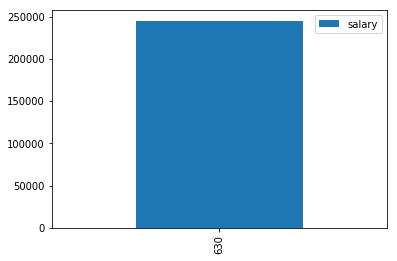

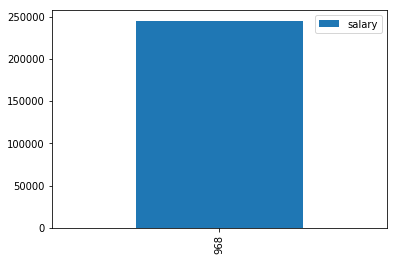

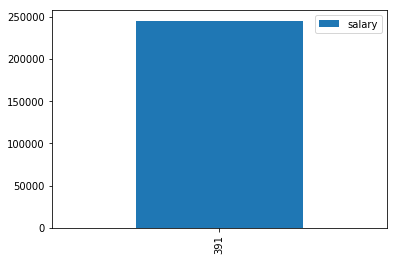

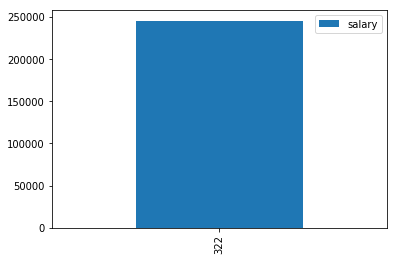

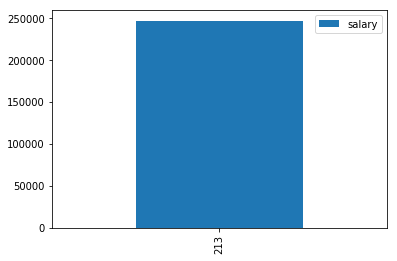

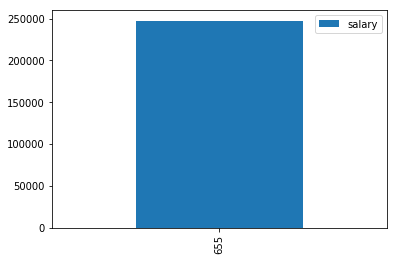

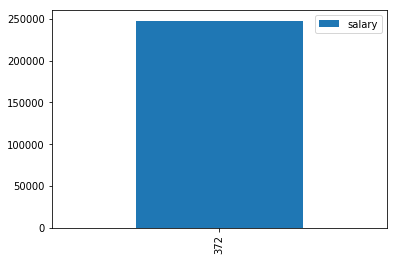

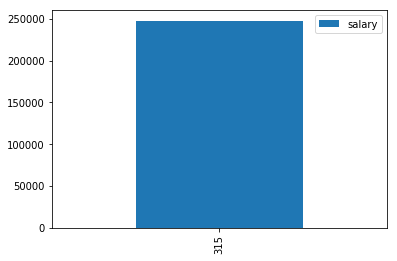

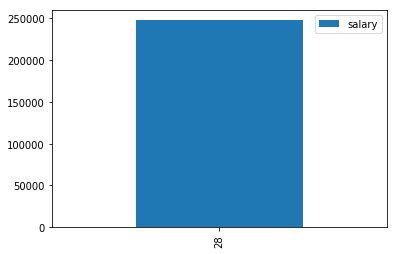

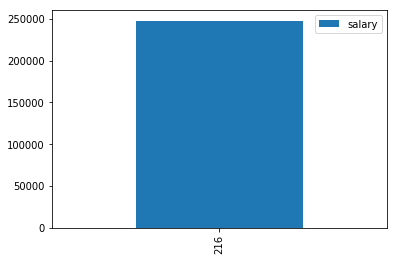

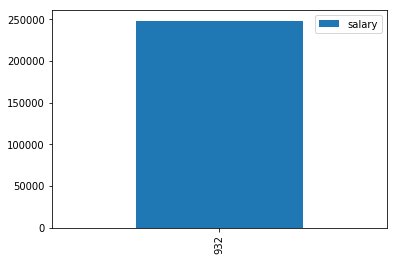

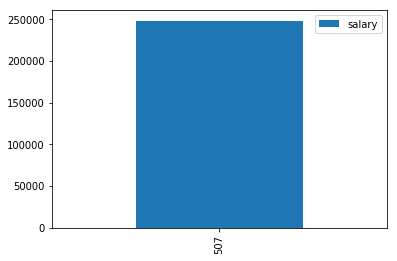

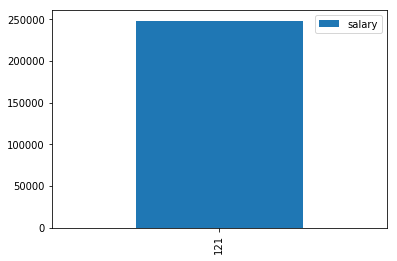

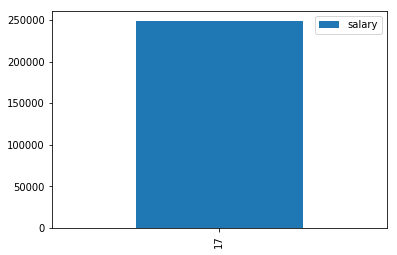

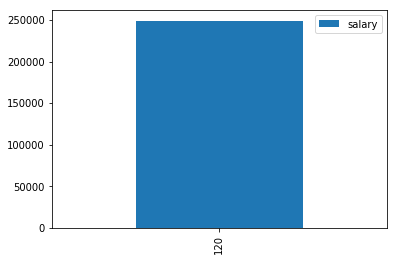

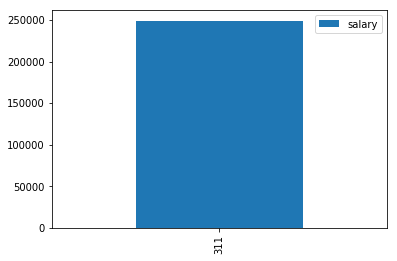

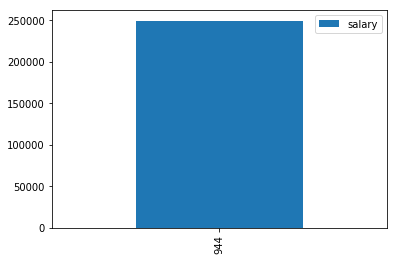

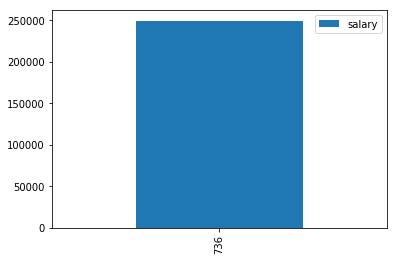

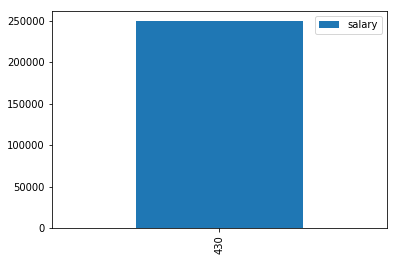

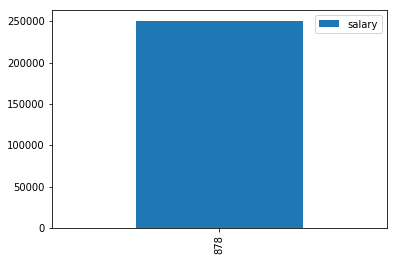

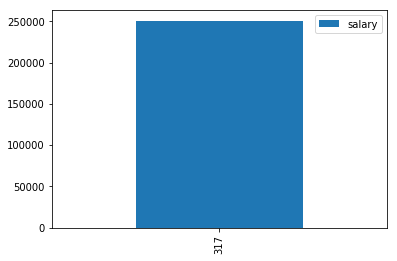

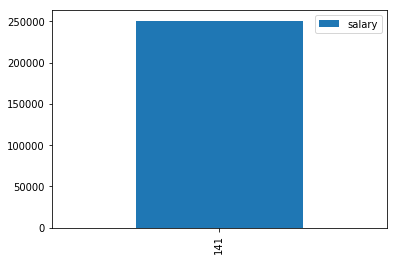

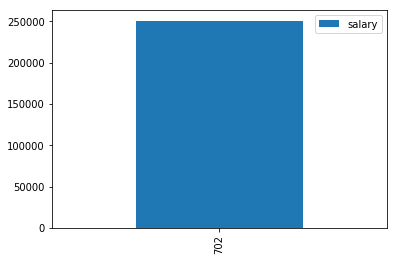

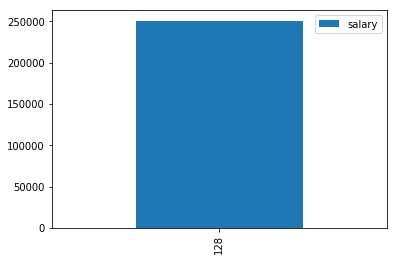

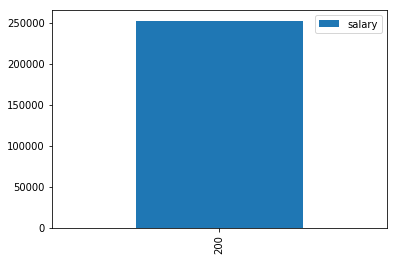

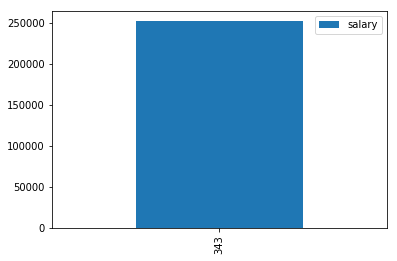

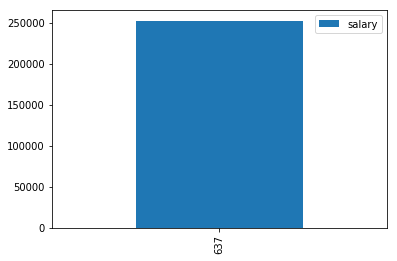

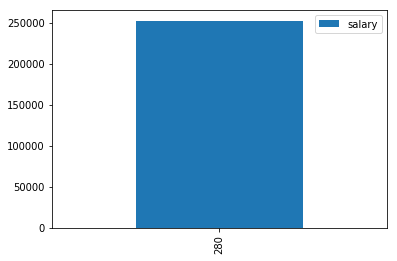

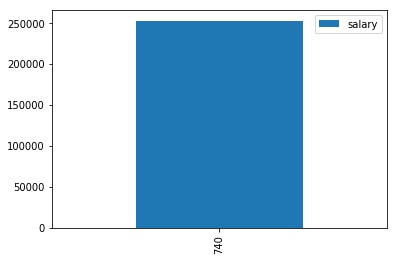

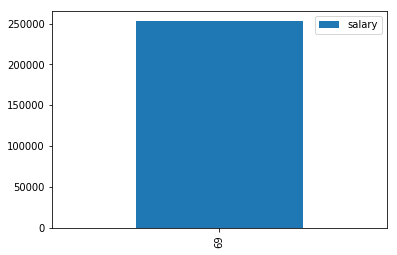

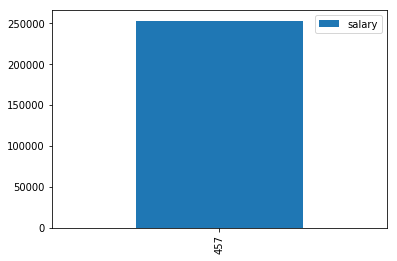

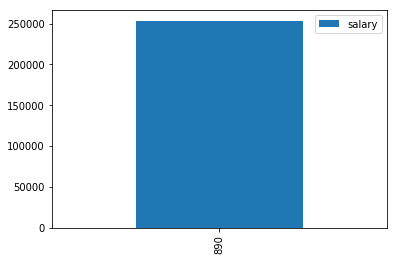

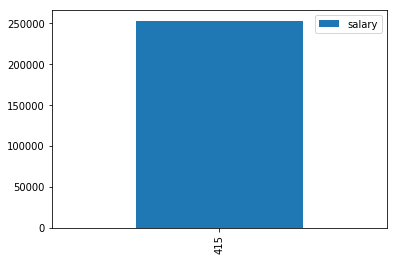

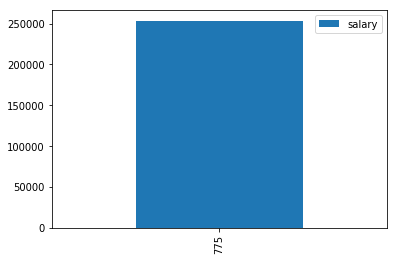

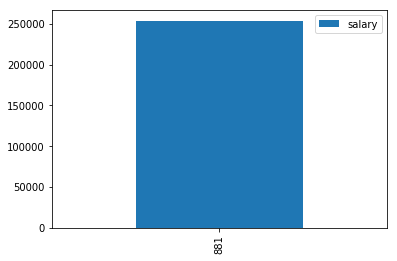

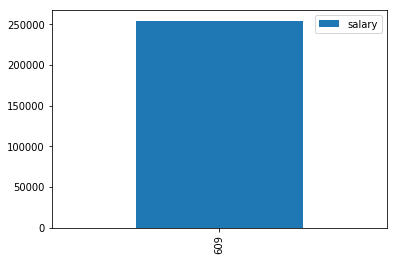

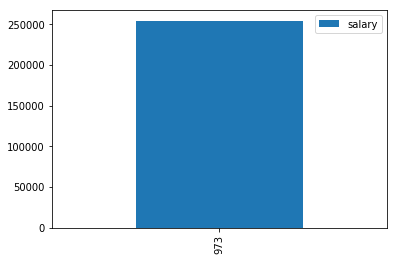

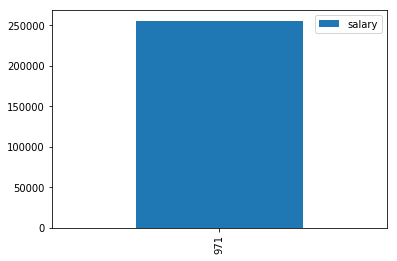

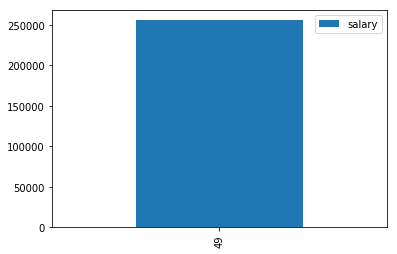

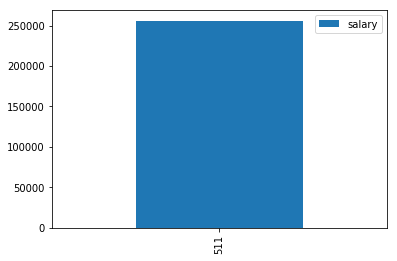

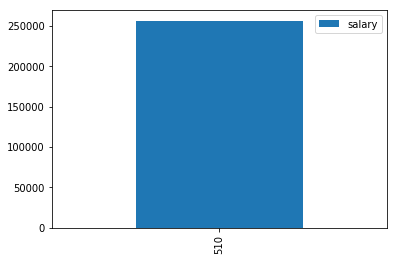

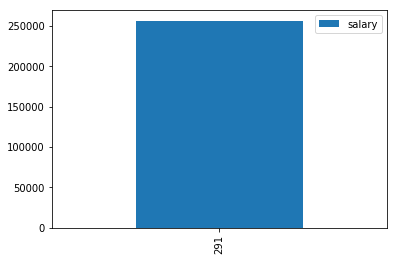

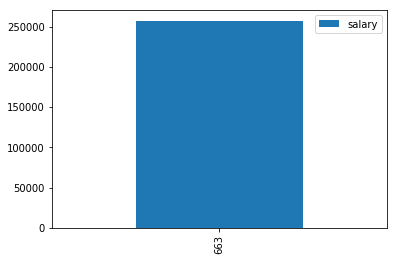

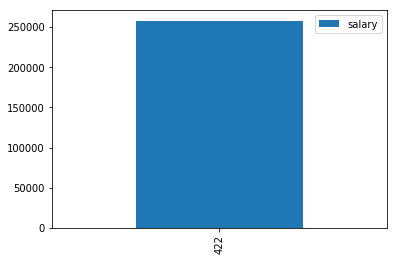

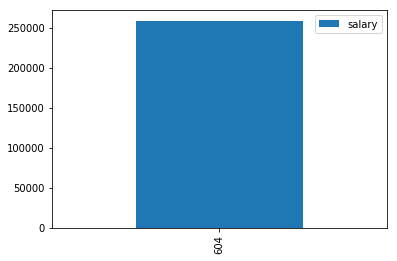

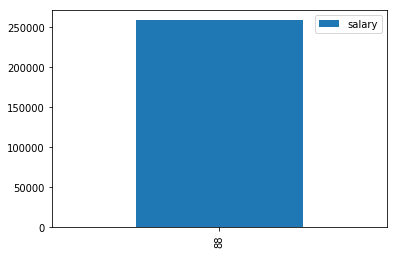

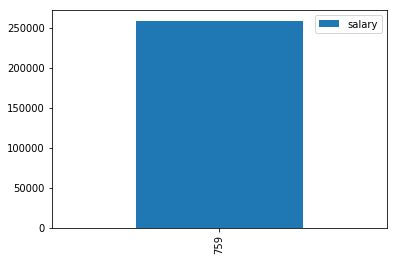

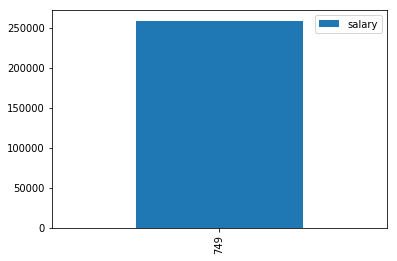

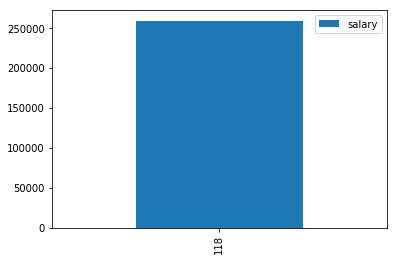

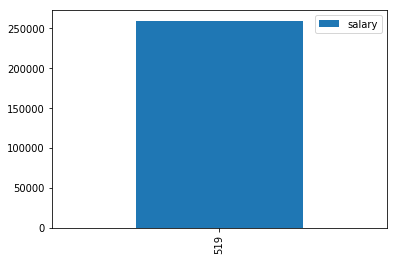

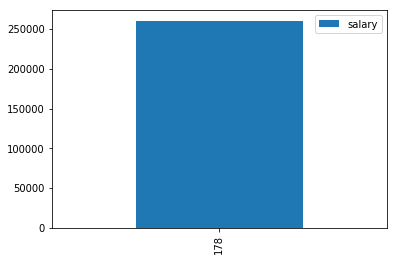

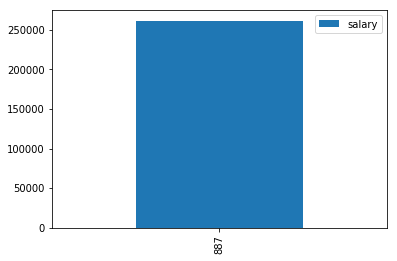

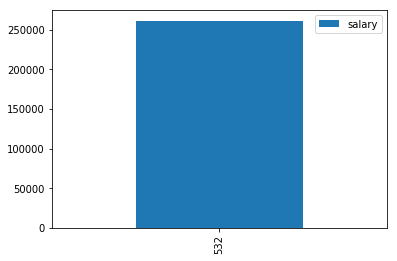

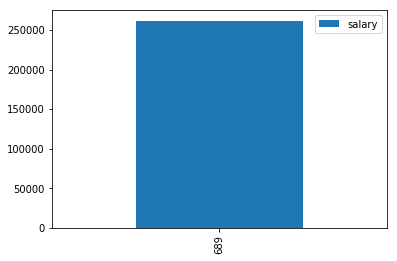

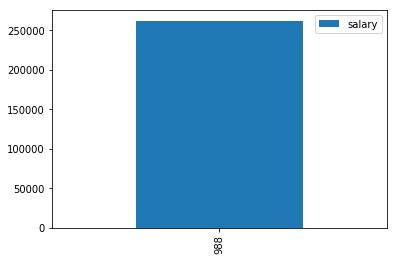

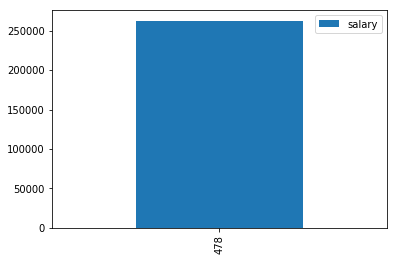

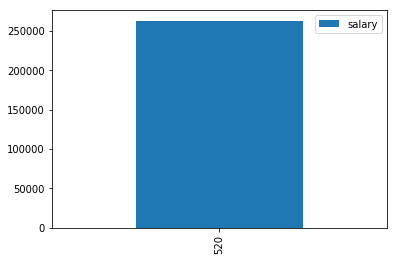

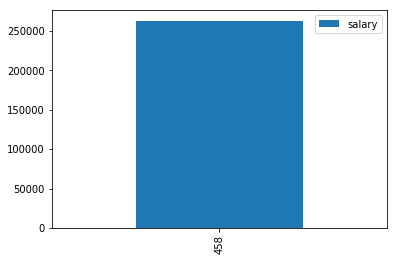

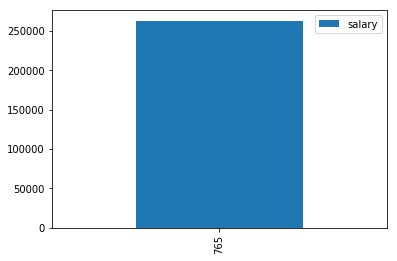

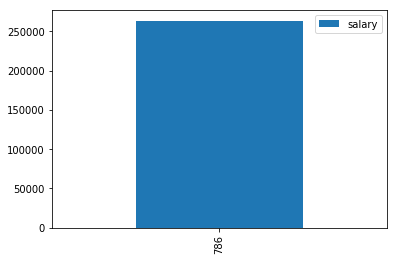

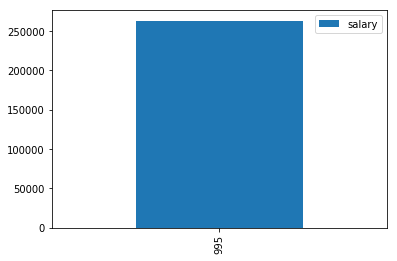

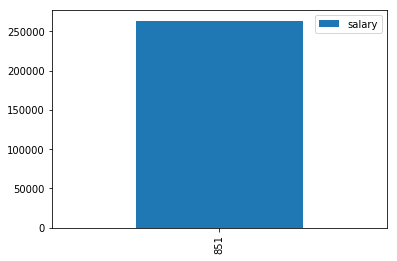

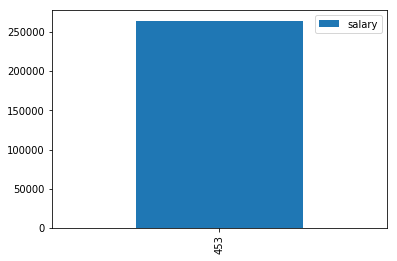

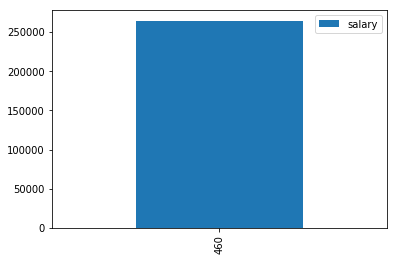

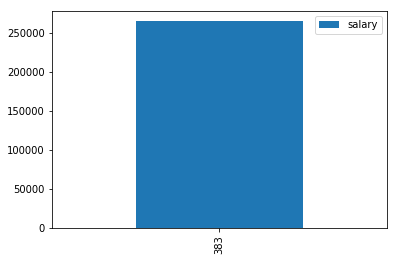

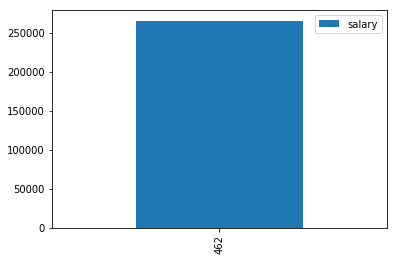

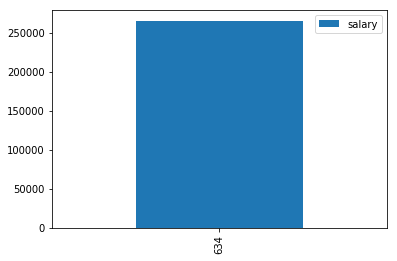

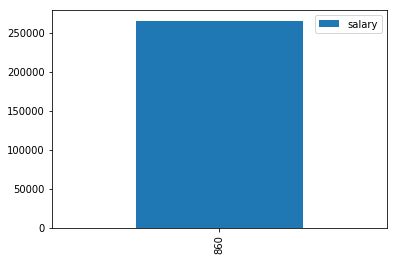

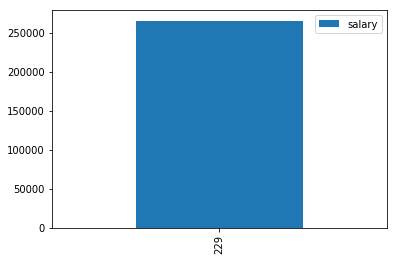

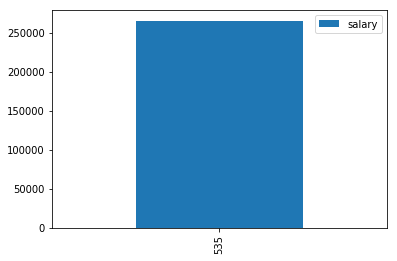

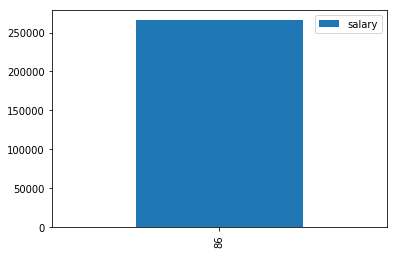

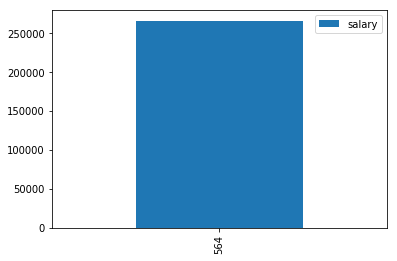

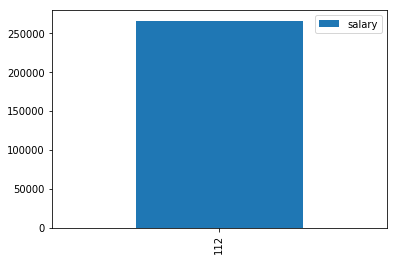

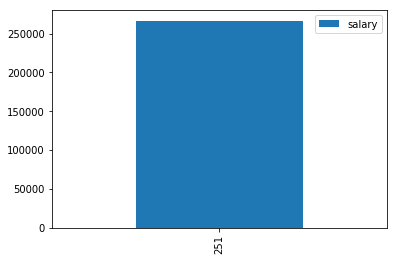

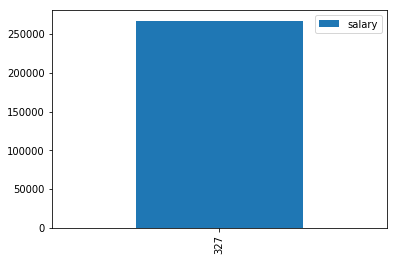

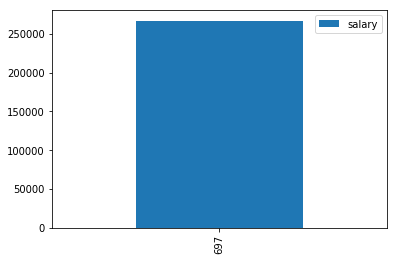

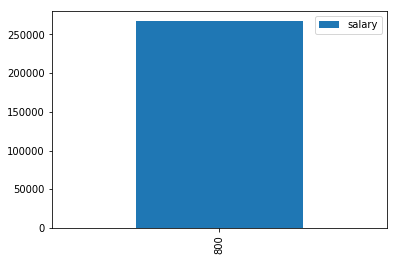

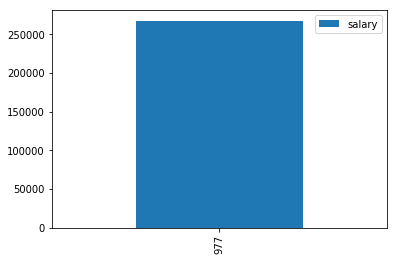

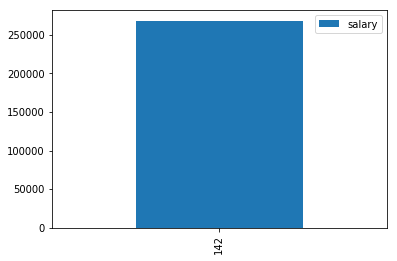

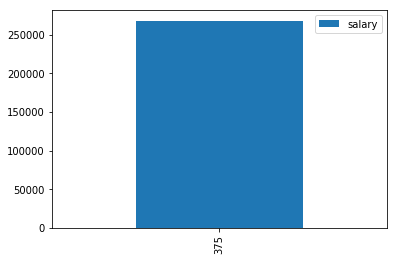

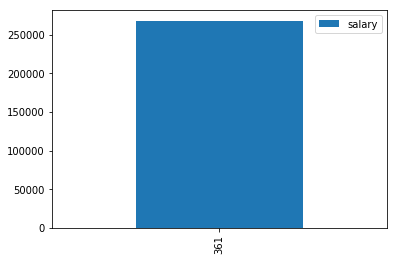

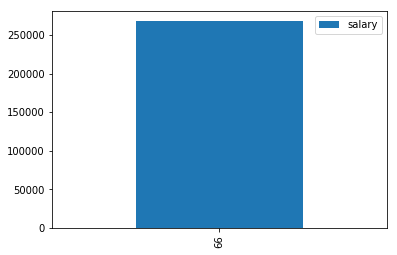

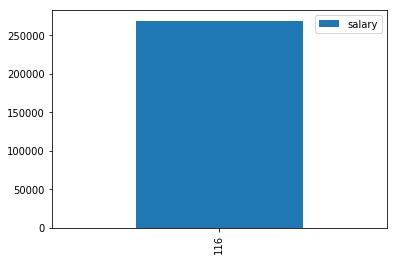

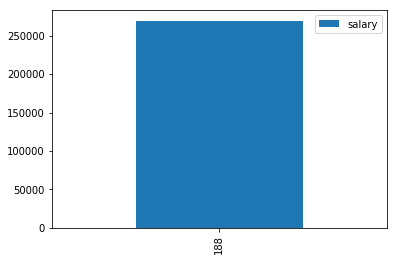

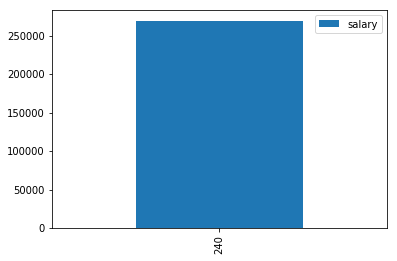

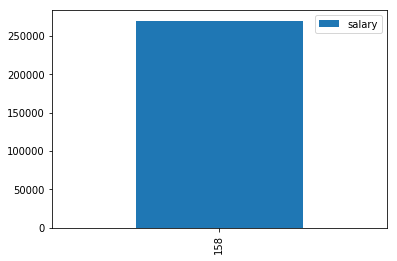

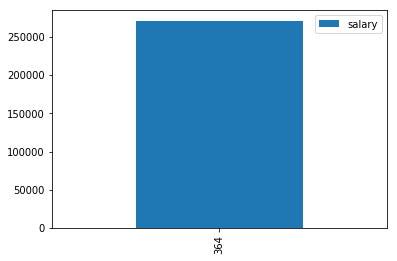

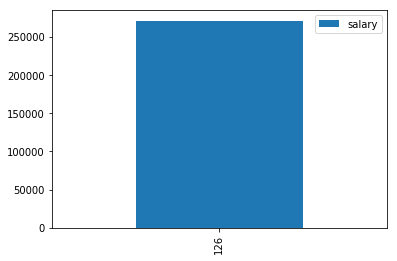

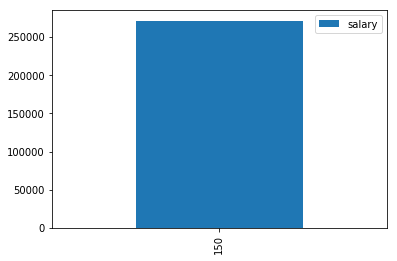

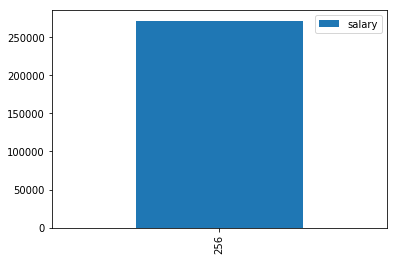

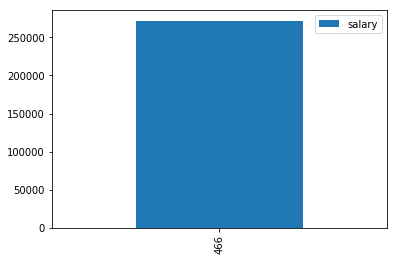

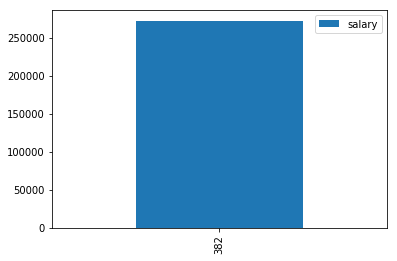

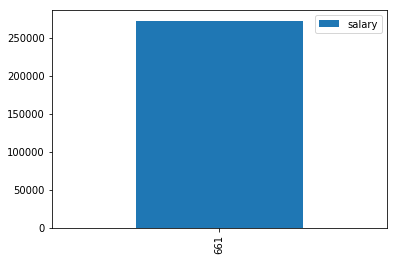

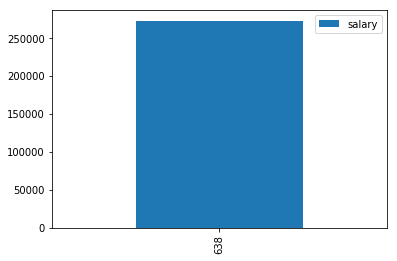

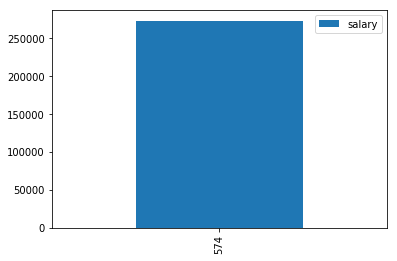

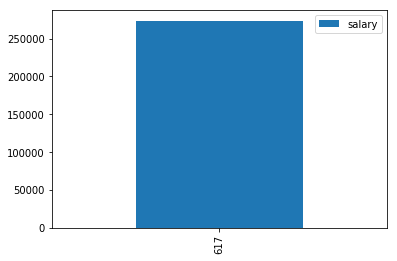

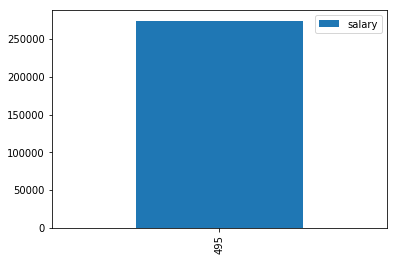

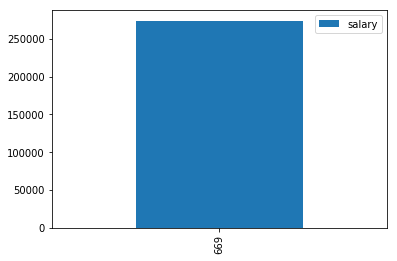

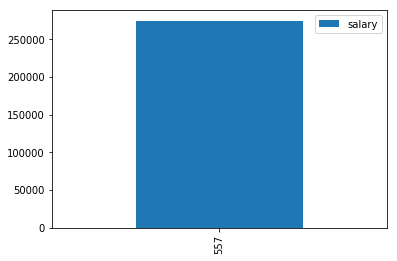

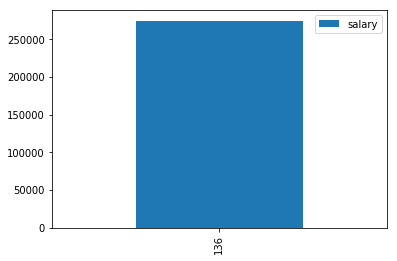

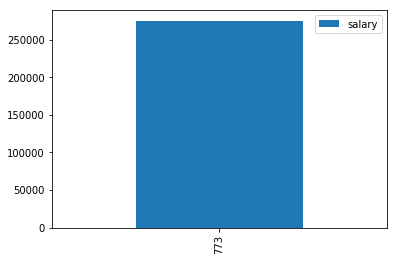

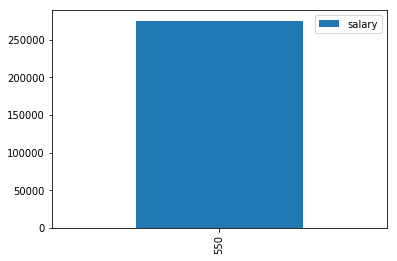

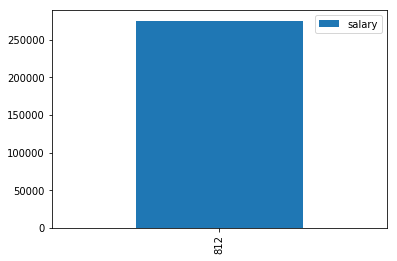

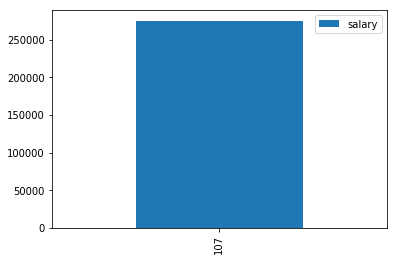

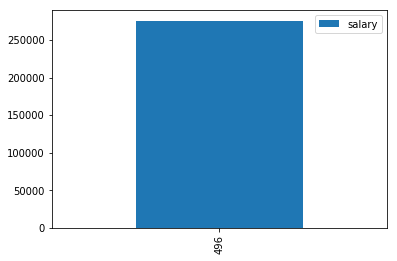

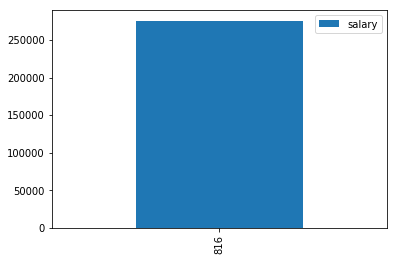

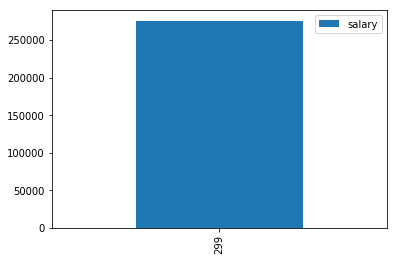

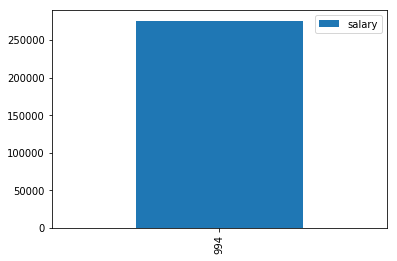

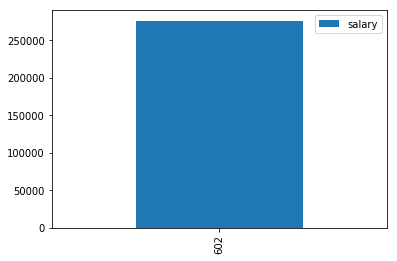

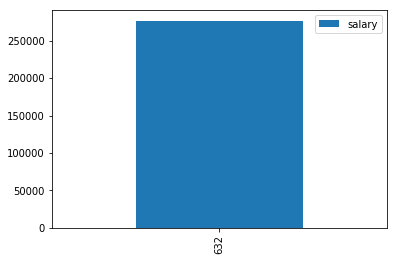

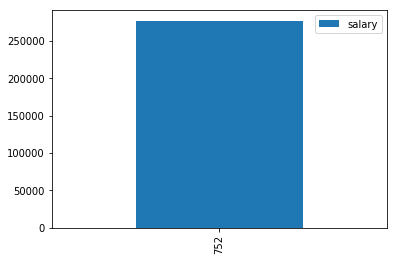

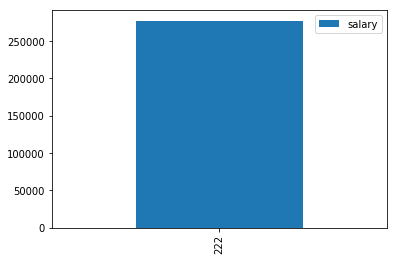

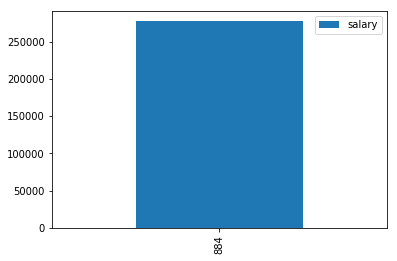

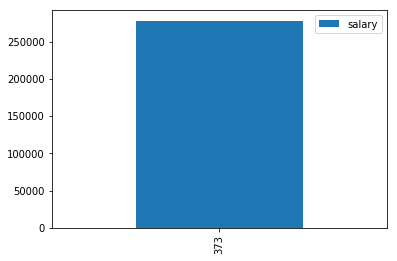

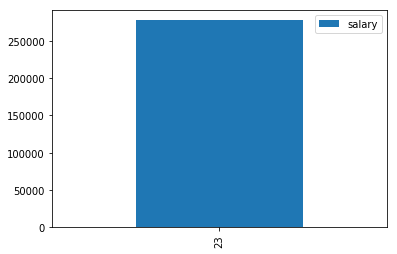

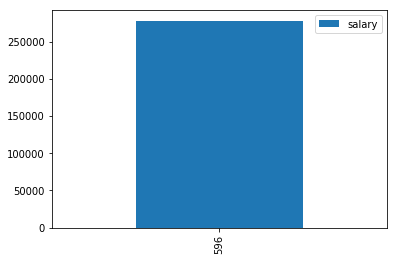

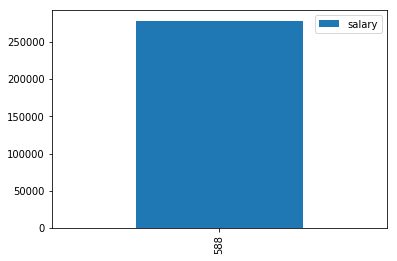

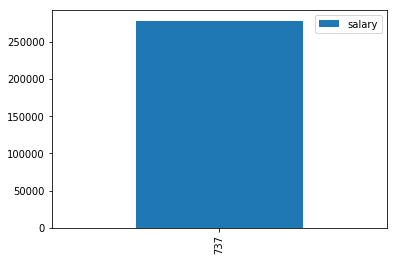

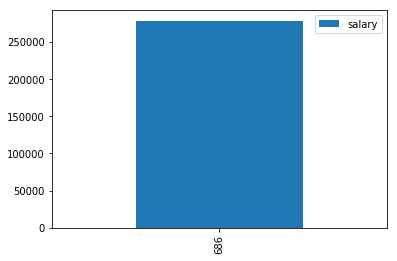

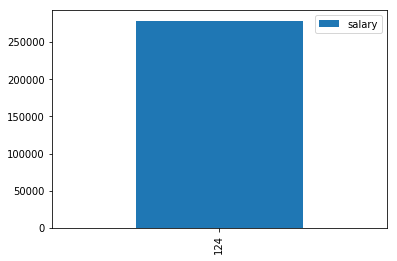

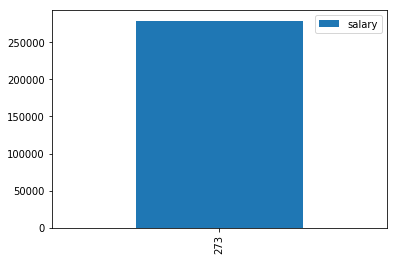

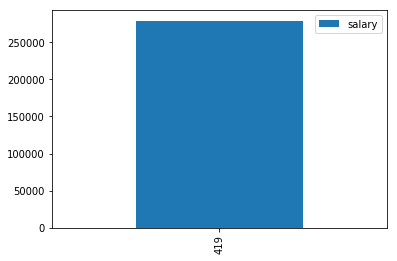

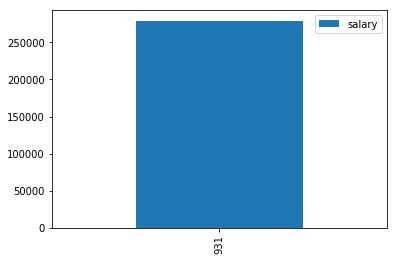

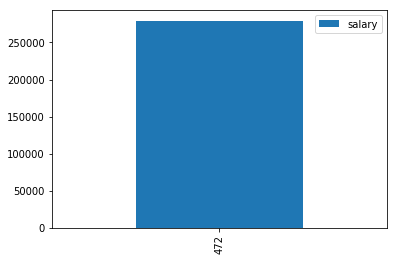

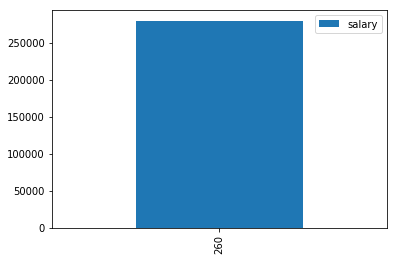

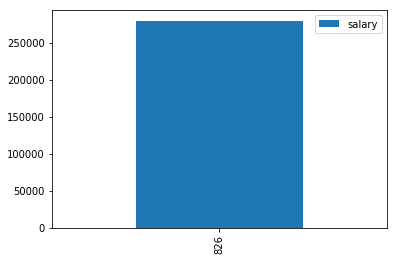

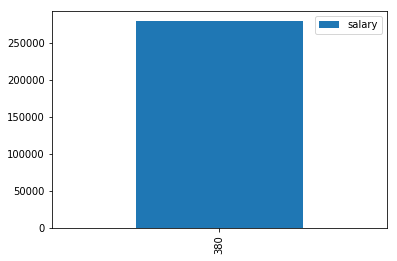

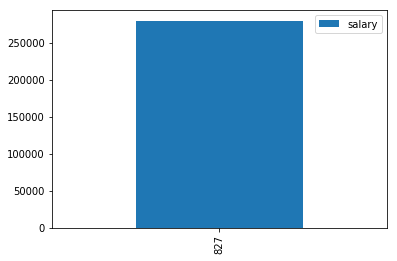

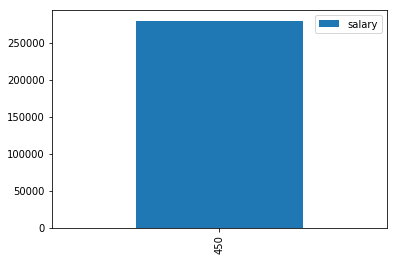

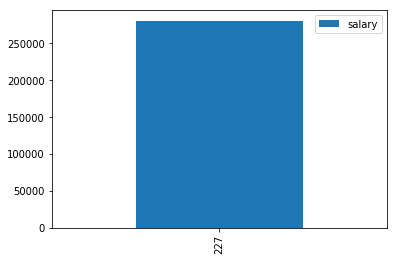

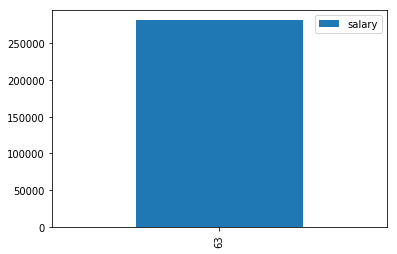

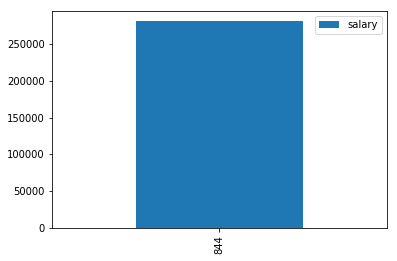

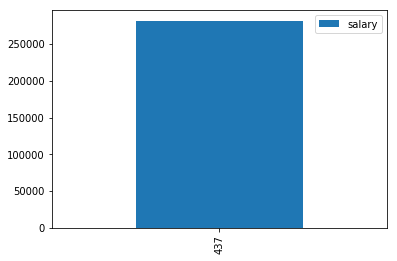

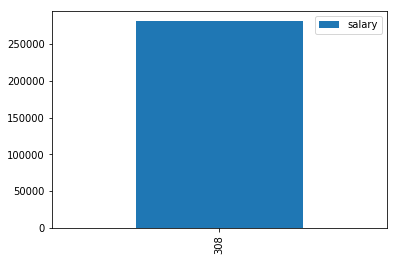

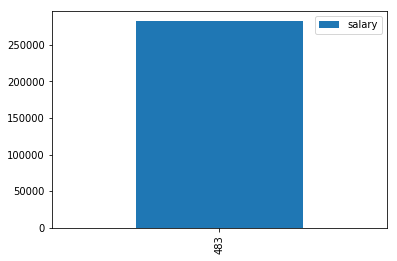

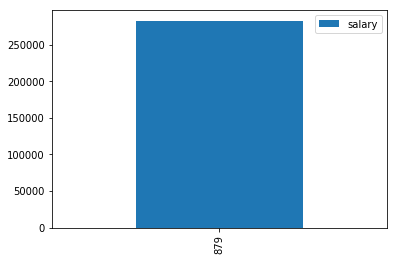

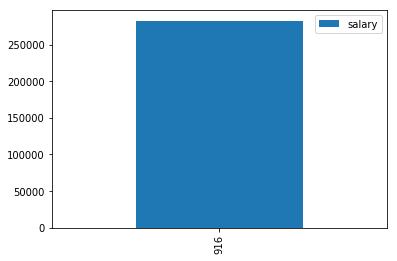

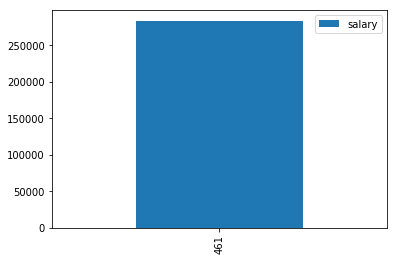

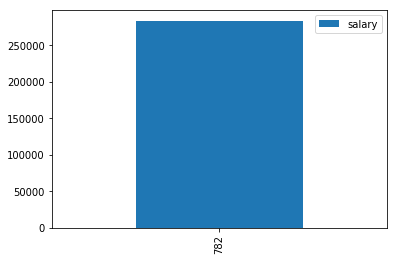

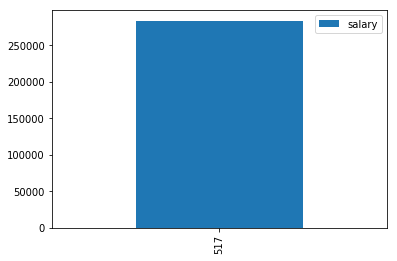

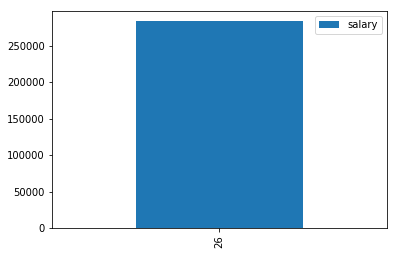

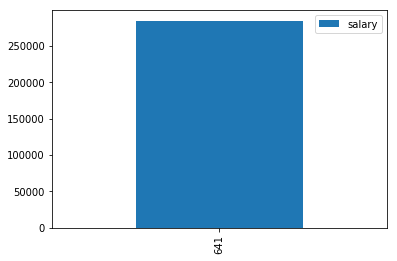

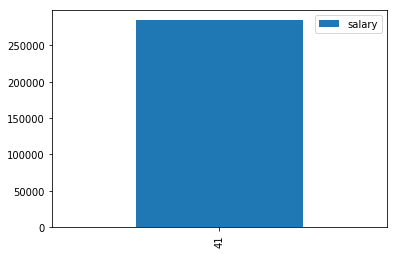

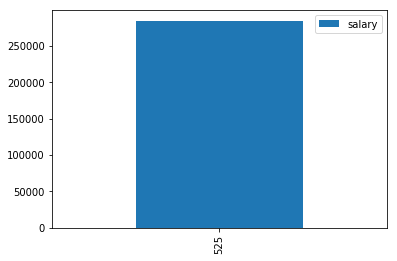

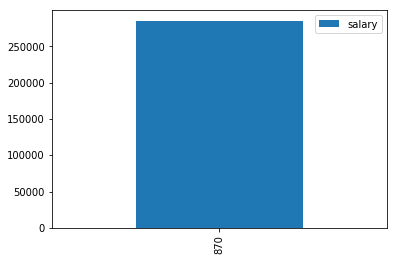

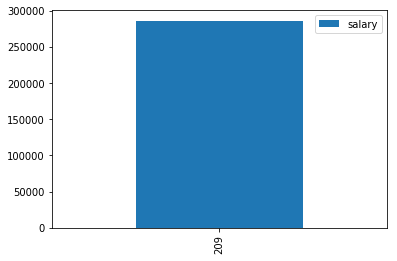

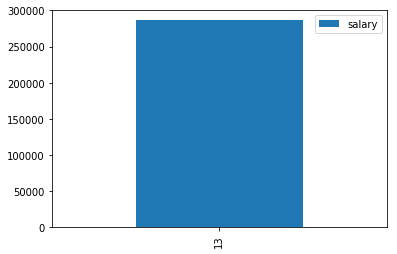

In [115]:
pandasDF.groupby('salary').plot(kind ='bar',legend='reverse')

In [54]:
#Change sex data in numbers
pandasDF['gender'].replace(['Female','Male'],[0,1],inplace=True)

In [55]:
pandasDF.dtypes

first_name     object
salary        float64
gender          int64
dtype: object

Rename the columns

In [61]:
pandasDF = pandasDF.rename(columns={"gender":"Gender"})

In [62]:
pandasDF.dtypes

first_name     object
salary        float64
Gender          int64
dtype: object

In [69]:
pandasDF.columns

Index(['first_name', 'salary', 'Gender'], dtype='object')

In [94]:
print(' statistics of dataset:')
print(pandasDF.describe())


 statistics of dataset:
              salary      Gender
count     932.000000  932.000000
mean   149005.356652    0.482833
std     79785.176736    0.499973
min     12380.490000    0.000000
25%     81559.717500    0.000000
50%    147274.515000    0.000000
75%    220103.465000    1.000000
max    286592.990000    1.000000


In [95]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [100]:
#Change sex data in string
pandasDF['Gender'].replace([0,1],['Female','Male'],inplace=True)

In [101]:
pandasDF.dtypes

first_name     object
salary        float64
Gender         object
dtype: object

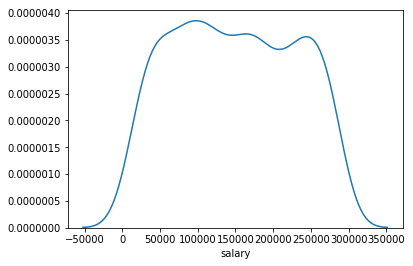

In [111]:
sns.distplot(pandasDF.salary,hist=False)

In [104]:
#skewness and kurtosis
print("Skewness: %f" % pandasDF.salary.skew())
print("Kurtosis: %f" % pandasDF.salary.kurt())

Skewness: 0.039328
Kurtosis: -1.210512


In [184]:
#Filtering dataFrame using our defined condition

#filter only row data whose "salary" column value > 50000
parquetDF.filter(parquetDF['salary'] > 50000).show(3)

+-------------------+---+----------+---------+--------------------+------+--------------+----------------+-------+---------+---------+--------------------+--------+
|  registration_dttm| id|first_name|last_name|               email|gender|    ip_address|              cc|country|birthdate|   salary|               title|comments|
+-------------------+---+----------+---------+--------------------+------+--------------+----------------+-------+---------+---------+--------------------+--------+
|2016-02-03 12:04:03|  2|    Albert|  Freeman|     afreeman1@is.gd|  Male|218.111.175.34|                | Canada|1/16/1968|150280.17|       Accountant IV|        |
|2016-02-02 20:09:31|  3|    Evelyn|   Morgan|emorgan2@altervis...|Female|  7.161.136.94|6767119071901597| Russia| 2/1/1960|144972.51| Structural Engineer|        |
|2016-02-02 19:36:21|  4|    Denise|    Riley|    driley3@gmpg.org|Female| 140.35.109.83|3576031598965625|  China| 4/8/1997| 90263.05|Senior Cost Accou...|        |
+---------

In [33]:
#Sorting dataFrame by certain column

sortedBySalary = parquetDF.orderBy('salary').show(4)

+-------------------+---+----------+---------+--------------------+------+---------------+-------------------+------------+---------+------+--------------------+--------+
|  registration_dttm| id|first_name|last_name|               email|gender|     ip_address|                 cc|     country|birthdate|salary|               title|comments|
+-------------------+---+----------+---------+--------------------+------+---------------+-------------------+------------+---------+------+--------------------+--------+
|2016-02-03 12:05:17|105|      John|    Stone|    jstone2w@bbb.org|      |116.149.171.213|   3564400883560314|    Bulgaria|4/28/1972|  null|    Quality Engineer|        |
|2016-02-03 09:18:24|120|     Kelly|   Fuller|kfuller3b@webeden...|      | 104.13.230.181|6709741313285577939|       China|2/27/1990|  null|   Biostatistician I|        |
|2016-02-03 14:17:47|109|    Gloria| Hamilton|ghamilton30@webmd...|      |  73.114.61.187|     30159872455108|      Canada| 3/9/1988|  null|Syste

In [187]:
#Calculating number of country

country = parquetDF.groupBy("country").count()
country.show(5)

+--------+-----+
| country|count|
+--------+-----+
|  Russia|   62|
|Paraguay|    1|
|   Yemen|    5|
|  Sweden|   25|
|Kiribati|    1|
+--------+-----+
only showing top 5 rows



Using SQL query in dataFrame¶ Create a new dataFrame from the subset of our existing dataFrame

In [190]:
#we need to make sql temporary view for our dataFrame
parquetDF.createOrReplaceTempView("tableSql")

#select "salary" and "country" column from our sql temporary view
anotherNewDataframe = spark.sql("SELECT salary, country,first_name,last_name,email FROM tableSql")
anotherNewDataframe.show(3)

+---------+---------+----------+---------+--------------------+
|   salary|  country|first_name|last_name|               email|
+---------+---------+----------+---------+--------------------+
| 49756.53|Indonesia|    Amanda|   Jordan|    ajordan0@com.com|
|150280.17|   Canada|    Albert|  Freeman|     afreeman1@is.gd|
|144972.51|   Russia|    Evelyn|   Morgan|emorgan2@altervis...|
+---------+---------+----------+---------+--------------------+
only showing top 3 rows



In [191]:
filterAndSortWithSQL = spark.sql("SELECT * FROM tableSql WHERE salary>50000 ORDER BY country")
filterAndSortWithSQL.show(4)

+-------------------+---+----------+---------+--------------------+------+---------------+----------------+-------------+----------+---------+------------------+--------+
|  registration_dttm| id|first_name|last_name|               email|gender|     ip_address|              cc|      country| birthdate|   salary|             title|comments|
+-------------------+---+----------+---------+--------------------+------+---------------+----------------+-------------+----------+---------+------------------+--------+
|2016-02-02 22:57:11|225|   Phyllis|  Wallace|pwallace68@ifeng.com|Female|210.170.214.235|3573294260178710|  Afghanistan|          |220302.18|                  |  ⁦test⁧|
|2016-02-02 21:02:45|520|   Douglas|    Scott|    dscottef@hhs.gov|  Male|153.253.201.168|4881358729431021|Aland Islands|  9/1/1977|259912.24| Account Executive|        |
|2016-02-02 20:57:25|677|   Dorothy|  Russell|drussellis@auda.o...|Female|  186.61.242.54|4017957597425275|      Albania|11/21/1987|181413.87|Res

In [192]:
#Sorting data by certain column

#sorting data by "Country" column alphabetically
orderByCountry = spark.sql("SELECT * FROM tableSql ORDER BY Country")
orderByCountry.show(8)

+-------------------+---+----------+---------+--------------------+------+---------------+-------------------+-------------+--------------------+---------+------------------+--------------------+
|  registration_dttm| id|first_name|last_name|               email|gender|     ip_address|                 cc|      country|           birthdate|   salary|             title|            comments|
+-------------------+---+----------+---------+--------------------+------+---------------+-------------------+-------------+--------------------+---------+------------------+--------------------+
|2016-02-03 02:18:09|588|  Benjamin|  Wheeler|  bwheelergb@last.fm|  Male|  126.32.181.33|   3573395768618030|     "Bonaire| Saint Eustatius ...|     null|          61871.37|                    |
|2016-02-02 22:57:11|225|   Phyllis|  Wallace|pwallace68@ifeng.com|Female|210.170.214.235|   3573294260178710|  Afghanistan|                    |220302.18|                  |              ⁦test⁧|
|2016-02-03 01:14:03